# Entry Class For Scraping

### Using 9.9 公益 as an example

### Warning: 我可能有很多废话，但是废话里面可能也有要点...怎么办～～～

－陈晓理

# 0 Prelude~~~ (俗称，前戏)

网页爬虫(Scraping)是现代数据采集的重要渠道，爬虫技术应该说也一直伴随互联网的的快速发展而不断演进着。大部分网站也不甘心自己的宝贵数据就这么被爬虫给一个个爬了下来，于是网页技术中的反爬虫技巧也在不断的提高，爬虫与反爬虫这两个对手就在这‘你来我往’中不断提升各自的修行。

我们这一次开一个头，先解决9.9公益日面对的问题，由此稍微展开一小点，让彭小天天朋友以小见大，以后见到其他的类型的时候，不会慌，知道应该往哪个方向寻找解决方案

在讲网页爬虫之前，我们要先讲一下网页web page，我们爬数据都是从网页上爬下来，那网页是怎样的一种格式？我们到底爬的是什么东西？

我们看到的网页都是有浏览器解析后的呈现，浏览器解析的是网页的代码文件。网页代码文件分几种，基本的是 **html, css, javascript**, 其中

1. **html**是大结构
2. **css**是用来格式化这个大结构，让它变得更漂亮更有展现力
3. **javascript**就是更灵活更强大的工具，来执行更丰富的功能


### 用我的话来说，html 搭建的是骨架，肌肉和皮肤


![](http://www.wangyi120.com/uploadfile/2015/0124/20150124014338869.jpg)

###  css来做丰胸，垫下巴，割双眼皮，美发染发

![李云龙你这个浓眉大眼的也叛变了](https://s2.wxwenku.com/getimg/ae57950330606875df12793a1a6b54eff150d0ce3945ec7ef9cc87a595679216864c63786003cb7d9f1781d2e2d5bce85e5daea53a0d320822bfe2a2bdc03aec6615b3b6a6fce1aaafe5feb9b4f76b5dee40d41f3c086ff59d0c9a0a8ae36176a5cf85c637eca430cf5d1e2ebc049420f2f8c93dfa169c7b6b45487924df34547c59bd3eae536c7ae0bbe13ba0f2d058)

### Javascript就是用一个大的鼓风机把你的人吹得更飘逸，更动感，更迷人～～～

![](http://img.mp.itc.cn/upload/20170620/f3d56124ee9e40a599dc86f67b07c713_th.jpg)


可以了可以了，看个十七八遍就行了。梦想是美好的，现实是骨感的。我们讲网络爬虫呢，主要还是针对html，诶，诶，不要走啊，不要走啊～～～～

你要这样想，我们都是真诚的人，我们都喜欢透过现象看本质，要抓重点，有了重点，才有李云龙，才有新垣结衣，来来来，我们来看看html长成什么样子

# 1 HTML长什么样

![DOM树形结构](DOM树形结构_new.png )

这是一般的结构，看起来如果不习惯的话，没关系，我想一个例子

这里面的层级结构更简单

![乔帮主DOM结构](乔帮主DOM树形图.png)

![乔帮主](http://i0.sinaimg.cn/IT/2011/1215/U5384P2DT20111215041107.png)

比如在这里，我们需要网络爬虫沿着html的层级结构，定位到乔帮主的姓名和生卒年信息，然后copy下来。
但首先，我们需要查看html代码，确定这样的信息能不能爬下来，应该用什么样的方法来爬，然后用人工的方式定位这些信息的位置，然后再用其他工具，将人工定位转为用工具来识别位置的特征，实现定位。

所以，最基本的网络爬虫中，有两个方面是最主要的：

通过查看html网页结构，我们必须了解
1. **数据来源类型**
2. **定位数据位置**


# 2 来看看99公益日结果页面的网页结构

### 这里有若干知识点

1. 首先，如何查看给定网页的html代码？

来来来，这样，以chrome为例，将网址（http://ssl.gongyi.qq.com/m/201799/realtime.html?tp=2&o=1） copy到地址栏，回车，然后在页面上用鼠标右键点击，选择** inspect ** ，chrome就将你带入查看网页代码的界面了

![inspect](./inspect.png)

那么为什么我们会看到页面上出现“为了更好的体验，请是用竖屏浏览”, 这是因为这个网页是专门给手机看的。没事儿，在**inspect**模式中, 选择右上方的“**手机阅览模式 toggle divice toolbar**”自然就去掉这个页面，然后就能够看到最关心的榜单页面了

![手机阅览模式](./手机阅览模式.png)

![榜单页面](./榜单页面.png)

## 2.1 查看html结构，确定数据位置和来源

点击页面右上方的**Elements**一栏，进入HTML代码查看页面，

我们可以清楚的看到HTML的层次结构，点击小三角还能够展开这一项的内容，同时，左边页面将显示该段代码对应的网页位置。

![](99右侧定位左侧new.png)

我们也可以直接用鼠标右键移到左边网页中的位置，右键点击，然后在出现菜单中点击**inspect**，就可以在右侧的代码页面中看到对应的代码，非常方便

![](99inspect.png)

我们关注的有这几个关键信息：
1. 基金会名称
2. 基金会排名
3. 参与捐赠的人数
4. 捐赠总额


在HTML中，我们看到了相应的信息以及他们的位置，那我们试着把这页html拿下来，仔细看看怎么爬。

## 2.2 动手下载并读取网页HTML

我们要用到的是python 的几个经典包，包括 BeautifulSoup, urllib, 或者requests

In [2]:
from bs4 import BeautifulSoup
import urllib.request
import urllib.parse
import requests
# urllib.request
import re
import json
import json2html
import pandas as pd

In [9]:
# 
url = "http://ssl.gongyi.qq.com/m/201799/realtime.html?tp=2&o=1"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, 'lxml')

该网页的 HTML信息就存到了soup这个变量里面，然后我们看一看这些HTML信息是什么

<!DOCTYPE html>
<html>
<head>
<meta charset="utf-8"/>
<meta content="腾讯公益" name="description"/>
<meta content="腾讯公益" name="keywords"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="webkit|ie-comp|ie-stand" name="renderer"/>
<!-- 避免转码 -->
<meta content="no-siteapp" http-equiv="Cache-Control"/>
<meta content="width=device-width,initial-scale=1,user-scalable=0" name="viewport"/>
<meta content="telephone=no" name="format-detection"/>
<meta content="腾讯公益" name="apple-mobile-web-app-title"/>
<title>腾讯公益 - 实时战报</title>
<script type="text/javascript">
            (function() {
                var baseFontSize = 100;
                var baseWidth = 375;
                var clientWidth = document.documentElement.clientWidth || window.innerWidth;
                var innerWidth = Math.max(Math.min(clientWidth, 480), 360);

                var rem = 100;
                if (innerWidth >= 414) {
                    rem = Math.floor(innerWidth / baseWidth * baseFontSi
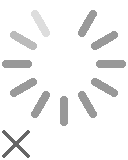
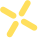
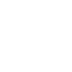
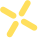
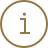
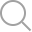
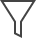
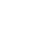

In [11]:
soup #可以用 ctrl+F 来搜索关键词"携手“ 然后就可以看到相应的HTML代码

令人奇怪的是，这里我们没有看到任何数字，没有携手多少人的具体数字，也没有具体筹款额的数字，甚至连基金会的名称也没有，这是怎么回事？

这里的显示结果表明：我们在页面看到的“携手”和“筹款额”，并不是静止的数字，而应该是从数据库里面提取出来的结果，我们现在拿下来的HTML代码，在相应的位置上，显示的是在从数据库里面提取具体数字结果的地址和变量。

这就引出了网页的另外几个知识点

## 2.3 数据接口

我们看到的这个腾讯的公益日排行的页面，是html结尾，一般来说是静态的网页，但是他的数据肯定是要从后台数据库中去调用，那我们的关键就要找这个与后台数据库交互的接口，这种接口叫做API （Application Programming Interface）。那么问题来了，如何找到这个API？

我是通过这样的方式找的：（很可惜，现在这样的方式已经失效了，可能是我去爬腾讯的数据，他们发现了，结果把这个API关了）
1. 点击查看页面上方的Network一栏，会看到一系列的文件以及其状态(Name, Status, Type, Initiator, Size)


![](Network.png)

2.点击左方网页底部的“查看更多”，之后浏览器会显示后面20个基金会的名单，
这个时候，我们可以看到在Network一栏，有更新的文件和数据进来了，点击最新的文件，（现在这个方法已经失效，最新文件出不来，腾讯给改了，所以按照这个方式对待最新的页面是找不到API的）

![](Network_Headers.png)

（在旧的网站中）在response headers中可以找到以下API
http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=1&md=9&jsoncallback=_martch99_sear_fn_
(现在已经失效了）
其中， pg=1 就是代表这第一页，你将这个编程 pg=2，那么就是第二页，那么我们就可以爬下来这样的所有数据！

In [1]:
url_page1='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=1&md=9&jsoncallback=_martch99_sear_fn_'

url_page2='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=2&md=9&jsoncallback=_martch99_sear_fn_'

url_page3='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=3&md=9&jsoncallback=_martch99_sear_fn_'

url_page4='http://ssl.gongyi.qq.com/cgi-bin/1799_rank_ngo?type=ngobym&pg=4&md=9&jsoncallback=_martch99_sear_fn_'


In [ ]:
page1 = requests.get(url_page1).text #现在这个应该没用了，这个url失效了，但方法依然有效

In [ ]:
page1_json_text = re.search(r'{(.*)\}',page1).group() #通过这样方法提取我们想要的位置的文字
#这种方法叫做正则表达，学起来学习曲线稍微有点陡。

In [ ]:
#以下是变量 page1_json_text 的内容。需要观察这个数据类型，是json数据格式，表达形式是 
#｛“变量1”：值1，“变量2“：值2，。。。｝

In [4]:
page1_json_text = '{"code":0,"msg":"success","op_time":"1506283468","data":{"rd":{"tmm":30000051392,"money":30576863074,"projs":6239},"ngo":{"list":[{"id":"105","mn":4456857294,"tms":408417,"title":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50","desc":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82","uin":"2724954300","rk":"1"},{"id":"100","mn":3059102635,"tms":337033,"title":"%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fe2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb","desc":"%E6%88%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2005%E5%B9%B46%E6%9C%8814%E6%97%A5%EF%BC%8C%E5%8E%9F%E5%90%8D%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E6%95%99%E8%82%B2%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C2011%E5%B9%B47%E6%9C%8815%E6%97%A5%E7%BB%8F%E6%B0%91%E6%94%BF%E9%83%A8%E6%89%B9%E5%87%86%E6%9B%B4%E5%90%8D%E4%B8%BA%E2%80%9C%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E2%80%9D%E3%80%82%E8%8B%B1%E6%96%87%E8%AF%91%E5%90%8D%EF%BC%9AChina%20Social%20Welfare%20Foundation%EF%BC%8C%E7%BC%A9%E5%86%99%EF%BC%9ACSWF%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E6%80%A7%E8%B4%A8%EF%BC%9A%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%8F%91%E8%B5%B7%E4%BA%BA%EF%BC%9A%E6%B0%91%E6%94%BF%E9%83%A8%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E5%AE%97%E6%97%A8%EF%BC%9A%E4%BB%A5%E6%B0%91%E4%B8%BA%E6%9C%AC%E3%80%81%E5%85%B3%E6%B3%A8%E6%B0%91%E7%94%9F%E3%80%81%E6%89%B6%E5%8D%B1%E6%B5%8E%E5%9B%B0%E3%80%81%E5%85%B1%E4%BA%AB%E5%92%8C%E8%B0%90%EF%BC%8C%E6%9C%8D%E5%8A%A1%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E4%BA%8B%E4%B8%9A%E3%80%82","uin":"2693566221","rk":"2"},{"id":"83","mn":1692998810,"tms":228060,"title":"%E4%B8%AD%E5%9B%BD%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F11ad1700130bf2720d6d95d5548081508562893642109561f4f8442fdbe654a19f49e217381c5117","desc":"%E4%B8%AD%E5%9B%BD%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E5%9F%BA%E9%87%91%E4%BC%9A%28%E7%AE%80%E7%A7%B0%EF%BC%9A%E4%B8%AD%E5%9B%BD%E5%84%BF%E5%9F%BA%E4%BC%9A%29%E6%88%90%E7%AB%8B%E4%BA%8E1981%E5%B9%B47%E6%9C%8828%E6%97%A5%EF%BC%8C%E6%98%AF%E6%96%B0%E4%B8%AD%E5%9B%BD%E6%88%90%E7%AB%8B%E5%90%8E%E7%9A%84%E7%AC%AC%E4%B8%80%E5%AE%B6%E5%9B%BD%E5%AE%B6%E7%BA%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E4%B8%AD%E5%9B%BD%E5%84%BF%E5%9F%BA%E4%BC%9A%E4%BB%A5%E7%AB%AD%E8%AF%9A%E6%9C%8D%E5%8A%A1%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E6%95%99%E8%82%B2%E7%A6%8F%E5%88%A9%E4%BA%8B%E4%B8%9A%E3%80%81%E6%9C%8D%E5%8A%A1%E7%A4%BE%E4%BC%9A%E3%80%81%E6%9C%8D%E5%8A%A1%E5%A4%A7%E5%B1%80%E4%B8%BA%E5%AE%97%E6%97%A8%EF%BC%8C%E7%B2%BE%E5%BF%83%E6%89%93%E9%80%A0%E5%92%8C%E6%B7%B1%E5%8C%96%E6%8B%93%E5%B1%95%E4%BA%86%22%E6%98%A5%E8%95%BE%E8%AE%A1%E5%88%92%22%E3%80%81%22%E5%AE%89%E5%BA%B7%E8%AE%A1%E5%88%92%22%E3%80%81%22%E5%84%BF%E7%AB%A5%E5%BF%AB%E4%B9%90%E5%AE%B6%E5%9B%AD%22%E3%80%81%E2%80%9CHELLO%E5%B0%8F%E5%AD%A9%E2%80%9D%E7%AD%89%E5%93%81%E7%89%8C%E9%A1%B9%E7%9B%AE%E3%80%82%E5%BD%A2%E6%88%90%E5%84%BF%E7%AB%A5%E6%95%99%E8%82%B2%E8%B5%84%E5%8A%A9%E3%80%81%E5%A4%A7%E7%97%85%E6%95%91%E5%8A%A9%E3%80%81%E5%AE%89%E5%85%A8%E5%81%A5%E5%BA%B7%E3%80%81%E7%81%BE%E5%90%8E%E7%B4%A7%E6%80%A5%E6%8F%B4%E5%8A%A9%E7%AB%8B%E4%BD%93%E5%8C%96%E8%B5%84%E5%8A%A9%E6%9C%8D%E5%8A%A1%E4%BD%93%E7%B3%BB%EF%BC%8C%E8%A2%AB%E6%B0%91%E6%94%BF%E9%83%A8%E8%AF%84%E4%B8%BA5A%E7%BA%A7%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82","uin":"611990116","rk":"3"},{"id":"163","mn":1433104147,"tms":93774,"title":"%E4%B8%8A%E6%B5%B7%E4%BB%81%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb044e49b84f82fcafae0161c35900d02bce438319ba79f5180074efdadb8558a03ff3ab90c23039d52","desc":"%E4%B8%8A%E6%B5%B7%E4%BB%81%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%94%B1%E7%88%B1%E5%BE%B7%E5%8F%91%E8%B5%B7%EF%BC%8C2011%E5%B9%B412%E6%9C%88%E5%9C%A8%E4%B8%8A%E6%B5%B7%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E6%94%AF%E6%8C%81%E5%9E%8B%E6%B0%91%E9%97%B4%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E4%BB%81%E5%BE%B7%E7%AB%8B%E8%B6%B3%E4%B8%8A%E6%B5%B7%EF%BC%8C%E8%BE%90%E5%B0%84%E5%85%A8%E5%9B%BD%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%94%AF%E6%8C%81%E6%B0%91%E9%97%B4%E5%85%AC%E7%9B%8A%EF%BC%8C%E6%8E%A8%E5%8A%A8%E5%85%AC%E7%9B%8A%E5%88%9B%E6%96%B0%EF%BC%8C%E4%BF%83%E8%BF%9B%E8%A1%8C%E4%B8%9A%E5%8F%91%E5%B1%95%E3%80%82","uin":"3253755055","rk":"4"},{"id":"245","mn":1367782623,"tms":593776,"title":"%E6%B7%B1%E5%9C%B3%E5%B8%82%E7%88%B1%E4%BD%91%E6%9C%AA%E6%9D%A5%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F79d2cd69fead5672fb9f05be86aa5d74dfaf27ad20e3b59f6dc0916fb3f4e38812419bb79fcfe40895bdd78cf6aa1ddf","desc":"%E6%B7%B1%E5%9C%B3%E5%B8%82%E7%88%B1%E4%BD%91%E6%9C%AA%E6%9D%A5%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%9C%A8%E6%B7%B1%E5%9C%B3%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E4%B8%93%E6%B3%A8%E4%BA%8E%E4%B8%A4%E5%A4%A7%E5%85%AC%E7%9B%8A%E9%A2%86%E5%9F%9F%EF%BC%9A%E5%AF%B9%E5%A4%84%E4%BA%8E%E5%9B%B0%E5%A2%83%E5%84%BF%E7%AB%A5%E7%9A%84%E5%85%A8%E6%96%B9%E4%BD%8D%E6%95%91%E5%8A%A9%EF%BC%9B%E6%94%AF%E6%8C%81%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E9%A2%86%E5%9F%9F%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E7%9A%84%E5%8F%91%E5%B1%95%E3%80%82","uin":"3257591536","rk":"5"},{"id":"144","mn":1340834819,"tms":83629,"title":"%E6%97%A0%E9%94%A1%E7%81%B5%E5%B1%B1%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F1e38afedb5ae397e937c4ce112c51b2d0653d5c99cc64f45bda46fa99dc2f2a17667789348caaae2f76ca91f2f25fa03","desc":"%E8%B7%B5%E5%B1%A5%E4%BA%BA%E9%97%B4%E4%BD%9B%E6%95%99%EF%BC%8C%E5%87%80%E5%8C%96%E4%B8%96%E9%81%93%E4%BA%BA%E5%BF%83%E3%80%82%E7%81%B5%E5%B1%B1%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2004%E5%B9%B412%E6%9C%88%EF%BC%8C%E6%98%AF%E7%94%B1%E6%97%A0%E9%94%A1%E7%81%B5%E5%B1%B1%E6%96%87%E5%8C%96%E6%97%85%E6%B8%B8%E9%9B%86%E5%9B%A2%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8%E5%92%8C%E6%97%A0%E9%94%A1%E5%B8%82%E7%A5%A5%E7%AC%A6%E7%A6%85%E5%AF%BA%E5%8F%91%E8%B5%B7%EF%BC%8C%E5%9C%A8%E6%B1%9F%E8%8B%8F%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9E%8B%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%8E%B0%E5%9B%B4%E7%BB%95%E4%BA%94%E5%A4%A7%E5%B9%B3%E5%8F%B0%E5%BC%80%E5%B1%95%E9%A1%B9%E7%9B%AE%EF%BC%9A%E9%9D%92%E5%B9%B4%E6%88%90%E9%95%BF%E5%B9%B3%E5%8F%B0%E3%80%81%E8%A1%8C%E4%B8%9A%E5%8F%91%E5%B1%95%E5%B9%B3%E5%8F%B0%E3%80%81%E7%A4%BE%E4%BC%9A%E5%88%9B%E6%96%B0%E5%B9%B3%E5%8F%B0%E3%80%81%E7%A4%BE%E5%8C%BA%E6%B2%BB%E7%90%86%E5%B9%B3%E5%8F%B0%E5%92%8C%E5%9B%BD%E9%99%85%E4%BA%A4%E6%B5%81%E6%8F%B4%E5%8A%A9%E5%B9%B3%E5%8F%B0%E3%80%82%E7%81%B5%E5%B1%B1%E7%9A%84%E5%B7%A5%E4%BD%9C%E5%8E%9F%E5%88%99%E6%98%AF%EF%BC%9A%E8%A7%84%E8%8C%83%E3%80%81%E4%B8%93%E4%B8%9A%E3%80%81%E5%93%81%E7%89%8C%E3%80%81%E9%80%8F%E6%98%8E%E3%80%822010%E5%B9%B4%EF%BC%8C%E8%A2%AB%E6%B0%91%E6%94%BF%E9%83%A8%E8%AF%84%E4%B8%BA%E2%80%9C%E5%85%A8%E5%9B%BD%E5%85%88%E8%BF%9B%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E2%80%9D%E3%80%822015%E5%B9%B4%EF%BC%8C%E5%9C%A8%E7%AC%AC%E4%BA%94%E5%B1%8A%E4%B8%AD%E5%9B%BD%E5%85%AC%E7%9B%8A%E8%8A%82%E8%8E%B7%E5%BE%97%E2%80%9C2015%E5%B9%B4%E5%BA%A6%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%E5%A5%96%E2%80%9D%20%E3%80%82","uin":"2997007428","rk":"6"},{"id":"40","mn":1292478766,"tms":97226,"title":"%E7%88%B1%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3e28f14aa051684286b10ad99b1ac2b070f3e555d54ca27544c0477d961f15579aa6deebbe88ee1ee1256b4ead56b434","desc":"%E7%88%B1%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1985%E5%B9%B44%E6%9C%88%EF%BC%8C%E6%97%A8%E5%9C%A8%E4%BF%83%E8%BF%9B%E6%88%91%E5%9B%BD%E7%9A%84%E6%95%99%E8%82%B2%E3%80%81%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E3%80%81%E5%8C%BB%E7%96%97%E5%8D%AB%E7%94%9F%E3%80%81%E7%A4%BE%E5%8C%BA%E5%8F%91%E5%B1%95%E4%B8%8E%E7%8E%AF%E5%A2%83%E4%BF%9D%E6%8A%A4%E3%80%81%E7%81%BE%E5%AE%B3%E7%AE%A1%E7%90%86%E7%AD%89%E5%90%84%E9%A1%B9%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%EF%BC%8C%E8%BF%84%E4%BB%8A%E4%B8%BA%E6%AD%A2%EF%BC%8C%E9%A1%B9%E7%9B%AE%E5%8C%BA%E5%9F%9F%E7%B4%AF%E8%AE%A1%E8%A6%86%E7%9B%96%E5%85%A8%E5%9B%BD31%E4%B8%AA%E7%9C%81%E3%80%81%E5%B8%82%E3%80%81%E8%87%AA%E6%B2%BB%E5%8C%BA%EF%BC%8C%E9%80%BE%E5%8D%83%E4%B8%87%E4%BA%BA%E5%8F%97%E7%9B%8A%E3%80%82","uin":"95001117","rk":"7"},{"id":"21","mn":1162045890,"tms":115886,"title":"%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%A5%B3%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F18908ac1703cb32b08e108143e2737cd1f1d625578e0c18fbd4affc2b2230251b52b515ed7bbadc19607af09a6658a45","desc":"%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%A5%B3%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E7%AE%80%E7%A7%B0%E2%80%9C%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E2%80%9D%E8%8B%B1%E6%96%87%E5%90%8D%E7%A7%B0%EF%BC%9AChina%20Women%26amp%3Bamp%3B%23039%3Bs%20Development%20Foundation%EF%BC%8C%E7%BC%A9%E5%86%99%EF%BC%9A%20CWDF%E3%80%82%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E6%98%AF5A%E7%BA%A7%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C1988%E5%B9%B412%E6%9C%88%E7%94%B1%E5%85%A8%E5%9B%BD%E5%A6%87%E8%81%94%E5%8F%91%E8%B5%B7%E6%88%90%E7%AB%8B%E3%80%82%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E6%98%AF%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%85%B6%E9%9D%A2%E5%90%91%E5%85%AC%E4%BC%97%E5%8B%9F%E6%8D%90%E7%9A%84%E5%9C%B0%E5%9F%9F%E6%98%AF%E4%B8%AD%E5%9B%BD%E4%BB%A5%E5%8F%8A%E8%AE%B8%E5%8F%AF%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E5%8B%9F%E6%8D%90%E7%9A%84%E5%9B%BD%E5%AE%B6%E5%92%8C%E5%9C%B0%E5%8C%BA%E3%80%82%0A%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E7%BB%B4%E6%8A%A4%E5%A6%87%E5%A5%B3%E6%9D%83%E7%9B%8A%EF%BC%8C%E6%8F%90%E9%AB%98%E5%A6%87%E5%A5%B3%E7%B4%A0%E8%B4%A8%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%A6%87%E5%A5%B3%E5%92%8C%E5%A6%87%E5%A5%B3%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%EF%BC%8C%E4%B8%BA%E6%9E%84%E5%BB%BA%E5%92%8C%E8%B0%90%E7%A4%BE%E4%BC%9A%E4%BD%9C%E5%87%BA%E5%BA%94%E6%9C%89%E7%9A%84%E8%B4%A1%E7%8C%AE%E3%80%82%0A%E9%95%BF%E6%9C%9F%E4%BB%A5%E6%9D%A5%EF%BC%8C%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E7%9D%80%E7%9C%BC%E4%BA%8E%E5%A6%87%E5%A5%B3%E7%BE%A4%E4%BC%97%E6%9C%80%E5%85%B3%E5%BF%83%E3%80%81%E6%9C%80%E7%9B%B4%E6%8E%A5%E3%80%81%E6%9C%80%E7%8E%B0%E5%AE%9E%E7%9A%84%E5%88%A9%E7%9B%8A%E9%97%AE%E9%A2%98%EF%BC%8C%E5%9C%A8%E5%9B%B4%E7%BB%95%E5%A6%87%E5%A5%B3%E6%89%B6%E8%B4%AB%E3%80%81%E5%A6%87%E5%A5%B3%E5%81%A5%E5%BA%B7%E3%80%81%E5%A5%B3%E6%80%A7%E5%88%9B%E4%B8%9A%E7%AD%89%E6%96%B9%E9%9D%A2%EF%BC%8C%E5%AE%9E%E6%96%BD%E4%BA%86%E4%B8%80%E7%B3%BB%E5%88%97%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E9%A1%B9%E7%9B%AE%EF%BC%8C%E5%8F%96%E5%BE%97%E4%BA%86%E6%98%8E%E6%98%BE%E7%9A%84%E7%A4%BE%E4%BC%9A%E6%88%90%E6%95%88%EF%BC%8C%E7%BB%84%E7%BB%87%E5%AE%9E%E6%96%BD%E7%9A%84%E2%80%9C%E6%AF%8D%E4%BA%B2%E5%B0%8F%E9%A2%9D%E5%BE%AA%E7%8E%AF%E2%80%9D%E3%80%81%E2%80%9C%E6%AF%8D%E4%BA%B2%E5%81%A5%E5%BA%B7%E5%BF%AB%E8%BD%A6%E2%80%9D%E3%80%81%E2%80%9C%E6%AF%8D%E4%BA%B2%E6%B0%B4%E7%AA%96%E2%80%9D%E3%80%81%20%E2%80%9C%E8%B4%AB%E5%9B%B0%E8%8B%B1%E6%A8%A1%E6%AF%8D%E4%BA%B2%E8%B5%84%E5%8A%A9%E8%AE%A1%E5%88%92%E2%80%9D%E3%80%81%E2%80%9C%E6%AF%8D%E4%BA%B2%E9%82%AE%E5%8C%85%E2%80%9D5%E4%B8%AA%E9%A1%B9%E7%9B%AE%E5%88%86%E5%88%AB%E8%8E%B7%E5%BE%97%E4%B8%AD%E5%9B%BD%E6%94%BF%E5%BA%9C%E6%9C%80%E9%AB%98%E6%85%88%E5%96%84%E5%A5%96%E9%A1%B9%E2%80%94%E4%B8%AD%E5%8D%8E%E6%85%88%E5%96%84%E5%A5%96%E3%80%82","uin":"2081457189","rk":"8"},{"id":"78","mn":1128105177,"tms":213704,"title":"%E4%B8%AD%E5%9B%BD%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3c9f5dac15075332f0af7d7ef2e5d7f537068afaf6b01ae205da94bd0c97331eef8a40321163fdb39c4886bcee050fde","desc":"%E4%B8%AD%E5%9B%BD%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A%28%E8%8B%B1%E6%96%87%E5%90%8D%3AChina%20Foundation%20for%20Poverty%20Alleviation%EF%BC%8C%E7%BC%A9%E5%86%99%3ACFPA%29%E6%88%90%E7%AB%8B%E4%BA%8E1989%E5%B9%B43%E6%9C%88%EF%BC%8C%E7%94%B1%E5%9B%BD%E5%8A%A1%E9%99%A2%E6%89%B6%E8%B4%AB%E5%BC%80%E5%8F%91%E9%A2%86%E5%AF%BC%E5%B0%8F%E7%BB%84%E5%8A%9E%E5%85%AC%E5%AE%A4%E4%B8%BB%E7%AE%A1%EF%BC%8C%E6%98%AF%E5%AF%B9%E6%B5%B7%E5%86%85%E5%A4%96%E6%8D%90%E8%B5%A0%E5%9F%BA%E9%87%91%E8%BF%9B%E8%A1%8C%E7%AE%A1%E7%90%86%E7%9A%84%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%EF%BC%8C%E6%98%AF%E7%8B%AC%E7%AB%8B%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%E6%B3%95%E4%BA%BA%E3%80%82","uin":"1162992508","rk":"9"},{"id":"102","mn":999433142,"tms":95211,"title":"%E4%B8%8A%E6%B5%B7%E7%9C%9F%E7%88%B1%E6%A2%A6%E6%83%B3%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0cdb413bd5e29bee196b6862e708ea7c1e3e2cd95b518a222a86e678416094c0d8c7d74c09c90eac3","desc":"%E4%B8%8A%E6%B5%B7%E7%9C%9F%E7%88%B1%E6%A2%A6%E6%83%B3%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%94%B1%E9%87%91%E8%9E%8D%E6%9C%BA%E6%9E%84%E5%92%8C%E4%B8%8A%E5%B8%82%E5%85%AC%E5%8F%B8%E7%9A%84%E4%B8%93%E4%B8%9A%E7%AE%A1%E7%90%86%E4%BA%BA%E5%91%98%E5%8F%91%E8%B5%B7%E5%92%8C%E8%BF%90%E8%90%A5%E7%9A%84%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E4%BF%83%E8%BF%9B%E6%95%99%E8%82%B2%E5%9D%87%E8%A1%A1%EF%BC%8C%E5%8F%91%E5%B1%95%E7%B4%A0%E5%85%BB%E6%95%99%E8%82%B2%EF%BC%8C%E5%B8%AE%E5%8A%A9%E5%AD%A9%E5%AD%90%E8%87%AA%E4%BF%A1%E3%80%81%E4%BB%8E%E5%AE%B9%E3%80%81%E6%9C%89%E5%B0%8A%E4%B8%A5%E5%9C%B0%E6%88%90%E9%95%BF%E3%80%82%0A%E7%9C%9F%E7%88%B1%E6%A2%A6%E6%83%B3%E9%A6%96%E5%88%9B%E2%80%9C%E6%A2%A6%E6%83%B3%E4%B8%AD%E5%BF%83%E2%80%9D%E7%B4%A0%E5%85%BB%E6%95%99%E8%82%B2%E6%9C%8D%E5%8A%A1%E4%BD%93%E7%B3%BB%EF%BC%8C%E8%B7%A8%E7%95%8C%E5%85%B1%E5%88%9B%E6%95%99%E8%82%B2%E7%94%9F%E6%80%81%EF%BC%8C%E5%B7%B2%E5%9C%A8%E5%85%A8%E5%9B%BD31%E4%B8%AA%E7%9C%81%E4%B8%BA280%E4%B8%87%E5%B8%88%E7%94%9F%E6%8F%90%E4%BE%9B%E5%85%AC%E7%9B%8A%E4%BA%A7%E5%93%81%E5%92%8C%E6%9C%8D%E5%8A%A1%E3%80%82","uin":"2271431773","rk":"10"},{"id":"16","mn":835895133,"tms":99731,"title":"%E6%B7%B1%E5%9C%B3%E5%A3%B9%E5%9F%BA%E9%87%91%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F7767c9653cd14ee9e67532e45389742881e2c231861883f935f3b01d6beeb0f74b78a0c902325169","desc":"%E5%A3%B9%E5%9F%BA%E9%87%91%E6%98%AF%E6%9D%8E%E8%BF%9E%E6%9D%B0%E5%85%88%E7%94%9F2007%E5%B9%B44%E6%9C%88%E5%88%9B%E7%AB%8B%E7%9A%84%E5%88%9B%E6%96%B0%E5%9E%8B%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%EF%BC%8C2011%E5%B9%B41%E6%9C%88%E4%BD%9C%E4%B8%BA%E4%B8%AD%E5%9B%BD%E7%AC%AC%E4%B8%80%E5%AE%B6%E6%B0%91%E9%97%B4%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E8%90%BD%E6%88%B7%E6%B7%B1%E5%9C%B3%E3%80%82%E5%A3%B9%E5%9F%BA%E9%87%91%E4%BB%A5%E2%80%9C%E5%B0%BD%E6%88%91%E6%89%80%E8%83%BD%EF%BC%8C%E4%BA%BA%E4%BA%BA%E5%85%AC%E7%9B%8A%E2%80%9D%E4%B8%BA%E6%84%BF%E6%99%AF%EF%BC%8C%E6%90%AD%E5%BB%BA%E4%B8%93%E4%B8%9A%E9%80%8F%E6%98%8E%E7%9A%84%E5%85%AC%E7%9B%8A%E5%B9%B3%E5%8F%B0%EF%BC%8C%E4%B8%93%E6%B3%A8%E4%BA%8E%E7%81%BE%E5%AE%B3%E6%95%91%E5%8A%A9%E3%80%81%E5%84%BF%E7%AB%A5%E5%85%B3%E6%80%80%E4%B8%8E%E5%8F%91%E5%B1%95%E3%80%81%E5%85%AC%E7%9B%8A%E6%94%AF%E6%8C%81%E4%B8%8E%E5%88%9B%E6%96%B0%E4%B8%89%E5%A4%A7%E9%A2%86%E5%9F%9F%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%88%90%E4%B8%BA%E4%B8%AD%E5%9B%BD%E5%85%AC%E7%9B%8A%E7%9A%84%E5%BC%80%E6%8B%93%E8%80%85%E3%80%81%E5%88%9B%E6%96%B0%E8%80%85%E5%92%8C%E6%8E%A8%E5%8A%A8%E8%80%85%E3%80%82%0A","uin":"95001115","rk":"11"},{"id":"103","mn":824865299,"tms":59315,"title":"%E5%8C%97%E4%BA%AC%E6%96%B0%E9%98%B3%E5%85%89%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F38ca03395aad2883343ff9c3884555db36c4eeebe849e78abb864fa61898f499cbaddcd6d2d7be63171de2c66ddcbba3","desc":"%E5%8C%97%E4%BA%AC%E6%96%B0%E9%98%B3%E5%85%89%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2009%E5%B9%B44%E6%9C%88%EF%BC%8C%E4%B8%93%E6%B3%A8%E4%B8%93%E4%B8%9A%E6%8A%97%E5%87%BB%E7%99%BD%E8%A1%80%E7%97%85%EF%BC%8C%E4%B8%BA%E6%82%A3%E8%80%85%E6%8F%90%E4%BE%9B%E5%9B%BD%E9%99%85%E9%AA%A8%E9%AB%93%E9%85%8D%E5%9E%8B%E6%A3%80%E7%B4%A2%E3%80%81%E7%9B%B4%E6%8E%A5%E7%BB%8F%E6%B5%8E%E8%B5%84%E5%8A%A9%E3%80%81%E4%BF%A1%E6%81%AF%E6%9C%8D%E5%8A%A1%E3%80%81%E5%8C%BB%E5%AD%A6%E7%A0%94%E7%A9%B6%E5%92%8C%E5%8C%BB%E7%94%9F%E8%BF%9B%E4%BF%AE%E6%94%AF%E6%8C%81%E3%80%81%E6%94%BF%E7%AD%96%E5%80%A1%E5%AF%BC%E7%AD%89%E5%A4%9A%E7%A7%8D%E6%9C%8D%E5%8A%A1%E3%80%82%0A","uin":"2915144362","rk":"12"},{"id":"145","mn":772131120,"tms":188274,"title":"%E9%98%BF%E6%8B%89%E5%96%84SEE%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F64d34056c1f59af7416974df7d83f2639fbbe21f1ef6b0ee5a15c1ce9c7ac5e146484483c632a003fbac86c4529ab663","desc":"%E9%98%BF%E6%8B%89%E5%96%84SEE%E5%9F%BA%E9%87%91%E4%BC%9A%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%89%93%E9%80%A0%E4%BC%81%E4%B8%9A%E5%AE%B6%E3%80%81NGO%E3%80%81%E5%85%AC%E4%BC%97%E5%85%B1%E5%90%8C%E5%8F%82%E4%B8%8E%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%8C%96%E4%BF%9D%E6%8A%A4%E5%B9%B3%E5%8F%B0%EF%BC%8C%E5%8F%AF%E6%8C%81%E7%BB%AD%E5%9C%B0%E4%BF%9D%E6%8A%A4%E7%94%9F%E6%80%81%E7%8E%AF%E5%A2%83%EF%BC%8C%E5%85%B1%E5%90%8C%E5%AE%88%E6%8A%A4%E7%A2%A7%E6%B0%B4%E8%93%9D%E5%A4%A9%E3%80%82","uin":"2382868980","rk":"13"},{"id":"101","mn":632056442,"tms":55558,"title":"%E6%B7%B1%E5%9C%B3%E5%B8%82%E6%85%88%E5%96%84%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F748864bd25db5ee05df00b58f780b77c4053ec6b271b9b842e38020f445c787accf44ae89b2614a8","desc":"%E6%B7%B1%E5%9C%B3%E5%B8%82%E6%85%88%E5%96%84%E4%BC%9A%EF%BC%88%E8%8B%B1%E6%96%87%E5%90%8DSHENZHEN%20CHARITY%20FEDERATION%EF%BC%89%E6%98%AF%E5%9C%A8%E5%B8%82%E5%A7%94%E3%80%81%E5%B8%82%E6%94%BF%E5%BA%9C%E9%AB%98%E5%BA%A6%E9%87%8D%E8%A7%86%E5%92%8C%E6%94%AF%E6%8C%81%E4%B8%8B%EF%BC%8C%E7%94%B1%E7%A4%BE%E4%BC%9A%E5%90%84%E7%95%8C%E7%83%AD%E5%BF%83%E4%BA%8E%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E7%9A%84%E6%9C%BA%E6%9E%84%E3%80%81%E5%9B%A2%E4%BD%93%E5%92%8C%E4%B8%AA%E4%BA%BA%E7%BB%84%E6%88%90%EF%BC%8C%E5%8F%91%E5%8A%A8%E5%92%8C%E6%8E%A5%E5%8F%97%E5%9B%BD%E5%86%85%E5%A4%96%E7%BB%84%E7%BB%87%E5%92%8C%E4%B8%AA%E4%BA%BA%EF%BC%8C%E8%87%AA%E6%84%BF%E5%90%91%E6%B7%B1%E5%9C%B3%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E6%8D%90%E8%B5%A0%E6%88%96%E8%B5%84%E5%8A%A9%E8%B4%A2%E4%BA%A7%E5%B9%B6%E8%BF%9B%E8%A1%8C%E7%AE%A1%E7%90%86%E5%92%8C%E8%BF%90%E7%94%A8%E7%9A%84%E3%80%81%E5%85%B7%E6%9C%89%E5%9B%BD%E5%AE%B6%E5%85%AC%E5%8B%9F%E8%B5%84%E8%B4%A8%E5%92%8C%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E5%85%AC%E7%9B%8A%E6%80%A7%E3%80%81%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E3%80%82","uin":"2779160918","rk":"14"},{"id":"79","mn":498402175,"tms":51523,"title":"%E4%B8%AD%E5%8D%8E%E6%80%9D%E6%BA%90%E5%B7%A5%E7%A8%8B%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F74371d8caf56a60900c64c4ca020f087b3d1098c9a209036b43efa2b6f367297c9ff53354646ec81","desc":"%E4%B8%AD%E5%8D%8E%E6%80%9D%E6%BA%90%E5%B7%A5%E7%A8%8B%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%94%B1%E4%B8%AD%E5%85%B1%E4%B8%AD%E5%A4%AE%E7%BB%9F%E6%88%98%E9%83%A8%E4%B8%BB%E7%AE%A1%EF%BC%8C%E6%B0%91%E5%BB%BA%E4%B8%AD%E5%A4%AE%E5%8F%91%E8%B5%B7%E5%B9%B6%E8%B4%9F%E8%B4%A3%E6%97%A5%E5%B8%B8%E7%AE%A1%E7%90%86%EF%BC%8C%E4%BA%8E2007%E5%B9%B43%E6%9C%88%E5%9C%A8%E6%B0%91%E6%94%BF%E9%83%A8%E6%AD%A3%E5%BC%8F%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%A8%E5%9B%BD%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%AE%83%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%E8%B5%84%E5%8A%A9%E4%BB%A5%E6%89%B6%E8%B4%AB%E5%92%8C%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%E4%B8%BA%E4%B8%BB%E7%9A%84%E2%80%9C%E6%80%9D%E6%BA%90%E5%B7%A5%E7%A8%8B%E2%80%9D%E6%B4%BB%E5%8A%A8%EF%BC%8C%E5%B8%AE%E5%8A%A9%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E8%A7%A3%E5%86%B3%E7%94%9F%E4%BA%A7%E7%94%9F%E6%B4%BB%E5%9B%B0%E9%9A%BE%EF%BC%8C%E4%BF%83%E8%BF%9B%E4%B8%AD%E5%9B%BD%E8%B4%AB%E5%9B%B0%E5%9C%B0%E5%8C%BA%E7%BB%8F%E6%B5%8E%E5%92%8C%E7%A4%BE%E4%BC%9A%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E3%80%82%E7%8E%B0%E4%BB%BB%E7%90%86%E4%BA%8B%E9%95%BF%E4%B8%BA%E5%85%A8%E5%9B%BD%E4%BA%BA%E5%A4%A7%E5%B8%B8%E5%A7%94%E4%BC%9A%E5%89%AF%E5%A7%94%E5%91%98%E9%95%BF%E3%80%81%E6%B0%91%E5%BB%BA%E4%B8%AD%E5%A4%AE%E4%B8%BB%E5%B8%AD%E9%99%88%E6%98%8C%E6%99%BA%E3%80%82","uin":"2806409577","rk":"15"},{"id":"232","mn":476635139,"tms":35338,"title":"%E9%99%95%E8%A5%BF%E7%9C%81%E6%85%88%E5%96%84%E5%8D%8F%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3dbf6daf6feea59d70db851052c4c0d16533dc3c208c7836b31a54d4738f63bbe421424200dcd425","desc":"%E5%9D%9A%E5%AE%88%E2%80%9C%E5%85%AC%E7%9B%8A%E8%87%B3%E4%B8%8A%E3%80%81%E4%BB%A5%E4%BA%BA%E4%B8%BA%E6%9C%AC%E2%80%9D%E7%9A%84%E7%90%86%E5%BF%B5%EF%BC%8C%E7%A7%89%E6%8C%81%E2%80%9C%E5%AE%89%E8%80%81%E6%8A%9A%E5%AD%A4%E3%80%81%E6%B5%8E%E8%B4%AB%E8%A7%A3%E5%9B%B0%E2%80%9D%E7%9A%84%E5%AE%97%E6%97%A8%EF%BC%8C%E4%BB%A5%E7%88%B1%E5%BF%83%E4%B8%BA%E5%8A%A8%E5%8A%9B%EF%BC%8C%E4%BB%A5%E5%8B%9F%E6%8D%90%E4%B8%BA%E6%89%8B%E6%AE%B5%EF%BC%8C%E4%BB%A5%E5%B8%AE%E5%8A%A9%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E4%B8%BA%E7%9B%AE%E7%9A%84%EF%BC%8C%E5%8D%93%E6%9C%89%E6%88%90%E6%95%88%E5%9C%B0%E5%BC%80%E5%B1%95%E4%BA%86%E5%90%84%E9%A1%B9%E6%85%88%E5%96%84%E6%B4%BB%E5%8A%A8%EF%BC%8C%E7%B4%AF%E8%AE%A1%E5%8B%9F%E9%9B%86%E5%96%84%E6%AC%BE%EF%BC%88%E5%8C%85%E6%8B%AC%E7%89%A9%E8%B5%84%E6%8A%98%E4%BB%B7%EF%BC%8910%E4%BA%BF%E4%BD%99%E5%85%83%E3%80%82%E6%83%A0%E5%8F%8A%E5%9B%B0%E9%9A%BE%E7%BE%A4%E4%BC%97700%E4%BD%99%E4%B8%87%E4%BA%BA%E3%80%82","uin":"157755130","rk":"16"},{"id":"149","mn":443166863,"tms":30858,"title":"%E6%88%90%E9%83%BD%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb09601def96e39bef44a172fd82d3d71e38e8b23da99f1c5c612c6a43959c1bb451b77a5cf1a4b5925","desc":"%E6%88%90%E9%83%BD%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E4%BA%8E2009%E5%B9%B412%E6%9C%88%E6%88%90%E7%AB%8B%EF%BC%8C%E5%AE%83%E7%9A%84%E5%89%8D%E8%BA%AB%E2%80%94%E6%88%90%E9%83%BD%E6%85%88%E5%96%84%E4%BC%9A%E4%BA%8E1995%E5%B9%B45%E6%9C%88%E6%88%90%E7%AB%8B%E3%80%82%E5%A4%9A%E5%B9%B4%E6%9D%A5%EF%BC%8C%E5%9C%A8%E5%81%9A%E5%A5%BD%E6%97%A5%E5%B8%B8%E6%89%B6%E8%80%81%E3%80%81%E5%8A%A9%E6%AE%8B%E3%80%81%E6%95%91%E5%AD%A4%E3%80%81%E6%B5%8E%E5%9B%B0%E3%80%81%E8%B5%88%E7%81%BE%E7%AD%89%E6%95%91%E5%8A%A9%E5%B7%A5%E4%BD%9C%E7%9A%84%E5%90%8C%E6%97%B6%EF%BC%8C%E5%9D%9A%E6%8C%81%E5%BC%80%E6%8B%93%E5%88%9B%E6%96%B0%EF%BC%8C%E7%9D%80%E5%8A%9B%E5%AE%9E%E6%96%BD%E4%BA%86%E4%BB%A5%E2%80%9C%E9%98%B3%E5%85%89%E2%80%9D%E5%91%BD%E5%90%8D%E7%9A%84%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E7%B3%BB%E5%88%97%E5%93%81%E7%89%8C%EF%BC%8C%E5%88%9D%E6%AD%A5%E5%BD%A2%E6%88%90%E4%BA%86%E4%BB%A5%E5%B8%AE%E5%9B%B0%E5%8A%A9%E5%AD%A6%E4%B8%BA%E4%B8%BB%EF%BC%8C%E6%B6%B5%E7%9B%96%E5%BB%BA%E6%88%BF%E3%80%81%E5%8A%A9%E8%80%81%E3%80%81%E6%89%B6%E8%B4%AB%E7%AD%89%E6%96%B9%E9%9D%A2%E7%9A%84%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E4%BD%93%E7%B3%BB%EF%BC%8C%E5%8F%91%E6%8C%A5%E4%BA%86%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E5%9C%A8%E7%A4%BE%E4%BC%9A%E4%BF%9D%E9%9A%9C%E4%BD%93%E7%B3%BB%E4%B8%AD%E7%9A%84%E9%87%8D%E8%A6%81%E8%A1%A5%E5%85%85%E4%BD%9C%E7%94%A8%EF%BC%8C%E8%AE%A9%E6%88%90%E9%83%BD%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E5%83%8F%E2%80%9C%E9%98%B3%E5%85%89%E2%80%9D%E4%B8%80%E6%A0%B7%E6%B8%A9%E6%9A%96%E7%9D%80%E5%85%A8%E5%B8%82%E5%9F%8E%E4%B9%A1%E8%B4%AB%E5%9B%B0%E7%BE%A4%E4%BD%93%EF%BC%8C%E4%B8%BA%E6%9E%84%E5%BB%BA%E5%92%8C%E8%B0%90%E7%A4%BE%E4%BC%9A%E4%BD%9C%E5%87%BA%E4%BA%86%E7%A7%AF%E6%9E%81%E8%B4%A1%E7%8C%AE%E3%80%82","uin":"2197847273","rk":"17"},{"id":"228","mn":441871280,"tms":22666,"title":"%E9%95%BF%E6%B2%99%E5%B8%82%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3e28f14aa0516842697a39f1ed4317f38c8ced93c7c2e5d5b4e4202be22474dfce0a879e14e5993fe74802bb32205da4","desc":"%E5%AE%97%E6%97%A8%EF%BC%9A%E7%BB%84%E7%BB%87%E5%92%8C%E5%9B%A2%E7%BB%93%E7%A4%BE%E4%BC%9A%E5%90%84%E7%95%8C%E5%8A%9B%E9%87%8F%EF%BC%8C%E8%81%94%E7%B3%BB%E6%B5%B7%E5%86%85%E5%A4%96%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E5%92%8C%E7%9F%A5%E5%90%8D%E4%BA%BA%E5%A3%AB%EF%BC%8C%E5%8F%91%E6%89%AC%E4%BA%BA%E9%81%93%E4%B8%BB%E4%B9%89%E7%B2%BE%E7%A5%9E%EF%BC%8C%E5%BC%98%E6%89%AC%E4%B8%AD%E5%8D%8E%E6%B0%91%E6%97%8F%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E7%9A%84%E4%BC%98%E8%89%AF%E7%BE%8E%E5%BE%B7%EF%BC%8C%E5%BC%80%E5%B1%95%E5%A4%9A%E7%A7%8D%E5%BD%A2%E5%BC%8F%E7%9A%84%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%B7%A5%E4%BD%9C%EF%BC%8C%E4%BD%BF%E8%80%81%E6%9C%89%E6%89%80%E5%85%BB%E3%80%81%E7%97%85%E6%9C%89%E6%89%80%E5%8C%BB%E3%80%81%E5%B9%BC%E6%9C%89%E6%89%80%E6%89%98%E3%80%81%E6%AE%8B%E6%9C%89%E6%89%80%E9%9D%A0%E3%80%81%E5%9B%B0%E6%9C%89%E6%89%80%E5%B8%AE%E3%80%81%E8%B4%AB%E6%9C%89%E6%89%80%E6%89%B6%EF%BC%8C%E4%BF%83%E8%BF%9B%E7%A4%BE%E4%BC%9A%E5%92%8C%E8%B0%90%E8%BF%9B%E6%AD%A5%E3%80%82%E7%B2%BE%E7%A5%9E%EF%BC%9A%E5%9C%A8%E5%A5%89%E7%8C%AE%E4%BB%96%E4%BA%BA%E4%B8%AD%E6%88%90%E5%B0%B1%E8%87%AA%E5%B7%B1%EF%BC%81","uin":"32772014","rk":"18"},{"id":"97","mn":353420448,"tms":30631,"title":"%E4%B8%8A%E6%B5%B7%E8%81%94%E5%8A%9D%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F4d42a3acde967538f041f82f10bbf004fc85c369774df221fa9196850905acf49fb066f9b4d185e5c3294e292ee42922","desc":"%E4%B8%8A%E6%B5%B7%E8%81%94%E5%8A%9D%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E4%B8%80%E5%AE%B6%E6%B0%91%E9%97%B4%E5%8F%91%E8%B5%B7%E7%9A%84%E8%B5%84%E5%8A%A9%E5%9E%8B%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E4%BB%A5%E8%81%94%E5%90%88%E5%8A%9D%E5%8B%9F%EF%BC%8C%E6%94%AF%E6%8C%81%E6%B0%91%E9%97%B4%E5%85%AC%E7%9B%8A%E4%B8%BA%E4%BD%BF%E5%91%BD%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E8%AE%A9%E4%B8%AD%E5%9B%BD%E6%B0%91%E9%97%B4%E5%85%AC%E7%9B%8A%E6%8B%A5%E6%9C%89%E4%BA%92%E4%BF%A1%EF%BC%8C%E5%90%88%E4%BD%9C%EF%BC%8C%E5%8F%AF%E6%8C%81%E7%BB%AD%E5%8F%91%E5%B1%95%E7%9A%84%E7%8E%AF%E5%A2%83%E3%80%82","uin":"1503328566","rk":"19"},{"id":"307","mn":334618870,"tms":22511,"title":"%E5%8C%97%E4%BA%AC%E5%A4%A9%E4%BD%BF%E5%A6%88%E5%A6%88%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb067d93eae12ea9834d1063b0935fa61b93b6c67f689f11c245fb0fecedfd1aa0b51e3f6d74b7e760c","desc":"%E5%A4%A9%E4%BD%BF%E5%A6%88%E5%A6%88%E5%A4%9A%E5%B9%B4%E6%9D%A5%E4%B8%80%E7%9B%B4%E6%B4%BB%E8%B7%83%E5%9C%A8%E5%84%BF%E7%AB%A5%E5%A4%A7%E7%97%85%E6%95%91%E5%8A%A9%E9%A2%86%E5%9F%9F%EF%BC%8C%E4%BB%A5%E6%B1%87%E8%81%9A%E7%88%B1%E5%BF%83%EF%BC%8C%E4%BF%9D%E6%8A%A4%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E7%9A%84%E7%94%9F%E5%91%BD%E3%80%81%E5%81%A5%E5%BA%B7%E3%80%81%E7%94%9F%E5%AD%98%E3%80%81%E5%8F%91%E5%B1%95%E6%9D%83%E5%88%A9%E4%B8%BA%E5%AE%97%E6%97%A8%EF%BC%8C%E4%B8%BB%E8%A6%81%E5%BC%80%E5%B1%95%E7%89%B9%E6%AE%8A%E7%BE%A4%E4%BD%93%E7%9A%84%E5%8C%BB%E7%96%97%E6%95%91%E5%8A%A9%E3%80%81%E5%BA%B7%E5%A4%8D%E5%85%B3%E6%80%80%E5%92%8C%E4%BF%A1%E6%81%AF%E5%92%A8%E8%AF%A2%E7%AD%89%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%E3%80%82%E5%A4%A9%E4%BD%BF%E5%A6%88%E5%A6%88%E5%9B%A2%E9%98%9F%E6%9B%BE%E4%BA%8E2008%E5%B9%B4%E5%92%8C2012%E5%B9%B4%E4%B8%A4%E6%AC%A1%E8%8E%B7%E5%BE%97%E4%B8%AD%E5%8D%8E%E6%85%88%E5%96%84%E5%A5%96%E3%80%82","uin":"2175409800","rk":"20"}],"havenext":"1"}}}'

In [5]:
page1_json_text

'{"code":0,"msg":"success","op_time":"1506283468","data":{"rd":{"tmm":30000051392,"money":30576863074,"projs":6239},"ngo":{"list":[{"id":"105","mn":4456857294,"tms":408417,"title":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A","logo":"http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50","desc":"%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82","u

既然是这样的json数据，那么就要用json数据的读取工具来读取

In [6]:
json_page1 = json.loads(page1_json_text)

这是第一页的数据，同理，我们可以读取第2，3，4，5，6，。。。页的数据，但我们需要把这些数据整合在一起

In [ ]:
#读取相应页面的html
page2 = requests.get(url_page2).text
page3 = requests.get(url_page3).text
page4 = requests.get(url_page4).text

In [ ]:
#抓取对应位置的段落
page2_json_text = re.search(r'\{(.*)\}',page2).group()
page3_json_text = re.search(r'\{(.*)\}',page3).group()
page4_json_text = re.search(r'\{(.*)\}',page4).group()

In [ ]:
#将对应段落的数据串读进json格式
json_page2 = json.loads(page2_json_text)
json_page3 = json.loads(page3_json_text)
json_page4 = json.loads(page4_json_text)

In [ ]:
#将json格式中的重要数据项内容分配给 其他变量，这样的数据都是list类型
list_page2 = json_page2['data']['ngo']['list']
list_page3 = json_page3['data']['ngo']['list']
list_page4 = json_page4['data']['ngo']['list']

In [ ]:
page2_json_text

In [ ]:
#合并list类型的变量
combined_list = list_page1 + list_page2 + list_page3 + list_page4

In [8]:
#这些都是以前爬出来的信息了，现在同样的方法已经被腾讯屏蔽了
combined_list = [{'desc': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E6%8C%89%E7%85%A7%E6%B0%91%E9%97%B4%E6%80%A7%E3%80%81%E8%B5%84%E5%8A%A9%E5%9E%8B%E3%80%81%E5%90%88%E4%BD%9C%E5%8A%9E%E3%80%81%E5%85%A8%E9%80%8F%E6%98%8E%E7%9A%84%E6%96%B9%E9%92%88%EF%BC%8C%E5%AF%B9%E5%9B%B0%E5%A2%83%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BF%9B%E8%A1%8C%E6%95%91%E5%8A%A9%E3%80%82',
  'id': '105',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 4456857294,
  'rk': '1',
  'title': '%E4%B8%AD%E5%8D%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 408417,
  'uin': '2724954300'},
 {'desc': '%E6%88%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2005%E5%B9%B46%E6%9C%8814%E6%97%A5%EF%BC%8C%E5%8E%9F%E5%90%8D%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E6%95%99%E8%82%B2%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C2011%E5%B9%B47%E6%9C%8815%E6%97%A5%E7%BB%8F%E6%B0%91%E6%94%BF%E9%83%A8%E6%89%B9%E5%87%86%E6%9B%B4%E5%90%8D%E4%B8%BA%E2%80%9C%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E2%80%9D%E3%80%82%E8%8B%B1%E6%96%87%E8%AF%91%E5%90%8D%EF%BC%9AChina%20Social%20Welfare%20Foundation%EF%BC%8C%E7%BC%A9%E5%86%99%EF%BC%9ACSWF%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E6%80%A7%E8%B4%A8%EF%BC%9A%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%8F%91%E8%B5%B7%E4%BA%BA%EF%BC%9A%E6%B0%91%E6%94%BF%E9%83%A8%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E5%AE%97%E6%97%A8%EF%BC%9A%E4%BB%A5%E6%B0%91%E4%B8%BA%E6%9C%AC%E3%80%81%E5%85%B3%E6%B3%A8%E6%B0%91%E7%94%9F%E3%80%81%E6%89%B6%E5%8D%B1%E6%B5%8E%E5%9B%B0%E3%80%81%E5%85%B1%E4%BA%AB%E5%92%8C%E8%B0%90%EF%BC%8C%E6%9C%8D%E5%8A%A1%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E4%BA%8B%E4%B8%9A%E3%80%82',
  'id': '100',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fe2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb',
  'mn': 3059102635,
  'rk': '2',
  'title': '%E4%B8%AD%E5%9B%BD%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 337033,
  'uin': '2693566221'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E5%9F%BA%E9%87%91%E4%BC%9A%28%E7%AE%80%E7%A7%B0%EF%BC%9A%E4%B8%AD%E5%9B%BD%E5%84%BF%E5%9F%BA%E4%BC%9A%29%E6%88%90%E7%AB%8B%E4%BA%8E1981%E5%B9%B47%E6%9C%8828%E6%97%A5%EF%BC%8C%E6%98%AF%E6%96%B0%E4%B8%AD%E5%9B%BD%E6%88%90%E7%AB%8B%E5%90%8E%E7%9A%84%E7%AC%AC%E4%B8%80%E5%AE%B6%E5%9B%BD%E5%AE%B6%E7%BA%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E4%B8%AD%E5%9B%BD%E5%84%BF%E5%9F%BA%E4%BC%9A%E4%BB%A5%E7%AB%AD%E8%AF%9A%E6%9C%8D%E5%8A%A1%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E6%95%99%E8%82%B2%E7%A6%8F%E5%88%A9%E4%BA%8B%E4%B8%9A%E3%80%81%E6%9C%8D%E5%8A%A1%E7%A4%BE%E4%BC%9A%E3%80%81%E6%9C%8D%E5%8A%A1%E5%A4%A7%E5%B1%80%E4%B8%BA%E5%AE%97%E6%97%A8%EF%BC%8C%E7%B2%BE%E5%BF%83%E6%89%93%E9%80%A0%E5%92%8C%E6%B7%B1%E5%8C%96%E6%8B%93%E5%B1%95%E4%BA%86%22%E6%98%A5%E8%95%BE%E8%AE%A1%E5%88%92%22%E3%80%81%22%E5%AE%89%E5%BA%B7%E8%AE%A1%E5%88%92%22%E3%80%81%22%E5%84%BF%E7%AB%A5%E5%BF%AB%E4%B9%90%E5%AE%B6%E5%9B%AD%22%E3%80%81%E2%80%9CHELLO%E5%B0%8F%E5%AD%A9%E2%80%9D%E7%AD%89%E5%93%81%E7%89%8C%E9%A1%B9%E7%9B%AE%E3%80%82%E5%BD%A2%E6%88%90%E5%84%BF%E7%AB%A5%E6%95%99%E8%82%B2%E8%B5%84%E5%8A%A9%E3%80%81%E5%A4%A7%E7%97%85%E6%95%91%E5%8A%A9%E3%80%81%E5%AE%89%E5%85%A8%E5%81%A5%E5%BA%B7%E3%80%81%E7%81%BE%E5%90%8E%E7%B4%A7%E6%80%A5%E6%8F%B4%E5%8A%A9%E7%AB%8B%E4%BD%93%E5%8C%96%E8%B5%84%E5%8A%A9%E6%9C%8D%E5%8A%A1%E4%BD%93%E7%B3%BB%EF%BC%8C%E8%A2%AB%E6%B0%91%E6%94%BF%E9%83%A8%E8%AF%84%E4%B8%BA5A%E7%BA%A7%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82',
  'id': '83',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F11ad1700130bf2720d6d95d5548081508562893642109561f4f8442fdbe654a19f49e217381c5117',
  'mn': 1692998810,
  'rk': '3',
  'title': '%E4%B8%AD%E5%9B%BD%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 228060,
  'uin': '611990116'},
 {'desc': '%E4%B8%8A%E6%B5%B7%E4%BB%81%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%94%B1%E7%88%B1%E5%BE%B7%E5%8F%91%E8%B5%B7%EF%BC%8C2011%E5%B9%B412%E6%9C%88%E5%9C%A8%E4%B8%8A%E6%B5%B7%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E6%94%AF%E6%8C%81%E5%9E%8B%E6%B0%91%E9%97%B4%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E4%BB%81%E5%BE%B7%E7%AB%8B%E8%B6%B3%E4%B8%8A%E6%B5%B7%EF%BC%8C%E8%BE%90%E5%B0%84%E5%85%A8%E5%9B%BD%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%94%AF%E6%8C%81%E6%B0%91%E9%97%B4%E5%85%AC%E7%9B%8A%EF%BC%8C%E6%8E%A8%E5%8A%A8%E5%85%AC%E7%9B%8A%E5%88%9B%E6%96%B0%EF%BC%8C%E4%BF%83%E8%BF%9B%E8%A1%8C%E4%B8%9A%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '163',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb044e49b84f82fcafae0161c35900d02bce438319ba79f5180074efdadb8558a03ff3ab90c23039d52',
  'mn': 1433104147,
  'rk': '4',
  'title': '%E4%B8%8A%E6%B5%B7%E4%BB%81%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 93774,
  'uin': '3253755055'},
 {'desc': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E7%88%B1%E4%BD%91%E6%9C%AA%E6%9D%A5%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%9C%A8%E6%B7%B1%E5%9C%B3%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E4%B8%93%E6%B3%A8%E4%BA%8E%E4%B8%A4%E5%A4%A7%E5%85%AC%E7%9B%8A%E9%A2%86%E5%9F%9F%EF%BC%9A%E5%AF%B9%E5%A4%84%E4%BA%8E%E5%9B%B0%E5%A2%83%E5%84%BF%E7%AB%A5%E7%9A%84%E5%85%A8%E6%96%B9%E4%BD%8D%E6%95%91%E5%8A%A9%EF%BC%9B%E6%94%AF%E6%8C%81%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E9%A2%86%E5%9F%9F%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E7%9A%84%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '245',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F79d2cd69fead5672fb9f05be86aa5d74dfaf27ad20e3b59f6dc0916fb3f4e38812419bb79fcfe40895bdd78cf6aa1ddf',
  'mn': 1367782623,
  'rk': '5',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E7%88%B1%E4%BD%91%E6%9C%AA%E6%9D%A5%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 593776,
  'uin': '3257591536'},
 {'desc': '%E8%B7%B5%E5%B1%A5%E4%BA%BA%E9%97%B4%E4%BD%9B%E6%95%99%EF%BC%8C%E5%87%80%E5%8C%96%E4%B8%96%E9%81%93%E4%BA%BA%E5%BF%83%E3%80%82%E7%81%B5%E5%B1%B1%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2004%E5%B9%B412%E6%9C%88%EF%BC%8C%E6%98%AF%E7%94%B1%E6%97%A0%E9%94%A1%E7%81%B5%E5%B1%B1%E6%96%87%E5%8C%96%E6%97%85%E6%B8%B8%E9%9B%86%E5%9B%A2%E6%9C%89%E9%99%90%E5%85%AC%E5%8F%B8%E5%92%8C%E6%97%A0%E9%94%A1%E5%B8%82%E7%A5%A5%E7%AC%A6%E7%A6%85%E5%AF%BA%E5%8F%91%E8%B5%B7%EF%BC%8C%E5%9C%A8%E6%B1%9F%E8%8B%8F%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9E%8B%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%8E%B0%E5%9B%B4%E7%BB%95%E4%BA%94%E5%A4%A7%E5%B9%B3%E5%8F%B0%E5%BC%80%E5%B1%95%E9%A1%B9%E7%9B%AE%EF%BC%9A%E9%9D%92%E5%B9%B4%E6%88%90%E9%95%BF%E5%B9%B3%E5%8F%B0%E3%80%81%E8%A1%8C%E4%B8%9A%E5%8F%91%E5%B1%95%E5%B9%B3%E5%8F%B0%E3%80%81%E7%A4%BE%E4%BC%9A%E5%88%9B%E6%96%B0%E5%B9%B3%E5%8F%B0%E3%80%81%E7%A4%BE%E5%8C%BA%E6%B2%BB%E7%90%86%E5%B9%B3%E5%8F%B0%E5%92%8C%E5%9B%BD%E9%99%85%E4%BA%A4%E6%B5%81%E6%8F%B4%E5%8A%A9%E5%B9%B3%E5%8F%B0%E3%80%82%E7%81%B5%E5%B1%B1%E7%9A%84%E5%B7%A5%E4%BD%9C%E5%8E%9F%E5%88%99%E6%98%AF%EF%BC%9A%E8%A7%84%E8%8C%83%E3%80%81%E4%B8%93%E4%B8%9A%E3%80%81%E5%93%81%E7%89%8C%E3%80%81%E9%80%8F%E6%98%8E%E3%80%822010%E5%B9%B4%EF%BC%8C%E8%A2%AB%E6%B0%91%E6%94%BF%E9%83%A8%E8%AF%84%E4%B8%BA%E2%80%9C%E5%85%A8%E5%9B%BD%E5%85%88%E8%BF%9B%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E2%80%9D%E3%80%822015%E5%B9%B4%EF%BC%8C%E5%9C%A8%E7%AC%AC%E4%BA%94%E5%B1%8A%E4%B8%AD%E5%9B%BD%E5%85%AC%E7%9B%8A%E8%8A%82%E8%8E%B7%E5%BE%97%E2%80%9C2015%E5%B9%B4%E5%BA%A6%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%E5%A5%96%E2%80%9D%20%E3%80%82',
  'id': '144',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F1e38afedb5ae397e937c4ce112c51b2d0653d5c99cc64f45bda46fa99dc2f2a17667789348caaae2f76ca91f2f25fa03',
  'mn': 1340834819,
  'rk': '6',
  'title': '%E6%97%A0%E9%94%A1%E7%81%B5%E5%B1%B1%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 83629,
  'uin': '2997007428'},
 {'desc': '%E7%88%B1%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1985%E5%B9%B44%E6%9C%88%EF%BC%8C%E6%97%A8%E5%9C%A8%E4%BF%83%E8%BF%9B%E6%88%91%E5%9B%BD%E7%9A%84%E6%95%99%E8%82%B2%E3%80%81%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E3%80%81%E5%8C%BB%E7%96%97%E5%8D%AB%E7%94%9F%E3%80%81%E7%A4%BE%E5%8C%BA%E5%8F%91%E5%B1%95%E4%B8%8E%E7%8E%AF%E5%A2%83%E4%BF%9D%E6%8A%A4%E3%80%81%E7%81%BE%E5%AE%B3%E7%AE%A1%E7%90%86%E7%AD%89%E5%90%84%E9%A1%B9%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%EF%BC%8C%E8%BF%84%E4%BB%8A%E4%B8%BA%E6%AD%A2%EF%BC%8C%E9%A1%B9%E7%9B%AE%E5%8C%BA%E5%9F%9F%E7%B4%AF%E8%AE%A1%E8%A6%86%E7%9B%96%E5%85%A8%E5%9B%BD31%E4%B8%AA%E7%9C%81%E3%80%81%E5%B8%82%E3%80%81%E8%87%AA%E6%B2%BB%E5%8C%BA%EF%BC%8C%E9%80%BE%E5%8D%83%E4%B8%87%E4%BA%BA%E5%8F%97%E7%9B%8A%E3%80%82',
  'id': '40',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3e28f14aa051684286b10ad99b1ac2b070f3e555d54ca27544c0477d961f15579aa6deebbe88ee1ee1256b4ead56b434',
  'mn': 1292478766,
  'rk': '7',
  'title': '%E7%88%B1%E5%BE%B7%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 97226,
  'uin': '95001117'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%A5%B3%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E7%AE%80%E7%A7%B0%E2%80%9C%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E2%80%9D%E8%8B%B1%E6%96%87%E5%90%8D%E7%A7%B0%EF%BC%9AChina%20Women%26amp%3Bamp%3B%23039%3Bs%20Development%20Foundation%EF%BC%8C%E7%BC%A9%E5%86%99%EF%BC%9A%20CWDF%E3%80%82%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E6%98%AF5A%E7%BA%A7%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C1988%E5%B9%B412%E6%9C%88%E7%94%B1%E5%85%A8%E5%9B%BD%E5%A6%87%E8%81%94%E5%8F%91%E8%B5%B7%E6%88%90%E7%AB%8B%E3%80%82%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E6%98%AF%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%85%B6%E9%9D%A2%E5%90%91%E5%85%AC%E4%BC%97%E5%8B%9F%E6%8D%90%E7%9A%84%E5%9C%B0%E5%9F%9F%E6%98%AF%E4%B8%AD%E5%9B%BD%E4%BB%A5%E5%8F%8A%E8%AE%B8%E5%8F%AF%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E5%8B%9F%E6%8D%90%E7%9A%84%E5%9B%BD%E5%AE%B6%E5%92%8C%E5%9C%B0%E5%8C%BA%E3%80%82%0A%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E7%BB%B4%E6%8A%A4%E5%A6%87%E5%A5%B3%E6%9D%83%E7%9B%8A%EF%BC%8C%E6%8F%90%E9%AB%98%E5%A6%87%E5%A5%B3%E7%B4%A0%E8%B4%A8%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%A6%87%E5%A5%B3%E5%92%8C%E5%A6%87%E5%A5%B3%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%EF%BC%8C%E4%B8%BA%E6%9E%84%E5%BB%BA%E5%92%8C%E8%B0%90%E7%A4%BE%E4%BC%9A%E4%BD%9C%E5%87%BA%E5%BA%94%E6%9C%89%E7%9A%84%E8%B4%A1%E7%8C%AE%E3%80%82%0A%E9%95%BF%E6%9C%9F%E4%BB%A5%E6%9D%A5%EF%BC%8C%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%9F%BA%E4%BC%9A%E7%9D%80%E7%9C%BC%E4%BA%8E%E5%A6%87%E5%A5%B3%E7%BE%A4%E4%BC%97%E6%9C%80%E5%85%B3%E5%BF%83%E3%80%81%E6%9C%80%E7%9B%B4%E6%8E%A5%E3%80%81%E6%9C%80%E7%8E%B0%E5%AE%9E%E7%9A%84%E5%88%A9%E7%9B%8A%E9%97%AE%E9%A2%98%EF%BC%8C%E5%9C%A8%E5%9B%B4%E7%BB%95%E5%A6%87%E5%A5%B3%E6%89%B6%E8%B4%AB%E3%80%81%E5%A6%87%E5%A5%B3%E5%81%A5%E5%BA%B7%E3%80%81%E5%A5%B3%E6%80%A7%E5%88%9B%E4%B8%9A%E7%AD%89%E6%96%B9%E9%9D%A2%EF%BC%8C%E5%AE%9E%E6%96%BD%E4%BA%86%E4%B8%80%E7%B3%BB%E5%88%97%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E9%A1%B9%E7%9B%AE%EF%BC%8C%E5%8F%96%E5%BE%97%E4%BA%86%E6%98%8E%E6%98%BE%E7%9A%84%E7%A4%BE%E4%BC%9A%E6%88%90%E6%95%88%EF%BC%8C%E7%BB%84%E7%BB%87%E5%AE%9E%E6%96%BD%E7%9A%84%E2%80%9C%E6%AF%8D%E4%BA%B2%E5%B0%8F%E9%A2%9D%E5%BE%AA%E7%8E%AF%E2%80%9D%E3%80%81%E2%80%9C%E6%AF%8D%E4%BA%B2%E5%81%A5%E5%BA%B7%E5%BF%AB%E8%BD%A6%E2%80%9D%E3%80%81%E2%80%9C%E6%AF%8D%E4%BA%B2%E6%B0%B4%E7%AA%96%E2%80%9D%E3%80%81%20%E2%80%9C%E8%B4%AB%E5%9B%B0%E8%8B%B1%E6%A8%A1%E6%AF%8D%E4%BA%B2%E8%B5%84%E5%8A%A9%E8%AE%A1%E5%88%92%E2%80%9D%E3%80%81%E2%80%9C%E6%AF%8D%E4%BA%B2%E9%82%AE%E5%8C%85%E2%80%9D5%E4%B8%AA%E9%A1%B9%E7%9B%AE%E5%88%86%E5%88%AB%E8%8E%B7%E5%BE%97%E4%B8%AD%E5%9B%BD%E6%94%BF%E5%BA%9C%E6%9C%80%E9%AB%98%E6%85%88%E5%96%84%E5%A5%96%E9%A1%B9%E2%80%94%E4%B8%AD%E5%8D%8E%E6%85%88%E5%96%84%E5%A5%96%E3%80%82',
  'id': '21',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F18908ac1703cb32b08e108143e2737cd1f1d625578e0c18fbd4affc2b2230251b52b515ed7bbadc19607af09a6658a45',
  'mn': 1162045890,
  'rk': '8',
  'title': '%E4%B8%AD%E5%9B%BD%E5%A6%87%E5%A5%B3%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 115886,
  'uin': '2081457189'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A%28%E8%8B%B1%E6%96%87%E5%90%8D%3AChina%20Foundation%20for%20Poverty%20Alleviation%EF%BC%8C%E7%BC%A9%E5%86%99%3ACFPA%29%E6%88%90%E7%AB%8B%E4%BA%8E1989%E5%B9%B43%E6%9C%88%EF%BC%8C%E7%94%B1%E5%9B%BD%E5%8A%A1%E9%99%A2%E6%89%B6%E8%B4%AB%E5%BC%80%E5%8F%91%E9%A2%86%E5%AF%BC%E5%B0%8F%E7%BB%84%E5%8A%9E%E5%85%AC%E5%AE%A4%E4%B8%BB%E7%AE%A1%EF%BC%8C%E6%98%AF%E5%AF%B9%E6%B5%B7%E5%86%85%E5%A4%96%E6%8D%90%E8%B5%A0%E5%9F%BA%E9%87%91%E8%BF%9B%E8%A1%8C%E7%AE%A1%E7%90%86%E7%9A%84%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%EF%BC%8C%E6%98%AF%E7%8B%AC%E7%AB%8B%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%E6%B3%95%E4%BA%BA%E3%80%82',
  'id': '78',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3c9f5dac15075332f0af7d7ef2e5d7f537068afaf6b01ae205da94bd0c97331eef8a40321163fdb39c4886bcee050fde',
  'mn': 1128105177,
  'rk': '9',
  'title': '%E4%B8%AD%E5%9B%BD%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 213704,
  'uin': '1162992508'},
 {'desc': '%E4%B8%8A%E6%B5%B7%E7%9C%9F%E7%88%B1%E6%A2%A6%E6%83%B3%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%94%B1%E9%87%91%E8%9E%8D%E6%9C%BA%E6%9E%84%E5%92%8C%E4%B8%8A%E5%B8%82%E5%85%AC%E5%8F%B8%E7%9A%84%E4%B8%93%E4%B8%9A%E7%AE%A1%E7%90%86%E4%BA%BA%E5%91%98%E5%8F%91%E8%B5%B7%E5%92%8C%E8%BF%90%E8%90%A5%E7%9A%84%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E4%BF%83%E8%BF%9B%E6%95%99%E8%82%B2%E5%9D%87%E8%A1%A1%EF%BC%8C%E5%8F%91%E5%B1%95%E7%B4%A0%E5%85%BB%E6%95%99%E8%82%B2%EF%BC%8C%E5%B8%AE%E5%8A%A9%E5%AD%A9%E5%AD%90%E8%87%AA%E4%BF%A1%E3%80%81%E4%BB%8E%E5%AE%B9%E3%80%81%E6%9C%89%E5%B0%8A%E4%B8%A5%E5%9C%B0%E6%88%90%E9%95%BF%E3%80%82%0A%E7%9C%9F%E7%88%B1%E6%A2%A6%E6%83%B3%E9%A6%96%E5%88%9B%E2%80%9C%E6%A2%A6%E6%83%B3%E4%B8%AD%E5%BF%83%E2%80%9D%E7%B4%A0%E5%85%BB%E6%95%99%E8%82%B2%E6%9C%8D%E5%8A%A1%E4%BD%93%E7%B3%BB%EF%BC%8C%E8%B7%A8%E7%95%8C%E5%85%B1%E5%88%9B%E6%95%99%E8%82%B2%E7%94%9F%E6%80%81%EF%BC%8C%E5%B7%B2%E5%9C%A8%E5%85%A8%E5%9B%BD31%E4%B8%AA%E7%9C%81%E4%B8%BA280%E4%B8%87%E5%B8%88%E7%94%9F%E6%8F%90%E4%BE%9B%E5%85%AC%E7%9B%8A%E4%BA%A7%E5%93%81%E5%92%8C%E6%9C%8D%E5%8A%A1%E3%80%82',
  'id': '102',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0cdb413bd5e29bee196b6862e708ea7c1e3e2cd95b518a222a86e678416094c0d8c7d74c09c90eac3',
  'mn': 999433142,
  'rk': '10',
  'title': '%E4%B8%8A%E6%B5%B7%E7%9C%9F%E7%88%B1%E6%A2%A6%E6%83%B3%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 95211,
  'uin': '2271431773'},
 {'desc': '%E5%A3%B9%E5%9F%BA%E9%87%91%E6%98%AF%E6%9D%8E%E8%BF%9E%E6%9D%B0%E5%85%88%E7%94%9F2007%E5%B9%B44%E6%9C%88%E5%88%9B%E7%AB%8B%E7%9A%84%E5%88%9B%E6%96%B0%E5%9E%8B%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%EF%BC%8C2011%E5%B9%B41%E6%9C%88%E4%BD%9C%E4%B8%BA%E4%B8%AD%E5%9B%BD%E7%AC%AC%E4%B8%80%E5%AE%B6%E6%B0%91%E9%97%B4%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E8%90%BD%E6%88%B7%E6%B7%B1%E5%9C%B3%E3%80%82%E5%A3%B9%E5%9F%BA%E9%87%91%E4%BB%A5%E2%80%9C%E5%B0%BD%E6%88%91%E6%89%80%E8%83%BD%EF%BC%8C%E4%BA%BA%E4%BA%BA%E5%85%AC%E7%9B%8A%E2%80%9D%E4%B8%BA%E6%84%BF%E6%99%AF%EF%BC%8C%E6%90%AD%E5%BB%BA%E4%B8%93%E4%B8%9A%E9%80%8F%E6%98%8E%E7%9A%84%E5%85%AC%E7%9B%8A%E5%B9%B3%E5%8F%B0%EF%BC%8C%E4%B8%93%E6%B3%A8%E4%BA%8E%E7%81%BE%E5%AE%B3%E6%95%91%E5%8A%A9%E3%80%81%E5%84%BF%E7%AB%A5%E5%85%B3%E6%80%80%E4%B8%8E%E5%8F%91%E5%B1%95%E3%80%81%E5%85%AC%E7%9B%8A%E6%94%AF%E6%8C%81%E4%B8%8E%E5%88%9B%E6%96%B0%E4%B8%89%E5%A4%A7%E9%A2%86%E5%9F%9F%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%88%90%E4%B8%BA%E4%B8%AD%E5%9B%BD%E5%85%AC%E7%9B%8A%E7%9A%84%E5%BC%80%E6%8B%93%E8%80%85%E3%80%81%E5%88%9B%E6%96%B0%E8%80%85%E5%92%8C%E6%8E%A8%E5%8A%A8%E8%80%85%E3%80%82%0A',
  'id': '16',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F7767c9653cd14ee9e67532e45389742881e2c231861883f935f3b01d6beeb0f74b78a0c902325169',
  'mn': 835895133,
  'rk': '11',
  'title': '%E6%B7%B1%E5%9C%B3%E5%A3%B9%E5%9F%BA%E9%87%91%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 99731,
  'uin': '95001115'},
 {'desc': '%E5%8C%97%E4%BA%AC%E6%96%B0%E9%98%B3%E5%85%89%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2009%E5%B9%B44%E6%9C%88%EF%BC%8C%E4%B8%93%E6%B3%A8%E4%B8%93%E4%B8%9A%E6%8A%97%E5%87%BB%E7%99%BD%E8%A1%80%E7%97%85%EF%BC%8C%E4%B8%BA%E6%82%A3%E8%80%85%E6%8F%90%E4%BE%9B%E5%9B%BD%E9%99%85%E9%AA%A8%E9%AB%93%E9%85%8D%E5%9E%8B%E6%A3%80%E7%B4%A2%E3%80%81%E7%9B%B4%E6%8E%A5%E7%BB%8F%E6%B5%8E%E8%B5%84%E5%8A%A9%E3%80%81%E4%BF%A1%E6%81%AF%E6%9C%8D%E5%8A%A1%E3%80%81%E5%8C%BB%E5%AD%A6%E7%A0%94%E7%A9%B6%E5%92%8C%E5%8C%BB%E7%94%9F%E8%BF%9B%E4%BF%AE%E6%94%AF%E6%8C%81%E3%80%81%E6%94%BF%E7%AD%96%E5%80%A1%E5%AF%BC%E7%AD%89%E5%A4%9A%E7%A7%8D%E6%9C%8D%E5%8A%A1%E3%80%82%0A',
  'id': '103',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F38ca03395aad2883343ff9c3884555db36c4eeebe849e78abb864fa61898f499cbaddcd6d2d7be63171de2c66ddcbba3',
  'mn': 824865299,
  'rk': '12',
  'title': '%E5%8C%97%E4%BA%AC%E6%96%B0%E9%98%B3%E5%85%89%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 59315,
  'uin': '2915144362'},
 {'desc': '%E9%98%BF%E6%8B%89%E5%96%84SEE%E5%9F%BA%E9%87%91%E4%BC%9A%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%89%93%E9%80%A0%E4%BC%81%E4%B8%9A%E5%AE%B6%E3%80%81NGO%E3%80%81%E5%85%AC%E4%BC%97%E5%85%B1%E5%90%8C%E5%8F%82%E4%B8%8E%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%8C%96%E4%BF%9D%E6%8A%A4%E5%B9%B3%E5%8F%B0%EF%BC%8C%E5%8F%AF%E6%8C%81%E7%BB%AD%E5%9C%B0%E4%BF%9D%E6%8A%A4%E7%94%9F%E6%80%81%E7%8E%AF%E5%A2%83%EF%BC%8C%E5%85%B1%E5%90%8C%E5%AE%88%E6%8A%A4%E7%A2%A7%E6%B0%B4%E8%93%9D%E5%A4%A9%E3%80%82',
  'id': '145',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F64d34056c1f59af7416974df7d83f2639fbbe21f1ef6b0ee5a15c1ce9c7ac5e146484483c632a003fbac86c4529ab663',
  'mn': 772131120,
  'rk': '13',
  'title': '%E9%98%BF%E6%8B%89%E5%96%84SEE%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 188274,
  'uin': '2382868980'},
 {'desc': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E6%85%88%E5%96%84%E4%BC%9A%EF%BC%88%E8%8B%B1%E6%96%87%E5%90%8DSHENZHEN%20CHARITY%20FEDERATION%EF%BC%89%E6%98%AF%E5%9C%A8%E5%B8%82%E5%A7%94%E3%80%81%E5%B8%82%E6%94%BF%E5%BA%9C%E9%AB%98%E5%BA%A6%E9%87%8D%E8%A7%86%E5%92%8C%E6%94%AF%E6%8C%81%E4%B8%8B%EF%BC%8C%E7%94%B1%E7%A4%BE%E4%BC%9A%E5%90%84%E7%95%8C%E7%83%AD%E5%BF%83%E4%BA%8E%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E7%9A%84%E6%9C%BA%E6%9E%84%E3%80%81%E5%9B%A2%E4%BD%93%E5%92%8C%E4%B8%AA%E4%BA%BA%E7%BB%84%E6%88%90%EF%BC%8C%E5%8F%91%E5%8A%A8%E5%92%8C%E6%8E%A5%E5%8F%97%E5%9B%BD%E5%86%85%E5%A4%96%E7%BB%84%E7%BB%87%E5%92%8C%E4%B8%AA%E4%BA%BA%EF%BC%8C%E8%87%AA%E6%84%BF%E5%90%91%E6%B7%B1%E5%9C%B3%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E6%8D%90%E8%B5%A0%E6%88%96%E8%B5%84%E5%8A%A9%E8%B4%A2%E4%BA%A7%E5%B9%B6%E8%BF%9B%E8%A1%8C%E7%AE%A1%E7%90%86%E5%92%8C%E8%BF%90%E7%94%A8%E7%9A%84%E3%80%81%E5%85%B7%E6%9C%89%E5%9B%BD%E5%AE%B6%E5%85%AC%E5%8B%9F%E8%B5%84%E8%B4%A8%E5%92%8C%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E5%85%AC%E7%9B%8A%E6%80%A7%E3%80%81%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E3%80%82',
  'id': '101',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F748864bd25db5ee05df00b58f780b77c4053ec6b271b9b842e38020f445c787accf44ae89b2614a8',
  'mn': 632056442,
  'rk': '14',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E6%85%88%E5%96%84%E4%BC%9A',
  'tms': 55558,
  'uin': '2779160918'},
 {'desc': '%E4%B8%AD%E5%8D%8E%E6%80%9D%E6%BA%90%E5%B7%A5%E7%A8%8B%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%94%B1%E4%B8%AD%E5%85%B1%E4%B8%AD%E5%A4%AE%E7%BB%9F%E6%88%98%E9%83%A8%E4%B8%BB%E7%AE%A1%EF%BC%8C%E6%B0%91%E5%BB%BA%E4%B8%AD%E5%A4%AE%E5%8F%91%E8%B5%B7%E5%B9%B6%E8%B4%9F%E8%B4%A3%E6%97%A5%E5%B8%B8%E7%AE%A1%E7%90%86%EF%BC%8C%E4%BA%8E2007%E5%B9%B43%E6%9C%88%E5%9C%A8%E6%B0%91%E6%94%BF%E9%83%A8%E6%AD%A3%E5%BC%8F%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%A8%E5%9B%BD%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%AE%83%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%E8%B5%84%E5%8A%A9%E4%BB%A5%E6%89%B6%E8%B4%AB%E5%92%8C%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%E4%B8%BA%E4%B8%BB%E7%9A%84%E2%80%9C%E6%80%9D%E6%BA%90%E5%B7%A5%E7%A8%8B%E2%80%9D%E6%B4%BB%E5%8A%A8%EF%BC%8C%E5%B8%AE%E5%8A%A9%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E8%A7%A3%E5%86%B3%E7%94%9F%E4%BA%A7%E7%94%9F%E6%B4%BB%E5%9B%B0%E9%9A%BE%EF%BC%8C%E4%BF%83%E8%BF%9B%E4%B8%AD%E5%9B%BD%E8%B4%AB%E5%9B%B0%E5%9C%B0%E5%8C%BA%E7%BB%8F%E6%B5%8E%E5%92%8C%E7%A4%BE%E4%BC%9A%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E3%80%82%E7%8E%B0%E4%BB%BB%E7%90%86%E4%BA%8B%E9%95%BF%E4%B8%BA%E5%85%A8%E5%9B%BD%E4%BA%BA%E5%A4%A7%E5%B8%B8%E5%A7%94%E4%BC%9A%E5%89%AF%E5%A7%94%E5%91%98%E9%95%BF%E3%80%81%E6%B0%91%E5%BB%BA%E4%B8%AD%E5%A4%AE%E4%B8%BB%E5%B8%AD%E9%99%88%E6%98%8C%E6%99%BA%E3%80%82',
  'id': '79',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F74371d8caf56a60900c64c4ca020f087b3d1098c9a209036b43efa2b6f367297c9ff53354646ec81',
  'mn': 498402175,
  'rk': '15',
  'title': '%E4%B8%AD%E5%8D%8E%E6%80%9D%E6%BA%90%E5%B7%A5%E7%A8%8B%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 51523,
  'uin': '2806409577'},
 {'desc': '%E5%9D%9A%E5%AE%88%E2%80%9C%E5%85%AC%E7%9B%8A%E8%87%B3%E4%B8%8A%E3%80%81%E4%BB%A5%E4%BA%BA%E4%B8%BA%E6%9C%AC%E2%80%9D%E7%9A%84%E7%90%86%E5%BF%B5%EF%BC%8C%E7%A7%89%E6%8C%81%E2%80%9C%E5%AE%89%E8%80%81%E6%8A%9A%E5%AD%A4%E3%80%81%E6%B5%8E%E8%B4%AB%E8%A7%A3%E5%9B%B0%E2%80%9D%E7%9A%84%E5%AE%97%E6%97%A8%EF%BC%8C%E4%BB%A5%E7%88%B1%E5%BF%83%E4%B8%BA%E5%8A%A8%E5%8A%9B%EF%BC%8C%E4%BB%A5%E5%8B%9F%E6%8D%90%E4%B8%BA%E6%89%8B%E6%AE%B5%EF%BC%8C%E4%BB%A5%E5%B8%AE%E5%8A%A9%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E4%B8%BA%E7%9B%AE%E7%9A%84%EF%BC%8C%E5%8D%93%E6%9C%89%E6%88%90%E6%95%88%E5%9C%B0%E5%BC%80%E5%B1%95%E4%BA%86%E5%90%84%E9%A1%B9%E6%85%88%E5%96%84%E6%B4%BB%E5%8A%A8%EF%BC%8C%E7%B4%AF%E8%AE%A1%E5%8B%9F%E9%9B%86%E5%96%84%E6%AC%BE%EF%BC%88%E5%8C%85%E6%8B%AC%E7%89%A9%E8%B5%84%E6%8A%98%E4%BB%B7%EF%BC%8910%E4%BA%BF%E4%BD%99%E5%85%83%E3%80%82%E6%83%A0%E5%8F%8A%E5%9B%B0%E9%9A%BE%E7%BE%A4%E4%BC%97700%E4%BD%99%E4%B8%87%E4%BA%BA%E3%80%82',
  'id': '232',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3dbf6daf6feea59d70db851052c4c0d16533dc3c208c7836b31a54d4738f63bbe421424200dcd425',
  'mn': 476635139,
  'rk': '16',
  'title': '%E9%99%95%E8%A5%BF%E7%9C%81%E6%85%88%E5%96%84%E5%8D%8F%E4%BC%9A',
  'tms': 35338,
  'uin': '157755130'},
 {'desc': '%E6%88%90%E9%83%BD%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E4%BA%8E2009%E5%B9%B412%E6%9C%88%E6%88%90%E7%AB%8B%EF%BC%8C%E5%AE%83%E7%9A%84%E5%89%8D%E8%BA%AB%E2%80%94%E6%88%90%E9%83%BD%E6%85%88%E5%96%84%E4%BC%9A%E4%BA%8E1995%E5%B9%B45%E6%9C%88%E6%88%90%E7%AB%8B%E3%80%82%E5%A4%9A%E5%B9%B4%E6%9D%A5%EF%BC%8C%E5%9C%A8%E5%81%9A%E5%A5%BD%E6%97%A5%E5%B8%B8%E6%89%B6%E8%80%81%E3%80%81%E5%8A%A9%E6%AE%8B%E3%80%81%E6%95%91%E5%AD%A4%E3%80%81%E6%B5%8E%E5%9B%B0%E3%80%81%E8%B5%88%E7%81%BE%E7%AD%89%E6%95%91%E5%8A%A9%E5%B7%A5%E4%BD%9C%E7%9A%84%E5%90%8C%E6%97%B6%EF%BC%8C%E5%9D%9A%E6%8C%81%E5%BC%80%E6%8B%93%E5%88%9B%E6%96%B0%EF%BC%8C%E7%9D%80%E5%8A%9B%E5%AE%9E%E6%96%BD%E4%BA%86%E4%BB%A5%E2%80%9C%E9%98%B3%E5%85%89%E2%80%9D%E5%91%BD%E5%90%8D%E7%9A%84%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E7%B3%BB%E5%88%97%E5%93%81%E7%89%8C%EF%BC%8C%E5%88%9D%E6%AD%A5%E5%BD%A2%E6%88%90%E4%BA%86%E4%BB%A5%E5%B8%AE%E5%9B%B0%E5%8A%A9%E5%AD%A6%E4%B8%BA%E4%B8%BB%EF%BC%8C%E6%B6%B5%E7%9B%96%E5%BB%BA%E6%88%BF%E3%80%81%E5%8A%A9%E8%80%81%E3%80%81%E6%89%B6%E8%B4%AB%E7%AD%89%E6%96%B9%E9%9D%A2%E7%9A%84%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E4%BD%93%E7%B3%BB%EF%BC%8C%E5%8F%91%E6%8C%A5%E4%BA%86%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E5%9C%A8%E7%A4%BE%E4%BC%9A%E4%BF%9D%E9%9A%9C%E4%BD%93%E7%B3%BB%E4%B8%AD%E7%9A%84%E9%87%8D%E8%A6%81%E8%A1%A5%E5%85%85%E4%BD%9C%E7%94%A8%EF%BC%8C%E8%AE%A9%E6%88%90%E9%83%BD%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E5%83%8F%E2%80%9C%E9%98%B3%E5%85%89%E2%80%9D%E4%B8%80%E6%A0%B7%E6%B8%A9%E6%9A%96%E7%9D%80%E5%85%A8%E5%B8%82%E5%9F%8E%E4%B9%A1%E8%B4%AB%E5%9B%B0%E7%BE%A4%E4%BD%93%EF%BC%8C%E4%B8%BA%E6%9E%84%E5%BB%BA%E5%92%8C%E8%B0%90%E7%A4%BE%E4%BC%9A%E4%BD%9C%E5%87%BA%E4%BA%86%E7%A7%AF%E6%9E%81%E8%B4%A1%E7%8C%AE%E3%80%82',
  'id': '149',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb09601def96e39bef44a172fd82d3d71e38e8b23da99f1c5c612c6a43959c1bb451b77a5cf1a4b5925',
  'mn': 443166863,
  'rk': '17',
  'title': '%E6%88%90%E9%83%BD%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 30858,
  'uin': '2197847273'},
 {'desc': '%E5%AE%97%E6%97%A8%EF%BC%9A%E7%BB%84%E7%BB%87%E5%92%8C%E5%9B%A2%E7%BB%93%E7%A4%BE%E4%BC%9A%E5%90%84%E7%95%8C%E5%8A%9B%E9%87%8F%EF%BC%8C%E8%81%94%E7%B3%BB%E6%B5%B7%E5%86%85%E5%A4%96%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E5%92%8C%E7%9F%A5%E5%90%8D%E4%BA%BA%E5%A3%AB%EF%BC%8C%E5%8F%91%E6%89%AC%E4%BA%BA%E9%81%93%E4%B8%BB%E4%B9%89%E7%B2%BE%E7%A5%9E%EF%BC%8C%E5%BC%98%E6%89%AC%E4%B8%AD%E5%8D%8E%E6%B0%91%E6%97%8F%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E7%9A%84%E4%BC%98%E8%89%AF%E7%BE%8E%E5%BE%B7%EF%BC%8C%E5%BC%80%E5%B1%95%E5%A4%9A%E7%A7%8D%E5%BD%A2%E5%BC%8F%E7%9A%84%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%B7%A5%E4%BD%9C%EF%BC%8C%E4%BD%BF%E8%80%81%E6%9C%89%E6%89%80%E5%85%BB%E3%80%81%E7%97%85%E6%9C%89%E6%89%80%E5%8C%BB%E3%80%81%E5%B9%BC%E6%9C%89%E6%89%80%E6%89%98%E3%80%81%E6%AE%8B%E6%9C%89%E6%89%80%E9%9D%A0%E3%80%81%E5%9B%B0%E6%9C%89%E6%89%80%E5%B8%AE%E3%80%81%E8%B4%AB%E6%9C%89%E6%89%80%E6%89%B6%EF%BC%8C%E4%BF%83%E8%BF%9B%E7%A4%BE%E4%BC%9A%E5%92%8C%E8%B0%90%E8%BF%9B%E6%AD%A5%E3%80%82%E7%B2%BE%E7%A5%9E%EF%BC%9A%E5%9C%A8%E5%A5%89%E7%8C%AE%E4%BB%96%E4%BA%BA%E4%B8%AD%E6%88%90%E5%B0%B1%E8%87%AA%E5%B7%B1%EF%BC%81',
  'id': '228',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3e28f14aa0516842697a39f1ed4317f38c8ced93c7c2e5d5b4e4202be22474dfce0a879e14e5993fe74802bb32205da4',
  'mn': 441871280,
  'rk': '18',
  'title': '%E9%95%BF%E6%B2%99%E5%B8%82%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 22666,
  'uin': '32772014'},
 {'desc': '%E4%B8%8A%E6%B5%B7%E8%81%94%E5%8A%9D%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E4%B8%80%E5%AE%B6%E6%B0%91%E9%97%B4%E5%8F%91%E8%B5%B7%E7%9A%84%E8%B5%84%E5%8A%A9%E5%9E%8B%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E4%BB%A5%E8%81%94%E5%90%88%E5%8A%9D%E5%8B%9F%EF%BC%8C%E6%94%AF%E6%8C%81%E6%B0%91%E9%97%B4%E5%85%AC%E7%9B%8A%E4%B8%BA%E4%BD%BF%E5%91%BD%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E8%AE%A9%E4%B8%AD%E5%9B%BD%E6%B0%91%E9%97%B4%E5%85%AC%E7%9B%8A%E6%8B%A5%E6%9C%89%E4%BA%92%E4%BF%A1%EF%BC%8C%E5%90%88%E4%BD%9C%EF%BC%8C%E5%8F%AF%E6%8C%81%E7%BB%AD%E5%8F%91%E5%B1%95%E7%9A%84%E7%8E%AF%E5%A2%83%E3%80%82',
  'id': '97',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F4d42a3acde967538f041f82f10bbf004fc85c369774df221fa9196850905acf49fb066f9b4d185e5c3294e292ee42922',
  'mn': 353420448,
  'rk': '19',
  'title': '%E4%B8%8A%E6%B5%B7%E8%81%94%E5%8A%9D%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 30631,
  'uin': '1503328566'},
 {'desc': '%E5%A4%A9%E4%BD%BF%E5%A6%88%E5%A6%88%E5%A4%9A%E5%B9%B4%E6%9D%A5%E4%B8%80%E7%9B%B4%E6%B4%BB%E8%B7%83%E5%9C%A8%E5%84%BF%E7%AB%A5%E5%A4%A7%E7%97%85%E6%95%91%E5%8A%A9%E9%A2%86%E5%9F%9F%EF%BC%8C%E4%BB%A5%E6%B1%87%E8%81%9A%E7%88%B1%E5%BF%83%EF%BC%8C%E4%BF%9D%E6%8A%A4%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E7%9A%84%E7%94%9F%E5%91%BD%E3%80%81%E5%81%A5%E5%BA%B7%E3%80%81%E7%94%9F%E5%AD%98%E3%80%81%E5%8F%91%E5%B1%95%E6%9D%83%E5%88%A9%E4%B8%BA%E5%AE%97%E6%97%A8%EF%BC%8C%E4%B8%BB%E8%A6%81%E5%BC%80%E5%B1%95%E7%89%B9%E6%AE%8A%E7%BE%A4%E4%BD%93%E7%9A%84%E5%8C%BB%E7%96%97%E6%95%91%E5%8A%A9%E3%80%81%E5%BA%B7%E5%A4%8D%E5%85%B3%E6%80%80%E5%92%8C%E4%BF%A1%E6%81%AF%E5%92%A8%E8%AF%A2%E7%AD%89%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%E3%80%82%E5%A4%A9%E4%BD%BF%E5%A6%88%E5%A6%88%E5%9B%A2%E9%98%9F%E6%9B%BE%E4%BA%8E2008%E5%B9%B4%E5%92%8C2012%E5%B9%B4%E4%B8%A4%E6%AC%A1%E8%8E%B7%E5%BE%97%E4%B8%AD%E5%8D%8E%E6%85%88%E5%96%84%E5%A5%96%E3%80%82',
  'id': '307',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb067d93eae12ea9834d1063b0935fa61b93b6c67f689f11c245fb0fecedfd1aa0b51e3f6d74b7e760c',
  'mn': 334618870,
  'rk': '20',
  'title': '%E5%8C%97%E4%BA%AC%E5%A4%A9%E4%BD%BF%E5%A6%88%E5%A6%88%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 22511,
  'uin': '2175409800'},
 {'desc': '%E4%B8%AD%E5%8D%8E%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%822009%E5%B9%B41%E6%9C%88%E7%BB%8F%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E6%B0%91%E6%94%BF%E9%83%A8%E6%89%B9%E5%87%86%E8%AE%BE%E7%AB%8B%E7%99%BB%E8%AE%B0%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E9%83%A8%E9%97%A8%E4%B8%BA%E6%B0%91%E6%94%BF%E9%83%A8%E3%80%82',
  'id': '43',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F9a223de4799cf0d59577d15717b8cc9045b0a602988828f4039a324e2d992e80346dc459434812cb',
  'mn': 319019560,
  'rk': '21',
  'title': '%E4%B8%AD%E5%8D%8E%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 20427,
  'uin': '2247243585'},
 {'desc': '%E5%8C%97%E4%BA%AC%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1994%E5%B9%B4%EF%BC%8C%E6%98%AF%E4%B8%BA%E9%9D%92%E5%B0%91%E5%B9%B4%E7%BE%A4%E4%BD%93%E6%8F%90%E4%BE%9B%E5%B8%AE%E5%8A%A9%E3%80%81%E6%9C%8D%E5%8A%A1%E9%9D%92%E5%B0%91%E5%B9%B4%E5%81%A5%E5%BA%B7%E6%88%90%E9%95%BF%E7%9A%84%E9%9D%92%E5%B0%91%E5%B9%B4%E6%85%88%E5%96%84%E6%9C%BA%E6%9E%84%E5%92%8C%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%EF%BC%8C%E6%98%AF%E5%8C%97%E4%BA%AC%E5%85%B1%E9%9D%92%E5%9B%A2%E5%85%AC%E7%9B%8A%E6%9C%8D%E5%8A%A1%E5%B9%B3%E5%8F%B0%E3%80%82%E5%85%B6%E5%AE%97%E6%97%A8%E6%98%AF%E6%9C%8D%E5%8A%A1%E9%9D%92%E5%B0%91%E5%B9%B4%E5%81%A5%E5%BA%B7%E6%88%90%E9%95%BF%EF%BC%8C%E4%BF%83%E8%BF%9B%E9%9D%92%E5%B0%91%E5%B9%B4%E5%85%A8%E9%9D%A2%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '124',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb058d7a2def5943732960e18e4b4e31d2443486191a92726d5dcc3de22be90362cc034b74dfa7eef9d',
  'mn': 226460854,
  'rk': '22',
  'title': '%E5%8C%97%E4%BA%AC%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 23292,
  'uin': '2498890679'},
 {'desc': '%E4%B8%8A%E6%B5%B7%E5%B8%82%E5%8D%8E%E4%BE%A8%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E5%AE%98%E7%BD%91%E7%94%B1%E4%B8%8A%E6%B5%B7%E5%B8%82%E5%8D%8E%E4%BE%A8%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E4%B8%BB%E5%8A%9E%E3%80%82%E7%BD%91%E7%AB%99%E4%B8%8D%E4%BB%85%E6%98%AF%E4%B8%8A%E6%B5%B7%E5%8D%8E%E4%BE%A8%E5%9F%BA%E9%87%91%E4%BC%9A%E5%AE%A3%E4%BC%A0%E4%B8%8E%E5%B1%95%E7%A4%BA%E7%9A%84%E7%AA%97%E5%8F%A3%EF%BC%8C%E4%B9%9F%E6%98%AF%E5%B9%BF%E5%A4%A7%E7%BD%91%E6%B0%91%E4%BA%86%E8%A7%A3%E4%B8%8A%E6%B5%B7%E4%BE%A8%E7%95%8C%E6%83%85%E5%86%B5%E7%9A%84%E4%BF%A1%E6%81%AF%E5%B9%B3%E5%8F%B0%E3%80%82%0A%E7%BD%91%E7%AB%99%E5%88%A9%E7%94%A8%E4%BA%92%E8%81%94%E7%BD%91%E4%BF%A1%E6%81%AF%E5%8C%96%E6%89%8B%E6%AE%B5%E4%B8%BA%E7%BD%91%E6%B0%91%E6%90%AD%E5%BB%BA%E8%B5%B7%E4%B8%80%E4%B8%AA%E7%BD%91%E7%BB%9C%E5%85%AC%E7%9B%8A%E4%BA%92%E5%8A%A8%E5%B9%B3%E5%8F%B0%E3%80%82%E9%80%9A%E8%BF%87%E8%AF%A5%E5%B9%B3%E5%8F%B0%EF%BC%8C%E7%BD%91%E6%B0%91%E5%8F%AF%E4%BB%A5%E9%9A%8F%E6%97%B6%E9%9A%8F%E5%9C%B0%E4%BA%86%E8%A7%A3%E5%88%B0%E4%B8%8A%E6%B5%B7%E5%8D%8E%E4%BA%BA%E5%8D%8E%E4%BE%A8%E7%9A%84%E6%83%85%E5%86%B5%E5%92%8C%E9%9C%80%E8%A6%81%E6%8D%90%E5%8A%A9%E7%9A%84%E9%A1%B9%E7%9B%AE%E6%83%85%E5%86%B5%EF%BC%8C%E5%B9%B6%E6%96%B9%E4%BE%BF%E4%BB%96%E4%BB%AC%E8%BF%9B%E8%A1%8C%E7%88%B1%E5%BF%83%E6%8D%90%E8%B5%A0%EF%BC%8C%E6%AD%A4%E6%96%B9%E5%BC%8F%E4%B8%8D%E4%BB%85%E6%89%93%E7%A0%B4%E4%BA%86%E4%BC%A0%E7%BB%9F%E7%9A%84%E5%AE%9E%E5%9C%B0%E6%8D%90%E6%AC%BE%E6%96%B9%E5%BC%8F%EF%BC%8C%E4%B9%9F%E7%AA%81%E7%A0%B4%E4%BA%86%E6%8D%90%E6%AC%BE%E4%BA%BA%E7%9A%84%E8%8C%83%E5%9B%B4%E9%99%90%E5%88%B6%EF%BC%8C%E6%9C%89%E9%92%B1%E6%B2%A1%E9%92%B1%E9%83%BD%E5%8F%AF%E4%BB%A5%E5%9C%A8%E8%BF%99%E4%B8%AA%E5%B9%B3%E5%8F%B0%E4%B8%8A%E6%96%BD%E8%A1%8C%E6%85%88%E5%96%84%E4%B9%8B%E4%B8%BE%EF%BC%8C%E8%BE%BE%E5%88%B0%E6%8D%90%E6%AC%BE%E7%9A%84%E7%9B%AE%E7%9A%84%E3%80%82',
  'id': '297',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0d3244d79c169facb6d51638b8d6dd986d022edbf61ce3729900f4e4cbd4c1ddee2d0c5c84b43a1ab',
  'mn': 224439197,
  'rk': '23',
  'title': '%E4%B8%8A%E6%B5%B7%E5%B8%82%E5%8D%8E%E4%BE%A8%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 4537,
  'uin': '3447530094'},
 {'desc': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1992%E5%B9%B4%EF%BC%8C%E6%98%AF%E4%B8%80%E5%AE%B6%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%8E%A8%E5%8A%A8%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%E5%81%A5%E5%BA%B7%E5%8F%91%E5%B1%95%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C2009%E5%B9%B4%E5%BC%80%E5%A7%8B%E7%A4%BE%E4%BC%9A%E5%8C%96%E8%BD%AC%E5%9E%8B%E4%BB%A5%E6%9D%A5%EF%BC%8C%E5%9C%A8%E5%9B%BD%E5%86%85%E7%8E%87%E5%85%88%E6%8F%90%E5%87%BA%E2%80%9C%E6%90%AD%E5%BB%BA%E5%85%AC%E7%9B%8A%E5%88%9B%E6%8A%95%E5%B9%B3%E5%8F%B0%EF%BC%8C%E6%94%AF%E6%8C%81%E7%A4%BE%E4%BC%9A%E5%88%9B%E6%96%B0%E9%A1%B9%E7%9B%AE%E2%80%9D%E7%9A%84%E5%8F%91%E5%B1%95%E6%88%98%E7%95%A5%EF%BC%8C%E5%85%B1%E8%AE%A1%E7%AD%B9%E9%9B%86%E5%96%84%E6%AC%BE%E8%B6%85%E8%BF%871%2E2%E4%BA%BF%E5%85%83%EF%BC%8C%E5%B7%B2%E8%B5%84%E5%8A%A9%E6%84%88500%E4%B8%AA%E5%85%AC%E7%9B%8A%E5%88%9B%E6%96%B0%E9%A1%B9%E7%9B%AE%EF%BC%8C%E5%9C%A8%E5%88%9B%E6%8A%95%E6%94%AF%E6%8C%81%E4%BD%93%E7%B3%BB%E3%80%81%E9%A1%B9%E7%9B%AE%E8%83%BD%E5%8A%9B%E5%BB%BA%E8%AE%BE%E3%80%81%E5%85%AC%E7%9B%8A%E8%B5%84%E6%BA%90%E5%AF%B9%E6%8E%A5%E7%AD%89%E6%96%B9%E9%9D%A2%E5%BB%BA%E7%AB%8B%E4%BA%86%E6%A0%B8%E5%BF%83%E7%AB%9E%E4%BA%89%E5%8A%9B%E3%80%82',
  'id': '128',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fda85814796b1dcf37b818b711547858f1646d8cd2db902d74a58a35d69e2c6c3eb73d30dd046cf4309db41681107c93c',
  'mn': 192813349,
  'rk': '24',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 18010,
  'uin': '979377360'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E5%90%AC%E5%8A%9B%E5%8C%BB%E5%AD%A6%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1995%E5%B9%B412%E6%9C%88%EF%BC%8C%E6%98%AF%E7%BB%8F%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E5%8D%AB%E7%94%9F%E9%83%A8%E3%80%81%E4%B8%AD%E5%9B%BD%E4%BA%BA%E6%B0%91%E9%93%B6%E8%A1%8C%E6%89%B9%E5%87%86%EF%BC%8C%E6%B0%91%E6%94%BF%E9%83%A8%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E7%9A%84%E5%85%A8%E5%9B%BD%E6%80%A7%E9%9D%9E%E8%90%A5%E5%88%A9%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%EF%BC%8C%E6%98%AF%E7%8B%AC%E7%AB%8B%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%E6%B3%95%E4%BA%BA%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E4%BF%83%E8%BF%9B%E4%B8%AD%E5%9B%BD%E5%90%AC%E5%8A%9B%E5%8C%BB%E5%AD%A6%E3%80%81%E5%BA%B7%E5%A4%8D%E5%8C%BB%E7%96%97%E3%80%81%E7%A7%91%E7%A0%94%E6%95%99%E8%82%B2%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%EF%BC%8C%E7%AD%B9%E9%9B%86%E5%96%84%E6%AC%BE%EF%BC%8C%E5%B8%AE%E5%8A%A9%E6%9B%B4%E5%A4%9A%E7%9A%84%E8%81%8B%E4%BA%BA%E5%90%AC%E5%8A%9B%E3%80%81%E8%AF%AD%E8%A8%80%E5%BA%B7%E5%A4%8D%E3%80%82',
  'id': '235',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb066ade11126c17765766ab9f44af2b3fdcf0ddf4e74e7f50eecf6d83425eeb003f8cbf1d868dee1e7',
  'mn': 162978805,
  'rk': '25',
  'title': '%E4%B8%AD%E5%9B%BD%E5%90%AC%E5%8A%9B%E5%8C%BB%E5%AD%A6%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 12225,
  'uin': '2306673571'},
 {'desc': '%E6%9C%AC%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%EF%BC%9A%E9%81%B5%E5%AE%88%E5%AE%AA%E6%B3%95%E3%80%81%E6%B3%95%E5%BE%8B%E3%80%81%E6%B3%95%E8%A7%84%E5%92%8C%E5%9B%BD%E5%AE%B6%E6%94%BF%E7%AD%96%EF%BC%8C%E9%81%B5%E5%AE%88%E7%A4%BE%E4%BC%9A%E5%85%AC%E5%BE%B7%EF%BC%9B%E5%BC%98%E6%89%AC%E4%B8%AD%E5%8D%8E%E6%B0%91%E6%97%8F%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E6%95%91%E7%81%BE%E7%9A%84%E4%BC%A0%E7%BB%9F%E7%BE%8E%E5%BE%B7%EF%BC%8C%E5%80%A1%E5%AF%BC%E4%BA%BA%E9%81%93%E4%B8%BB%E4%B9%89%E7%B2%BE%E7%A5%9E%EF%BC%8C%E5%8A%A8%E5%91%98%E7%A4%BE%E4%BC%9A%E5%90%84%E6%96%B9%E5%8A%9B%E9%87%8F%EF%BC%8C%E7%AD%B9%E9%9B%86%E6%85%88%E5%96%84%E6%AC%BE%E7%89%A9%EF%BC%8C%E7%A7%AF%E6%9E%81%E5%BC%80%E5%B1%95%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E3%80%81%E6%89%B6%E5%8A%A9%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E6%B4%BB%E5%8A%A8%EF%BC%9B%E7%A7%AF%E6%9E%81%E4%B8%BA%E4%BC%9A%E5%91%98%E3%80%81%E4%BC%81%E4%B8%9A%E5%92%8C%E6%94%BF%E5%BA%9C%E6%8F%90%E4%BE%9B%E8%89%AF%E5%A5%BD%E7%9A%84%E6%9C%8D%E5%8A%A1%EF%BC%8C%E5%BD%93%E5%A5%BD%E6%94%BF%E5%BA%9C%E3%80%81%E4%BC%81%E4%B8%9A%E5%92%8C%E7%A4%BE%E4%BC%9A%E7%9A%84%E5%8F%82%E8%B0%8B%EF%BC%8C%E5%8F%91%E6%8C%A5%E6%A1%A5%E6%A2%81%E7%BA%BD%E5%B8%A6%E4%BD%9C%E7%94%A8%EF%BC%8C%E4%B8%BA%E4%BF%83%E8%BF%9B%E6%B9%96%E5%8D%97%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E5%92%8C%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%85%A8%E9%9D%A2%E5%8F%91%E5%B1%95%E5%92%8C%E7%A4%BE%E4%BC%9A%E7%9A%84%E5%92%8C%E8%B0%90%E7%A8%B3%E5%AE%9A%E4%BD%9C%E5%87%BA%E5%BA%94%E6%9C%89%E7%9A%84%E8%B4%A1%E7%8C%AE%E3%80%82',
  'id': '295',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fc54b03b559dd2f5d7438de5ed13e4bce49a9d41f2fc83649b374cb576f1069560f52a0d467ef2f05',
  'mn': 140734436,
  'rk': '26',
  'title': '%E6%B9%96%E5%8D%97%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 17745,
  'uin': '452449757'},
 {'desc': '%E6%B9%96%E5%8C%97%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1995%E5%B9%B49%E6%9C%88%EF%BC%8C%E5%B1%9E%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E5%85%A8%E7%9C%81%E6%80%A7%E5%85%AC%E7%9B%8A%E7%B1%BB%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%EF%BC%8C%E7%A7%89%E6%89%BF%E2%80%9C%E5%AE%89%E8%80%81%E3%80%81%E6%89%B6%E5%B9%BC%E3%80%81%E5%8A%A9%E5%AD%A6%E3%80%81%E6%B5%8E%E5%9B%B0%E3%80%81%E6%95%91%E7%81%BE%E2%80%9D%E7%9A%84%E5%AE%97%E6%97%A8%E4%BA%8E2016%E5%B9%B412%E6%9C%88%E8%8E%B7%E5%BE%97%E5%85%AC%E5%BC%80%E5%8B%9F%E6%8D%90%E8%B5%84%E6%A0%BC%E3%80%82',
  'id': '302',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0bfd25eebfb911b03bce59a6c690fb7639d2e3c9d4d501308d2ea2fb804f02762cc8ced3657af4ef2',
  'mn': 125762643,
  'rk': '27',
  'title': '%E6%B9%96%E5%8C%97%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 35086,
  'uin': '2158130599'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%8C%E5%A4%A7%E5%8A%9B%E6%99%AE%E5%8F%8A%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E7%90%86%E5%BF%B5%E3%80%81%E5%BC%98%E6%89%AC%E5%9B%A2%E7%BB%93%E3%80%81%E5%8F%8B%E7%88%B1%E3%80%81%E5%A5%89%E7%8C%AE%E7%9A%84%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E7%B2%BE%E7%A5%9E%E3%80%82%E4%B8%9A%E5%8A%A1%E8%8C%83%E5%9B%B4%E6%98%AF%EF%BC%9A%E8%B5%84%E5%8A%A9%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E3%80%81%E6%89%B6%E5%BC%B1%E5%8A%A9%E6%AE%8B%E3%80%81%E5%B8%AE%E8%80%81%E5%8A%A9%E5%B9%BC%E3%80%81%E6%94%AF%E6%95%99%E5%8A%A9%E5%AD%A6%E3%80%81%E6%8A%A2%E9%99%A9%E6%95%91%E7%81%BE%E3%80%81%E7%8E%AF%E5%A2%83%E4%BF%9D%E6%8A%A4%E3%80%81%E7%A7%91%E6%8A%80%E4%BC%A0%E6%92%AD%E3%80%81%E5%8C%BB%E7%96%97%E5%8D%AB%E7%94%9F%E3%80%81%E6%B2%BB%E5%AE%89%E9%98%B2%E8%8C%83%E3%80%81%E7%A4%BE%E5%8C%BA%E6%9C%8D%E5%8A%A1%E4%BB%A5%E5%8F%8A%E5%85%B6%E4%BB%96%E6%8E%A8%E5%8A%A8%E6%95%99%E8%82%B2%E3%80%81%E7%A7%91%E5%AD%A6%E3%80%81%E6%96%87%E5%8C%96%E3%80%81%E5%8D%AB%E7%94%9F%E3%80%81%E4%BD%93%E8%82%B2%E7%AD%89%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E7%9A%84%E5%90%84%E7%B1%BB%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%E3%80%82%20',
  'id': '290',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb01842fd3937cac63c09172ee874b8d548f72474e5a0e0c9024011165572ef018a9c6fad60aca96bc2',
  'mn': 109914515,
  'rk': '28',
  'title': '%E4%B8%AD%E5%9B%BD%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3056,
  'uin': '1764093356'},
 {'desc': '%E5%8C%97%E4%BA%AC%E6%98%A5%E8%8B%97%E5%84%BF%E7%AB%A5%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E4%BA%8E2010%E5%B9%B410%E6%9C%88%E4%BB%BD%E5%9C%A8%E5%8C%97%E4%BA%AC%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%EF%BC%8C%E6%98%AF%E4%B8%AA%E4%BA%BA%E5%8F%91%E8%B5%B7%E7%9A%84%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E8%B4%A8%E7%9A%84%E6%B0%91%E9%97%B4%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E7%AE%80%E7%A7%B0%E2%80%9C%E6%98%A5%E8%8B%97%E5%9F%BA%E9%87%91%E4%BC%9A%E2%80%9D%E3%80%82%E6%98%A5%E8%8B%97%E4%BA%BA%E7%A7%89%E6%89%BF%E2%80%9C%E7%88%B1%E4%B8%8E%E4%B8%93%E4%B8%9A%E2%80%9D%E7%9A%84%E6%9C%8D%E5%8A%A1%E7%90%86%E5%BF%B5%EF%BC%8C%E4%B8%BA%E6%82%A3%E6%9C%89%E5%85%88%E5%A4%A9%E6%80%A7%E7%96%BE%E7%97%85%E7%9A%84%E5%9B%B0%E5%A2%83%E5%84%BF%E7%AB%A5%E6%8F%90%E4%BE%9B%E2%80%9C%E5%85%A8%E4%BA%BA%E5%A4%9A%E5%85%83%E2%80%9D%E7%A4%BE%E5%B7%A5%E6%9C%8D%E5%8A%A1%EF%BC%8C%E9%81%B5%E5%BE%AA%E4%BB%A5%E2%80%9C%E5%84%BF%E7%AB%A5%E4%B8%BA%E4%B8%AD%E5%BF%83%E2%80%9D%E7%9A%84%E5%8E%9F%E5%88%99%E5%BB%BA%E7%AB%8B%E8%BA%AF%E4%BD%93%E3%80%81%E5%BF%83%E7%90%86%E3%80%81%E7%A4%BE%E4%BC%9A%E7%9A%84%E5%84%BF%E7%AB%A5%E6%94%AF%E6%8C%81%E4%BD%93%E7%B3%BB%E3%80%82%E9%80%9A%E8%BF%87%E2%80%9C%E5%AE%9E%E8%B7%B5%EF%BC%8D%E6%95%99%E7%A0%94%EF%BC%8D%E6%8E%A8%E5%B9%BF%E2%80%9D%E6%A8%A1%E5%BC%8F%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%84%BF%E7%AB%A5%E6%95%91%E5%8A%A9%E6%9C%8D%E5%8A%A1%E4%BD%93%E7%B3%BB%E7%9A%84%E4%B8%8D%E6%96%AD%E5%AE%8C%E5%96%84%E3%80%822013%E5%B9%B4%E8%8E%B7%E8%AF%84%E5%8C%97%E4%BA%AC%E5%B8%825A%E7%BA%A7%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%0A%0A%E7%9B%AE%E5%89%8D%E5%BC%80%E5%B1%95%E7%9A%84%E9%A1%B9%E7%9B%AE%EF%BC%9A%E5%B0%8F%E8%8B%97%E5%8C%BB%E7%96%97%E9%A1%B9%E7%9B%AE%20%20%20%E5%B0%8F%E8%8A%B1%E5%85%B3%E7%88%B1%E9%A1%B9%E7%9B%AE%20%20%E5%B0%8F%E6%A0%91%E6%88%90%E9%95%BF%E9%A1%B9%E7%9B%AE%20%20%0A%E6%84%BF%E6%99%AF%EF%BC%9A%E6%84%BF%E6%AF%8F%E4%B8%80%E4%B8%AA%E5%AD%A9%E5%AD%90%E9%83%BD%E6%8B%A5%E6%9C%89%E5%AE%B6%E3%80%81%E5%81%A5%E5%BA%B7%E3%80%81%E5%85%B3%E7%88%B1%E3%80%81%E5%BF%AB%E4%B9%90%E5%92%8C%E5%B8%8C%E6%9C%9B%0A%E4%BD%BF%E5%91%BD%EF%BC%9A%E8%87%B4%E5%8A%9B%E4%BA%8E%E4%B8%BA%E5%84%BF%E7%AB%A5%E6%8F%90%E4%BE%9B%E5%8C%BB%E7%96%97%E3%80%81%E5%85%BB%E8%82%B2%E7%9A%84%E4%B8%93%E4%B8%9A%E6%9C%8D%E5%8A%A1%EF%BC%8C%E5%B8%AE%E5%8A%A9%E5%AD%A9%E5%AD%90%E4%BB%AC%E5%BF%AB%E4%B9%90%E6%88%90%E9%95%BF%E3%80%81%E8%9E%8D%E5%85%A5%E7%A4%BE%E4%BC%9A%0A%E4%BB%B7%E5%80%BC%E8%A7%82%EF%BC%9A%E4%B8%93%E4%B8%9A%20%20%20%E5%B0%8A%E9%87%8D%20%20%20%E5%85%AC%E6%AD%A3%20%20%20%E5%BF%AB%E4%B9%90%20%20%20%E5%90%88%E4%BD%9C',
  'id': '291',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0a3db47aa0ff49333609985ab023437b842f33b8c558c298fefdc41ab682852544c54cf484e977f49',
  'mn': 104078195,
  'rk': '29',
  'title': '%E5%8C%97%E4%BA%AC%E6%98%A5%E8%8B%97%E5%84%BF%E7%AB%A5%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3570,
  'uin': '2298416946'},
 {'desc': '%E6%B5%99%E6%B1%9F%E7%9C%81%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E6%9B%BE%E7%94%A8%E5%90%8D%EF%BC%9A%E6%B5%99%E6%B1%9F%E7%9C%81%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%81%E6%B5%99%E6%B1%9F%E7%9C%81%E5%84%BF%E7%AB%A5%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%89%E6%88%90%E7%AB%8B%E4%BA%8E1981%E5%B9%B4%EF%BC%8C%E6%98%AF%E4%B8%80%E4%B8%AA%E4%B8%BA%E7%89%B9%E5%AE%9A%E7%9A%84%E5%85%AC%E7%9B%8A%E7%9B%AE%E7%9A%84%E8%80%8C%E8%AE%BE%E7%AB%8B%E7%9A%84%E3%80%81%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E7%BA%AF%E5%85%AC%E7%9B%8A%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E6%8E%A8%E5%8A%A8%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E6%9D%83%E7%9B%8A%E7%9A%84%E4%BF%9D%E9%9A%9C%E5%92%8C%E5%B9%B3%E7%AD%89%E5%8F%91%E5%B1%95%EF%BC%8C%E4%B8%BA%E8%B4%AB%E5%9B%B0%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E6%8F%90%E4%BE%9B%E5%B8%AE%E5%8A%A9%EF%BC%8C%E4%B8%BA%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%8A%9E%E5%A5%BD%E4%BA%8B%EF%BC%8C%E5%8A%9E%E5%AE%9E%E4%BA%8B%E3%80%82',
  'id': '206',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb04d06a51067661b97520411133e8c64aa09d4a0df939a99ea2eb7c2ee337002e679e3e624292c4f1a',
  'mn': 101662118,
  'rk': '30',
  'title': '%E6%B5%99%E6%B1%9F%E7%9C%81%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 8184,
  'uin': '2842798747'},
 {'desc': '%E6%B5%B7%E5%8D%97%E7%9C%81%E6%AE%8B%E7%96%BE%E4%BA%BA%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E7%99%BB%E8%AE%B0%E7%AE%A1%E7%90%86%E6%9C%BA%E5%85%B3%E6%98%AF%E6%B5%B7%E5%8D%97%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%8D%95%E4%BD%8D%E6%98%AF%E6%B5%B7%E5%8D%97%E7%9C%81%E6%AE%8B%E7%96%BE%E4%BA%BA%E8%81%94%E5%90%88%E4%BC%9A%E3%80%82%E4%B8%9A%E5%8A%A1%E8%8C%83%E5%9B%B4%E4%B8%BB%E8%A6%81%E6%98%AF%E5%AE%A3%E4%BC%A0%E6%AE%8B%E7%96%BE%E4%BA%BA%E4%BA%8B%E4%B8%9A%EF%BC%8C%E7%AD%B9%E9%9B%86%E8%B5%84%E9%87%91%EF%BC%8C%E6%8E%A5%E5%8F%97%E6%8D%90%E6%AC%BE%EF%BC%8C%E7%AE%A1%E7%90%86%E5%92%8C%E4%BD%BF%E7%94%A8%E5%9F%BA%E9%87%91%EF%BC%8C%E8%B5%84%E5%8A%A9%E6%AE%8B%E7%96%BE%E4%BA%BA%E4%BA%8B%E4%B8%9A%E3%80%82',
  'id': '140',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0f1d6909bb7edc18f585c4c75a2c6d32557948f4c632cfb2d0814f54344bd7230572e8da98c59de8d',
  'mn': 100155340,
  'rk': '31',
  'title': '%E6%B5%B7%E5%8D%97%E7%9C%81%E6%AE%8B%E7%96%BE%E4%BA%BA%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3400,
  'uin': '1919069378'},
 {'desc': '%20%20%20%20%20%20%20%E6%B2%B3%E5%8D%97%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E6%98%AF%E5%85%A8%E7%9C%81%E6%80%A7%E5%85%AC%E7%9B%8A%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%EF%BC%8C2001%E5%B9%B49%E6%9C%88%E6%88%90%E7%AB%8B%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%8D%95%E4%BD%8D%E4%B8%BA%E6%B2%B3%E5%8D%97%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%EF%BC%8C%E7%99%BB%E8%AE%B0%E7%AE%A1%E7%90%86%E6%9C%BA%E5%85%B3%E4%B8%BA%E6%B2%B3%E5%8D%97%E7%9C%81%E6%B0%91%E9%97%B4%E7%BB%84%E7%BB%87%E7%AE%A1%E7%90%86%E5%B1%80%EF%BC%8C%E7%BB%84%E7%BB%87%E6%9C%BA%E6%9E%84%E4%BB%A3%E7%A0%81%E4%B8%BA72583847%2D6%EF%BC%8C%E6%B3%A8%E5%86%8C%E8%B5%84%E9%87%91%E4%BA%BA%E6%B0%91%E5%B8%8120%E4%B8%87%E5%85%83%EF%BC%8C%E6%B3%95%E5%AE%9A%E4%BB%A3%E8%A1%A8%E4%BA%BA%E4%B8%BA%E5%B8%88%E6%88%8C%E5%B9%B3%EF%BC%8C%E6%97%A5%E5%B8%B8%E5%8A%9E%E4%BA%8B%E6%9C%BA%E6%9E%84%E4%B8%BA%E7%A7%98%E4%B9%A6%E5%A4%84%E3%80%82%E6%80%BB%E4%BC%9A%E4%B8%BB%E8%A6%81%E8%81%8C%E8%83%BD%E6%98%AF%EF%BC%9A%E4%B8%BA%E7%88%B1%E5%BF%83%E7%BB%84%E7%BB%87%E5%92%8C%E4%B8%AA%E4%BA%BA%E6%8F%90%E4%BE%9B%E5%85%AC%E7%9B%8A%E7%AD%96%E5%88%92%EF%BC%8C%E6%90%AD%E5%BB%BA%E7%88%B1%E5%BF%83%E5%B9%B3%E5%8F%B0%EF%BC%9B%E5%B8%AE%E6%89%B6%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%EF%BC%8C%E6%95%91%E5%8A%A9%E5%9B%B0%E9%9A%BE%E7%BE%A4%E4%BC%97%EF%BC%9B%E4%B8%BA%E5%90%84%E7%B1%BB%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%E5%92%8C%E6%85%88%E5%96%84%E6%9C%BA%E6%9E%84%E5%AF%BB%E6%B1%82%E5%B8%AE%E5%8A%A9%E5%92%8C%E6%94%AF%E6%8C%81%E3%80%82%0A%20%20%20%20%20%E6%88%91%E4%BB%AC%E7%9A%84%E6%84%BF%E6%99%AF%0A%20%20%20%20%E6%89%93%E9%80%A0%E5%8F%97%E4%BA%BA%E5%B0%8A%E9%87%8D%E7%9A%84%E4%B8%80%E6%B5%81%E6%85%88%E5%96%84%E6%9C%BA%E6%9E%84%E3%80%82%0A%20%20%20%20%E2%80%94%E2%80%94%E4%BB%A5%E9%AB%98%E6%B0%B4%E5%87%86%E7%9A%84%E4%B8%93%E4%B8%9A%E6%9C%8D%E5%8A%A1%E5%B8%AE%E5%8A%A9%E6%AF%8F%E4%B8%AA%E4%BA%BA%E5%AE%9E%E7%8E%B0%E5%85%AC%E7%9B%8A%E6%A2%A6%E6%83%B3%EF%BC%9B%0A%20%20%20%20%E2%80%94%E2%80%94%E4%BB%A5%E9%AB%98%E6%95%88%E7%9A%84%E6%95%91%E5%8A%A9%E5%B9%B3%E5%8F%B0%E5%9C%A8%E7%AC%AC%E4%B8%80%E6%97%B6%E9%97%B4%E7%BB%99%E9%99%B7%E5%85%A5%E5%9B%B0%E5%A2%83%E7%9A%84%E4%BA%BA%E4%BB%AC%E4%BC%A0%E9%80%92%E6%B8%A9%E6%9A%96%EF%BC%9B%0A%20%20%20%20%E2%80%94%E2%80%94%E4%BB%A5%E6%BD%9C%E5%BF%83%E7%9A%84%E6%85%88%E5%96%84%E6%96%87%E5%8C%96%E4%BC%A0%E6%92%AD%E4%B8%BA%E5%BD%93%E4%BB%A3%E7%A4%BE%E4%BC%9A%E6%96%87%E5%8C%96%E6%B3%A8%E5%85%A5%E4%B8%B0%E5%AF%8C%E7%9A%84%E7%B2%BE%E7%A5%9E%E5%86%85%E6%B6%B5%E3%80%82%0A%20%20%20%20%E6%88%91%E4%BB%AC%E7%9A%84%E4%BD%BF%E5%91%BD%0A%20%20%20%20%E6%89%B6%E5%8D%B1%E5%8A%A9%E5%9B%B0%E3%80%81%E6%88%90%E5%B0%B1%E7%88%B1%E5%BF%83%EF%BC%8C%E5%BC%98%E6%89%AC%E6%85%88%E5%96%84%E6%96%87%E5%8C%96%E3%80%81%E5%80%A1%E5%AF%BC%E7%A4%BE%E4%BC%9A%E6%94%BF%E7%AD%96%EF%BC%8C%E5%8A%A9%E6%8E%A8%E7%A4%BE%E4%BC%9A%E5%92%8C%E8%B0%90%E3%80%82%0A%20%20%20%20%E6%88%91%E4%BB%AC%E7%9A%84%E4%BB%B7%E5%80%BC%E8%A7%82%0A%20%20%20%20%E5%B0%8A%E9%87%8D%20%E8%AF%9A%E4%BF%A1%20%E9%AB%98%E6%95%88%20%E5%88%9B%E6%96%B0%0A%20%20%20%20%E6%88%91%E4%BB%AC%E7%9A%84%E6%89%BF%E8%AF%BA%0A%20%20%20%20%E5%96%84%E6%AC%BE%E5%96%84%E7%94%A8%E3%80%81%E8%AF%9A%E4%BF%A1%E9%80%8F%E6%98%8E%E3%80%82',
  'id': '233',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb003807e04be1ca1765afb7e58e77266024c9f130032449e92dc1ead4d721894aedbd91f3df4666f7a',
  'mn': 82341031,
  'rk': '32',
  'title': '%E6%B2%B3%E5%8D%97%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 6759,
  'uin': '1690729420'},
 {'desc': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E4%BB%A5%E4%B8%8B%E7%AE%80%E7%A7%B0%E6%B7%B1%E5%9C%B3%E9%9D%92%E5%9F%BA%E4%BC%9A%EF%BC%89%E6%88%90%E7%AB%8B%E4%BA%8E1988%E5%B9%B4%EF%BC%8C%E6%98%AF%E7%BB%8F%E5%B9%BF%E4%B8%9C%E7%9C%81%E6%B0%91%E9%97%B4%E7%BB%84%E7%BB%87%E7%AE%A1%E7%90%86%E5%B1%80%E6%B3%A8%E5%86%8C%EF%BC%88%E7%B2%A4%E5%9F%BA%E8%AF%81%E5%AD%97%E7%AC%AC0007%E5%8F%B7%EF%BC%89%EF%BC%8C%E7%94%B1%E5%85%B1%E9%9D%92%E5%9B%A2%E5%B9%BF%E4%B8%9C%E7%9C%81%E5%A7%94%E5%91%98%E4%BC%9A%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%B9%B6%E5%A7%94%E6%89%98%E5%85%B1%E9%9D%92%E5%9B%A2%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%A7%94%E5%91%98%E4%BC%9A%E7%AE%A1%E7%90%86%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%98%AF%E6%B7%B1%E5%9C%B3%E5%B8%82%E7%AC%AC%E4%B8%80%E5%AE%B6%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E6%9C%BA%E6%9E%84%E3%80%82%E4%B8%BB%E8%A6%81%E4%B8%9A%E5%8A%A1%E8%8C%83%E5%9B%B4%E6%98%AF%EF%BC%9A%E4%B8%BA%E4%BF%83%E8%BF%9B%E6%B7%B1%E5%9C%B3%E5%B8%82%E9%9D%92%E5%B0%91%E5%B9%B4%E5%90%84%E9%A1%B9%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%8F%91%E5%B1%95%E5%8B%9F%E9%9B%86%E3%80%81%E7%AE%A1%E7%90%86%E3%80%81%E4%BD%BF%E7%94%A8%E8%B5%84%E9%87%91%E3%80%82',
  'id': '113',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fcf9bad811cae277b9ed11a225082993b2159f788fa6c43e7f9660b0b0fae3d19a63e236060149e4e1a0fb87f4100d45c',
  'mn': 74977201,
  'rk': '33',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3840,
  'uin': '312660217'},
 {'desc': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E9%BE%99%E8%B6%8A%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%88%90%E7%AB%8B%E4%BA%8E2011%E5%B9%B411%E6%9C%8811%E6%97%A5%E3%80%822017%E5%B9%B41%E6%9C%886%E6%97%A5%EF%BC%8C%E4%BE%9D%E6%8D%AE%E3%80%8A%E6%85%88%E5%96%84%E6%B3%95%E3%80%8B%E5%8F%96%E5%BE%97%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E5%85%AC%E5%BC%80%E5%8B%9F%E6%8D%90%E8%B5%84%E6%A0%BC%E3%80%82%0A%0A%E6%B7%B1%E5%9C%B3%E5%B8%82%E9%BE%99%E8%B6%8A%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E4%BB%A5%E2%80%9C%E6%8A%9A%E6%85%B0%E6%88%98%E4%BA%89%E5%88%9B%E4%BC%A4%EF%BC%8C%E5%80%A1%E5%AF%BC%E4%BA%BA%E6%80%A7%E5%85%B3%E6%80%80%E2%80%9D%E4%B8%BA%E4%BD%BF%E5%91%BD%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E4%B8%BA%E6%88%98%E4%BA%89%E8%83%8C%E6%99%AF%E4%B8%8B%E7%9A%84%E4%B8%AA%E4%BD%93%E5%A3%AB%E5%85%B5%E6%8F%90%E4%BE%9B%E4%BA%BA%E6%80%A7%E5%85%B3%E6%80%80%EF%BC%8C%E4%B8%93%E6%B3%A8%E4%BA%8E%E8%80%81%E5%85%B5%E5%85%B3%E6%80%80%E8%AE%A1%E5%88%92%E3%80%81%E4%B8%A4%E5%B2%B8%E5%AF%BB%E4%BA%B2%E3%80%81%E9%98%B5%E4%BA%A1%E5%B0%86%E5%A3%AB%E9%81%97%E9%AA%B8%E5%AF%BB%E6%89%BE%E4%B8%8E%E5%BD%92%E8%91%AC%E7%AD%89%E9%A2%86%E5%9F%9F%E3%80%82',
  'id': '289',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb07f213ebdf19208a0eab9723dfbe1775f96a73bcb1d413a4ff241a34c141e2c629eb5f383ffa77f14',
  'mn': 69533858,
  'rk': '34',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E9%BE%99%E8%B6%8A%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 14439,
  'uin': '1330330815'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E6%AE%8B%E7%96%BE%E4%BA%BA%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%A8%E5%9B%BD%E6%80%A75A%E7%BA%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%88%90%E7%AB%8B%E4%BA%8E1984%E5%B9%B43%E6%9C%8815%E6%97%A5%E3%80%82%E5%AE%97%E6%97%A8%E6%98%AF%E5%BC%98%E6%89%AC%E4%BA%BA%E9%81%93%EF%BC%8C%E5%A5%89%E7%8C%AE%E7%88%B1%E5%BF%83%EF%BC%8C%E5%85%A8%E5%BF%83%E5%85%A8%E6%84%8F%E4%B8%BA%E6%AE%8B%E7%96%BE%E4%BA%BA%E6%9C%8D%E5%8A%A1%E3%80%82%E7%90%86%E5%BF%B5%E6%98%AF%E2%80%9C%E9%9B%86%E5%96%84%E2%80%9D%EF%BC%8C%E5%8D%B3%E9%9B%86%E5%90%88%E4%BA%BA%E9%81%93%E7%88%B1%E5%BF%83%EF%BC%8C%E5%96%84%E5%BE%85%E5%A4%A9%E4%B8%8B%E7%94%9F%E5%91%BD%E3%80%82%E5%B7%A5%E4%BD%9C%E7%9B%AE%E6%A0%87%E6%98%AF%E5%8A%AA%E5%8A%9B%E5%BB%BA%E8%AE%BE%E6%88%90%E4%B8%BA%E5%85%AC%E5%BC%80%E3%80%81%E9%80%8F%E6%98%8E%E3%80%81%E9%AB%98%E6%95%88%E7%8E%87%E5%92%8C%E9%AB%98%E5%85%AC%E4%BF%A1%E5%8A%9B%E7%9A%84%E4%B8%96%E7%95%8C%E4%B8%80%E6%B5%81%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82',
  'id': '218',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb07aff2e7a92e05777a3e16afd414063e062a5a9c2b2796bd36d877240153b44948a4d01fb2eac184d',
  'mn': 68704520,
  'rk': '35',
  'title': '%E4%B8%AD%E5%9B%BD%E6%AE%8B%E7%96%BE%E4%BA%BA%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 5243,
  'uin': '2104458859'},
 {'desc': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%85%B3%E7%88%B1%E8%A1%8C%E5%8A%A8%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E8%8B%B1%E6%96%87%E5%90%8DShenzhen%20Project%20Care%20Foundation%EF%BC%8C%E4%BB%A5%E4%B8%8B%E7%AE%80%E7%A7%B0%E2%80%9C%E5%85%B3%E7%88%B1%E5%9F%BA%E9%87%91%E4%BC%9A%E2%80%9D%EF%BC%89%E6%88%90%E7%AB%8B%E4%BA%8E2011%E5%B9%B404%E6%9C%8828%E6%97%A5%E3%80%82%E5%85%B3%E7%88%B1%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%BB%8F%E6%B7%B1%E5%9C%B3%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%89%B9%E5%87%86%E6%88%90%E7%AB%8B%E7%9A%84%E5%9C%B0%E6%96%B9%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%8D%95%E4%BD%8D%E4%B8%BA%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%A7%94%E5%AE%A3%E4%BC%A0%E9%83%A8%E3%80%82%E5%85%B6%E5%8E%9F%E5%A7%8B%E5%9F%BA%E9%87%91400%E4%B8%87%E5%85%83%E4%BA%BA%E6%B0%91%E5%B8%81%EF%BC%8C%E6%9D%A5%E6%BA%90%E4%BA%8E%E6%B7%B1%E5%9C%B3%E6%8A%A5%E4%B8%9A%E9%9B%86%E5%9B%A2%E6%8D%90%E8%B5%A0%E3%80%82%0A%0A%E3%80%80%E3%80%80%E5%85%B3%E7%88%B1%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E5%AE%A3%E4%BC%A0%E5%85%AC%E7%9B%8A%E7%90%86%E5%BF%B5%EF%BC%8C%E5%88%9B%E6%96%B0%E5%85%AC%E7%9B%8A%E6%A8%A1%E5%BC%8F%EF%BC%8C%E5%9F%B9%E8%82%B2%E5%85%AC%E7%9B%8A%E6%96%87%E5%8C%96%EF%BC%8C%E6%8E%A8%E5%8A%A8%E6%B7%B1%E5%9C%B3%E5%85%B3%E7%88%B1%E8%A1%8C%E5%8A%A8%E7%9A%84%E6%B7%B1%E5%85%A5%E5%8F%91%E5%B1%95%E3%80%82%E5%85%B3%E7%88%B1%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E4%B8%9A%E5%8A%A1%E8%8C%83%E5%9B%B4%E5%8C%85%E5%90%AB%EF%BC%9A%E8%B5%84%E5%8A%A9%E6%B7%B1%E5%9C%B3%E5%85%B3%E7%88%B1%E8%A1%8C%E5%8A%A8%E7%BB%84%E7%BB%87%E5%BC%80%E5%B1%95%E7%9A%84%E9%A1%B9%E7%9B%AE%EF%BC%8C%E5%8C%85%E6%8B%AC%E7%89%A9%E8%B4%A8%E5%85%B3%E7%88%B1%E3%80%81%E6%96%87%E5%8C%96%E5%85%B3%E7%88%B1%E3%80%81%E5%BF%83%E7%90%86%E5%85%B3%E7%88%B1%E3%80%81%E8%83%BD%E5%8A%9B%E5%BB%BA%E8%AE%BE%E3%80%81%E6%85%88%E5%96%84%E6%95%99%E8%82%B2%E3%80%81%E7%90%86%E8%AE%BA%E7%A0%94%E7%A9%B6%E3%80%81%E4%BA%A4%E6%B5%81%E5%90%88%E4%BD%9C%E7%AD%89%E9%A2%86%E5%9F%9F%E7%9A%84%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%EF%BC%9B%E7%BB%84%E7%BB%87%E5%AA%92%E4%BD%93%E5%BC%80%E5%B1%95%E5%85%AC%E7%9B%8A%E4%BF%A1%E6%81%AF%E4%BA%A4%E6%B5%81%EF%BC%8C%E5%AE%A3%E4%BC%A0%E5%85%AC%E7%9B%8A%E7%90%86%E5%BF%B5%E3%80%82%0A%0A%E3%80%80%E3%80%80%E9%95%BF%E8%BE%BE%E5%85%AB%E5%B9%B4%E7%9A%84%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E7%BB%8F%E9%AA%8C%E7%9A%84%E7%A7%AF%E7%B4%AF%EF%BC%8C%E7%AB%99%E5%9C%A8%E6%96%B0%E7%9A%84%E8%B5%B7%E7%82%B9%E4%B8%8A%EF%BC%8C%E5%85%B3%E7%88%B1%E5%9F%BA%E9%87%91%E4%BC%9A%E5%B0%B1%E6%98%AF%E8%A6%81%E5%9C%A8%E5%B7%A9%E5%9B%BA%E5%8E%9F%E6%9C%89%E7%9A%84%E5%85%B3%E7%88%B1%E6%A8%A1%E5%BC%8F%E5%92%8C%E5%81%9A%E6%B3%95%E7%9A%84%E5%90%8C%E6%97%B6%EF%BC%8C%E6%B5%B7%E7%BA%B3%E7%99%BE%E5%B7%9D%EF%BC%8C%E6%9B%B4%E5%B9%BF%E6%B3%9B%E5%9C%B0%E5%8A%A8%E5%91%98%E4%BC%81%E4%B8%9A%E3%80%81%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E3%80%81%E5%B8%82%E6%B0%91%E5%8F%82%E4%B8%8E%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%EF%BC%8C%E9%80%9A%E8%BF%87%E5%85%85%E6%B2%9B%E7%9A%84%E5%85%AC%E7%9B%8A%E8%B5%84%E9%87%91%E5%92%8C%E5%A4%A7%E9%87%8F%E7%9A%84%E5%85%AC%E7%9B%8A%E5%AE%A3%E4%BC%A0%E6%BF%80%E5%8F%91%E7%A4%BE%E4%BC%9A%E5%90%84%E7%95%8C%E7%9A%84%E5%85%AC%E7%9B%8A%E5%88%9B%E6%84%8F%EF%BC%8C%E5%B0%86%E5%85%A8%E7%A4%BE%E4%BC%9A%E7%9A%84%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E8%B5%84%E6%BA%90%E6%89%AD%E6%88%90%E4%B8%80%E8%82%A1%E7%BB%B3%EF%BC%8C%E5%BD%A2%E6%88%90%E5%90%88%E5%8A%9B%EF%BC%8C%E6%8E%A8%E5%8A%A8%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '148',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F5eab0295b50a8e6b1e46e09df5b54d997e84fa3dc3efe5ac5d918d66027ccaeea1738f4d02cfa22d',
  'mn': 64751852,
  'rk': '36',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%85%B3%E7%88%B1%E8%A1%8C%E5%8A%A8%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 7788,
  'uin': '908236568'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E5%9F%BA%E9%87%91%E4%BC%9A%28%E8%8B%B1%E6%96%87%E7%BC%A9%E5%86%99CFCAC%20%29%E7%9A%84%E6%A0%87%E5%BF%97%E4%BB%A5%E7%BB%BF%E5%8F%B6%E3%80%81%E8%8A%B1%E8%95%BE%E4%B8%BA%E5%88%9B%E6%84%8F%E5%85%83%E7%B4%A0%EF%BC%8C%E7%BB%BF%E5%8F%B6%E8%B1%A1%E5%BE%81%E7%9D%80%E7%A4%BE%E4%BC%9A%E7%9A%84%E5%85%B3%E7%88%B1%EF%BC%8C%E8%8A%B1%E8%95%BE%E8%B1%A1%E5%BE%81%E7%9D%80%E5%AD%A9%E5%AD%90%EF%BC%8C%E7%BB%BF%E5%8F%B6%E5%8F%88%E5%83%8F%E4%B8%80%E5%8F%8C%E5%91%B5%E6%8A%A4%E5%84%BF%E7%AB%A5%E7%9A%84%E6%89%8B%EF%BC%8C%E4%BD%93%E7%8E%B0%E2%80%9C%E7%82%B9%E4%BA%AE%E7%94%9F%E5%91%BD%C2%B7%E5%88%9B%E9%80%A0%E6%9C%AA%E6%9D%A5%E2%80%9D%E7%9A%84%E6%A0%B8%E5%BF%83%E7%90%86%E5%BF%B5%E3%80%82%E6%95%B4%E4%BD%93%E6%9E%84%E5%9B%BE%E7%AE%80%E5%8D%95%E6%98%8E%E4%BA%86%EF%BC%8C%E4%BB%A5%E8%B1%A1%E5%BE%81%E7%94%9F%E5%91%BD%E7%9A%84%E7%BB%BF%E8%89%B2%E4%B8%BA%E4%B8%BB%E8%89%B2%EF%BC%8C%E5%AF%93%E6%84%8F%E5%9F%BA%E9%87%91%E4%BC%9A%E5%9C%A8%E5%85%A8%E7%A4%BE%E4%BC%9A%E7%88%B1%E5%BF%83%E4%BA%BA%E5%A3%AB%E7%9A%84%E6%94%AF%E6%8C%81%E4%B8%8B%E8%93%AC%E5%8B%83%E5%8F%91%E5%B1%95%E3%80%82%0A%0A%20%20%20%20%20%20%20%E4%B8%AD%E5%9B%BD%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%BB%BA%E7%AB%8B%E4%BA%8E1986%E5%B9%B4%EF%BC%8C%E6%98%AF%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E6%96%87%E5%8C%96%E9%83%A8%E4%B8%BB%E7%AE%A1%EF%BC%8C%E6%B0%91%E6%94%BF%E9%83%A8%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E5%9B%A2%E4%BD%93%E3%80%82%20%0A%0A%E3%80%80%E3%80%80%E6%9C%AC%E4%BC%9A%E7%A7%89%E6%89%BF%E2%80%9C%E7%82%B9%E4%BA%AE%E5%B8%8C%E6%9C%9B%C2%B7%E5%88%9B%E9%80%A0%E6%9C%AA%E6%9D%A5%E2%80%9D%E7%9A%84%E6%A0%B8%E5%BF%83%E7%90%86%E5%BF%B5%EF%BC%8C%E5%9D%9A%E6%8C%81%E4%BB%A5%E2%80%9C%E4%B8%BA%E4%BA%86%E4%BF%83%E8%BF%9B%E4%B8%8E%E7%B9%81%E8%8D%A3%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E4%BA%8B%E4%B8%9A%EF%BC%8C%E7%94%A8%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E5%BD%A2%E5%BC%8F%E9%99%B6%E5%86%B6%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%83%85%E6%93%8D%EF%BC%8C%E5%BC%80%E5%8F%91%E5%85%B6%E6%99%BA%E5%8A%9B%EF%BC%8C%E4%BD%BF%E5%85%B6%E5%81%A5%E5%BA%B7%E6%88%90%E9%95%BF%E2%80%9D%E4%B8%BA%E5%AE%97%E6%97%A8%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%8A%8A%E6%88%91%E5%9B%BD%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E5%9F%B9%E5%85%BB%E6%88%90%E6%9C%89%E7%90%86%E6%83%B3%E3%80%81%E6%9C%89%E6%96%87%E5%8C%96%E3%80%81%E6%9C%89%E9%81%93%E5%BE%B7%E3%80%81%E6%9C%89%E7%BA%AA%E5%BE%8B%E7%9A%84%E4%B8%80%E4%BB%A3%E6%96%B0%E4%BA%BA%E3%80%82%20%20%0A%20%20%20%20%20%20%20%20%E6%9C%AC%E4%BC%9A%E7%9A%84%E4%B8%9A%E5%8A%A1%E8%8C%83%E5%9B%B4%E6%98%AF%EF%BC%9A%E6%A0%B9%E6%8D%AE%E5%9B%BD%E5%AE%B6%E6%9C%89%E5%85%B3%E8%A7%84%E5%AE%9A%E5%8B%9F%E9%9B%86%E3%80%81%E8%AE%BE%E7%AB%8B%E3%80%81%E7%AE%A1%E7%90%86%E3%80%81%E5%92%8C%E8%A7%84%E8%8C%83%E5%9C%B0%E4%BD%BF%E7%94%A8%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%AD%8C%E8%88%9E%E3%80%81%E6%88%8F%E5%89%A7%E3%80%81%E4%B9%A6%E7%94%BB%E7%AD%89%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E6%95%99%E8%82%B2%E4%B8%93%E9%A1%B9%E5%9F%BA%E9%87%91%2C%E5%8F%91%E5%B1%95%E6%96%87%E5%8C%96%E6%95%99%E8%82%B2%E4%BA%8B%E4%B8%9A%EF%BC%9B%E7%BB%84%E7%BB%87%E6%9C%89%E7%9B%8A%E4%BA%8E%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E8%BA%AB%E5%BF%83%E5%81%A5%E5%BA%B7%E7%9A%84%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E6%BC%94%E5%87%BA%E3%80%81%E5%B1%95%E8%A7%88%E3%80%81%E6%AF%94%E8%B5%9B%E3%80%81%E4%BA%A4%E6%B5%81%E3%80%81%E5%BD%B1%E8%A7%86%E5%88%B6%E4%BD%9C%E7%AD%89%E5%90%84%E9%A1%B9%E6%B4%BB%E5%8A%A8%EF%BC%9B%E8%B5%84%E5%8A%A9%E8%80%81%E3%80%81%E5%B0%91%E3%80%81%E8%BE%B9%E3%80%81%E7%A9%B7%E5%9C%B0%E5%8C%BA%E7%9A%84%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E6%B4%BB%E5%8A%A8%E5%92%8C%E7%9B%B8%E5%85%B3%E7%9A%84%E5%9C%BA%E6%89%80%E5%BB%BA%E8%AE%BE%EF%BC%9B%E9%80%89%E6%8B%94%E4%BA%BA%E6%89%8D%E3%80%81%E9%87%8D%E7%82%B9%E6%89%B6%E6%8C%81%EF%BC%8C%E7%A7%AF%E6%9E%81%E5%BC%80%E5%B1%95%E5%9B%BD%E5%86%85%E5%A4%96%E8%89%BA%E6%9C%AF%E4%BA%A4%E6%B5%81%E3%80%82%20%0A%20%20%E6%9C%AC%E4%BC%9A%E8%87%AA%E6%88%90%E7%AB%8B%E4%BB%A5%E6%9D%A5%EF%BC%8C%E5%9C%A8',
  'id': '141',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0fa522571aadfccc82bbaaf432148a3940b12a9ae2c015d61b3b5fbf96fd95a534e0dccc7f58742b1',
  'mn': 60355603,
  'rk': '37',
  'title': '%E4%B8%AD%E5%9B%BD%E5%B0%91%E5%B9%B4%E5%84%BF%E7%AB%A5%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 2920,
  'uin': '1582160795'},
 {'desc': '%E4%B8%BA%E5%8F%91%E6%89%AC%E4%BA%BA%E9%81%93%E4%B8%BB%E4%B9%89%E7%B2%BE%E7%A5%9E%EF%BC%8C%E5%BC%98%E6%89%AC%E6%B8%A9%E5%B7%9E%E4%BA%BA%E4%B9%90%E5%96%84%E5%A5%BD%E6%96%BD%E7%9A%84%E4%BC%A0%E7%BB%9F%E7%BE%8E%E5%BE%B7%EF%BC%8C%E9%80%9A%E8%BF%87%E7%BD%91%E7%BB%9C%E4%B9%90%E6%8D%90%E5%B9%B3%E5%8F%B0%EF%BC%8C%E5%80%A1%E5%AF%BC%E2%80%9C%E6%97%A5%E8%A1%8C%E4%B8%80%E5%96%84%E2%80%9D%E7%9A%84%E6%85%88%E5%96%84%E7%90%86%E5%BF%B5%EF%BC%8C%E5%BC%80%E5%B1%95%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E3%80%81%E7%AD%B9%E5%8B%9F%E5%96%84%E6%AC%BE%E3%80%81%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E3%80%81%E8%B5%88%E7%81%BE%E6%95%91%E5%8A%A9%E3%80%81%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%E3%80%81%E6%85%88%E5%96%84%E5%AE%A3%E4%BC%A0%E3%80%81%E7%BD%91%E7%BB%9C%E4%B9%90%E6%8D%90%E7%AD%89%EF%BC%8C%E6%89%B6%E5%8A%A9%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%EF%BC%8C%E4%BF%83%E8%BF%9B%E7%A4%BE%E4%BC%9A%E5%85%AC%E5%85%B1%E7%A6%8F%E5%88%A9%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%8F%91%E5%B1%95%EF%BC%8C%E6%8E%A8%E5%8A%A8%E7%A4%BE%E4%BC%9A%E4%B8%BB%E4%B9%89%E5%92%8C%E8%B0%90%E7%A4%BE%E4%BC%9A%E5%BB%BA%E8%AE%BE%E3%80%82',
  'id': '182',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb020dc5ba5247ba913b3e09661b6e0f1c4022d5028beb79dbdd5e35a8ade7f61e60bb4c3097e17f998',
  'mn': 59610370,
  'rk': '38',
  'title': '%E6%B8%A9%E5%B7%9E%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 4061,
  'uin': '2089207055'},
 {'desc': '%E8%87%AA2001%E5%B9%B4%E8%87%B32016%E5%B9%B4%E5%BA%95%EF%BC%8C%E9%80%8F%E8%BF%87%E6%8D%A1%E5%9B%9E%E7%8F%8D%E7%8F%A0%E8%AE%A1%E5%88%92%E5%9C%A8%E5%85%A8%E5%9B%BD%E4%B8%80%E5%AF%B9%E4%B8%80%E8%B5%84%E5%8A%A948459%E5%90%8D%E9%AB%98%E4%B8%AD%E7%8F%8D%E7%8F%A0%E7%94%9F%E3%80%81200%E5%90%8D%E5%88%9D%E4%B8%AD%E7%94%9F%EF%BC%8C9413%E5%90%8D%E5%A4%A7%E5%AD%A6%E7%94%9F%EF%BC%9B%E5%9C%A8%E5%9B%9B%E5%B7%9D%E7%9C%81%E5%B8%83%E6%8B%96%E5%8E%BF%E6%88%90%E7%AB%8B13%E4%B8%AA%E5%BD%9D%E6%97%8F%E5%84%BF%E7%AB%A5%E7%8F%AD%EF%BC%8C%E8%B5%84%E5%8A%A9702%E5%90%8D%E5%87%89%E5%B1%B1%E5%BD%9D%E6%97%8F%E5%84%BF%E7%AB%A5%EF%BC%9B%E6%8D%90%E5%BB%BA364%E6%89%80%E7%88%B1%E5%BF%83%E5%B0%8F%E5%AD%A6%EF%BC%9B%E8%AE%BE%E7%AB%8B157%E9%97%B4%E7%88%B1%E5%BF%83%E5%9B%BE%E4%B9%A6%E5%AE%A4%E3%80%82%E6%88%90%E7%AB%8B%E8%87%B3%E4%BB%8A%EF%BC%8C%E5%85%88%E5%90%8E%E5%BC%80%E5%B1%95%E4%BA%86%E6%8D%A1%E5%9B%9E%E7%8F%8D%E7%8F%A0%E8%AE%A1%E5%88%92%E3%80%81%E7%88%B1%E5%BF%83%E5%B0%8F%E5%AD%A6%E3%80%81%E7%88%B1%E5%BF%83%E5%9B%BE%E4%B9%A6%E5%AE%A4%E3%80%81%E5%BD%9D%E6%97%8F%E5%84%BF%E7%AB%A5%E7%8F%AD%E3%80%81512%E6%B1%B6%E5%B7%9D%E5%9C%B0%E9%9C%87%E6%8F%B4%E5%8A%A9%E4%B8%93%E9%A1%B9%E3%80%81%E4%B8%80%E4%B8%AA%E5%AD%A9%E5%AD%90%E4%B8%80%E4%B8%AA%E8%9B%8B%EF%BC%88%E7%BB%93%E9%A1%B9%EF%BC%89%E3%80%81%E8%A5%BF%E9%83%A8%E5%9C%B0%E5%8C%BA%E5%B8%88%E8%B5%84%E5%9F%B9%E8%AE%AD%EF%BC%88%E7%BB%93%E9%A1%B9%EF%BC%89%E3%80%82',
  'id': '250',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb01b1bb4f46a8b59f42954a1f7d8fa2df587bdf0644134edb13ec140a991539d88197f05f85c039d8f',
  'mn': 56978179,
  'rk': '39',
  'title': '%E6%B5%99%E6%B1%9F%E7%9C%81%E6%96%B0%E5%8D%8E%E7%88%B1%E5%BF%83%E6%95%99%E8%82%B2%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 7976,
  'uin': '1193659955'},
 {'desc': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E4%B8%80%E4%B8%AA%E5%85%A8%E6%96%B0%E7%9A%84%E4%B8%BA%E5%A6%87%E5%84%BF%E5%8F%91%E5%A3%B0%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%97%A8%E5%9C%A8%E6%94%B9%E5%96%84%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E7%94%9F%E5%AD%98%E7%8E%AF%E5%A2%83%EF%BC%8C%E6%8F%90%E9%AB%98%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E7%B4%A0%E8%B4%A8%EF%BC%8C%E6%95%B4%E5%90%88%E8%B5%84%E6%BA%90%E6%8E%A8%E5%8A%A8%E7%A4%BE%E4%BC%9A%E5%88%9B%E6%96%B0%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '256',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F86ec43f40ccfebdefa050ffd403b3170893f49522da6746a0c4a7643d032c788927a850f251e04699a2cd314d50e388d',
  'mn': 55605788,
  'rk': '40',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 4969,
  'uin': '3414335460'},
 {'desc': '%E3%80%8E%E5%91%B5%E6%8A%A4%E5%96%84%E8%89%AF%EF%BC%8C%E6%BB%8B%E6%B6%A6%E5%A4%A7%E7%88%B1%E3%80%8F%E2%80%94%E2%80%94%E5%8A%A9%E5%8A%9B%E5%BF%97%E6%84%BF%E8%80%85%EF%BC%88%E4%B9%89%E5%B7%A5%EF%BC%89%E5%BC%80%E5%B1%95%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E5%9F%BA%E9%87%91%E4%BC%9A%E4%BA%8E2012%E5%B9%B411%E6%9C%8830%E6%97%A5%E6%88%90%E7%AB%8B%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E8%B5%84%E5%8A%A9%E2%80%9C%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E3%80%81%E5%B8%AE%E5%AD%A4%E5%8A%A9%E6%AE%8B%E3%80%81%E6%94%AF%E6%95%99%E5%8A%A9%E5%AD%A6%E3%80%81%E9%9D%92%E5%B0%91%E5%B9%B4%E6%8F%B4%E5%8A%A9%E3%80%81%E7%A7%91%E6%8A%80%E6%8E%A8%E5%B9%BF%E3%80%81%E5%8C%BB%E7%96%97%E5%8D%AB%E7%94%9F%E3%80%81%E7%8E%AF%E5%A2%83%E4%BF%9D%E6%8A%A4%E3%80%81%E7%A4%BE%E5%8C%BA%E5%BB%BA%E8%AE%BE%E3%80%81%E5%A4%A7%E5%9E%8B%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%E3%80%81%E5%BA%94%E6%80%A5%E6%95%91%E6%8F%B4%E2%80%9D%E7%AD%89%E5%BF%97%E6%84%BF%E5%85%AC%E7%9B%8A%E6%9C%8D%E5%8A%A1%E9%A1%B9%E7%9B%AE%E4%BB%A5%E5%8F%8A%E5%BF%97%E6%84%BF%E8%80%85%E5%9F%B9%E8%AE%AD%E3%80%81%E5%BF%97%E6%84%BF%E8%80%85%E6%9D%83%E7%9B%8A%E4%BF%9D%E9%9A%9C%E7%AD%89%E4%B8%8E%E5%BF%97%E6%84%BF%E8%80%85%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E6%9C%89%E5%85%B3%E7%9A%84%E9%A1%B9%E7%9B%AE%E3%80%82%E6%88%91%E4%BB%AC%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E4%BC%A0%E6%92%AD%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E7%90%86%E5%BF%B5%EF%BC%8C%E5%BC%98%E6%89%AC%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E7%B2%BE%E7%A5%9E%EF%BC%8C%E6%8F%90%E9%AB%98%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E6%B0%B4%E5%B9%B3%EF%BC%8C%E6%8E%A8%E5%8A%A8%E5%BF%97%E6%84%BF%E8%80%85%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '88',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fd056e4e1655ecbb699dd99cdb2327504f6225b3e0b9c4dcd1869921767dc1a0bbe6e056250811a95',
  'mn': 55013641,
  'rk': '41',
  'title': '%E6%B7%B1%E5%9C%B3%E5%B8%82%E5%BF%97%E6%84%BF%E6%9C%8D%E5%8A%A1%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 5721,
  'uin': '1474127055'},
 {'desc': '%E4%BA%91%E5%8D%97%E7%9C%81%E7%BB%BF%E8%89%B2%E7%8E%AF%E5%A2%83%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E7%AE%80%E7%A7%B0%E7%BB%BF%E8%89%B2%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%89%EF%BC%8C%E6%98%AF%E4%BA%8E2008%E5%B9%B41%E6%9C%88%E5%9C%A8%E4%BA%91%E5%8D%97%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E6%B3%A8%E5%86%8C%E6%88%90%E7%AB%8B%EF%BC%8C%E4%BB%A5%E5%A4%9A%E9%87%8D%E6%95%88%E7%9B%8A%E9%80%A0%E6%9E%97%E3%80%81%E4%BF%9D%E6%8A%A4%E7%94%9F%E7%89%A9%E5%A4%9A%E6%A0%B7%E6%80%A7%E3%80%81%E4%BF%83%E8%BF%9B%E7%A4%BE%E5%8C%BA%E5%8F%AF%E6%8C%81%E7%BB%AD%E5%8F%91%E5%B1%95%E4%B8%BA%E5%AE%97%E6%97%A8%E7%9A%84%E7%8E%AF%E4%BF%9D%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%822013%E5%B9%B4%EF%BC%8C%E8%A2%AB%E8%AF%84%E4%B8%BA%E4%B8%AD%E5%9B%BD4A%E7%BA%A7%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%EF%BC%8C%E5%B9%B6%E8%BF%9E%E7%BB%AD%E8%8E%B7%E5%BE%97%E5%85%AC%E7%9B%8A%E6%80%A7%E6%8D%90%E8%B5%A0%E7%A8%8E%E5%89%8D%E6%89%A3%E9%99%A4%E8%B5%84%E6%A0%BC%E3%80%82',
  'id': '87',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Ff02254c802ff01cdcd6a050b1b83ae6995f7d59c8e4a5a60f36b43285150d4644e6b2cbf86ddd61fa068fa8bf224efce',
  'mn': 52941385,
  'rk': '42',
  'title': '%E4%BA%91%E5%8D%97%E7%9C%81%E7%BB%BF%E8%89%B2%E7%8E%AF%E5%A2%83%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 2266,
  'uin': '2511343539'},
 {'desc': '%E5%8C%97%E4%BA%AC%E8%81%94%E7%9B%8A%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%BB%8F%E5%8C%97%E4%BA%AC%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%802011%E5%B9%B4%E6%89%B9%E5%87%86%E8%AE%BE%E7%AB%8B%E7%9A%84%E5%85%A8%E9%A2%86%E5%9F%9F%E6%B0%91%E9%97%B4%E5%85%AC%E5%8B%9F%E6%85%88%E5%96%84%E5%B9%B3%E5%8F%B0%E3%80%82%E9%80%9A%E8%BF%87%E5%9C%A8%E6%95%99%E8%82%B2%E3%80%81%E6%89%B6%E8%B4%AB%E3%80%81%E7%8E%AF%E4%BF%9D%E3%80%81%E8%89%BA%E6%9C%AF%E3%80%81%E6%85%88%E5%96%84%E5%8F%82%E4%B8%8E%E4%BA%94%E4%B8%AA%E9%A2%86%E5%9F%9F%E5%BC%80%E5%B1%95%E6%B7%B1%E5%BA%A6%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%E6%88%96%E6%94%AF%E6%8C%81%E6%9C%89%E5%85%AC%E7%9B%8A%E7%90%86%E6%83%B3%E7%9A%84%E4%BA%BA%E6%88%96%E7%BB%84%E7%BB%87%EF%BC%8C%E8%81%94%E5%90%88%E5%AE%9E%E7%8E%B0%E2%80%9C%E9%80%8F%E6%98%8E%E3%80%81%E6%98%93%E8%A1%8C%E3%80%81%E6%9C%89%E6%95%88%E2%80%9D%E7%9A%84%E6%B7%B1%E5%BA%A6%E5%85%AC%E7%9B%8A%EF%BC%8C%E6%89%93%E9%80%A0%E4%B8%AD%E5%9B%BD%E6%B7%B1%E5%BA%A6%E5%85%AC%E7%9B%8A%E8%81%94%E5%90%88%E5%B9%B3%E5%8F%B0%E3%80%82',
  'id': '132',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb08ff1ab3152d065dd9cedd9cf136a984aeac774d2e4c2624867542c46c2f72cc0d2d4e793c19ef55d',
  'mn': 51741264,
  'rk': '43',
  'title': '%E5%8C%97%E4%BA%AC%E8%81%94%E7%9B%8A%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3164,
  'uin': '2484300456'},
 {'desc': '%E5%9F%BA%E9%87%91%E4%BC%9A%E5%86%85%E8%AE%BE%E7%90%86%E4%BA%8B%E4%BC%9A%E5%92%8C%E5%8A%9E%E5%85%AC%E5%AE%A4%E3%80%82%E7%90%86%E4%BA%8B%E4%BC%9A%E7%8E%B0%E6%9C%89%E7%90%86%E4%BA%8B15%E5%90%8D%EF%BC%8C%E5%85%B6%E4%B8%AD%E5%90%8D%E8%AA%89%E7%90%86%E4%BA%8B%E9%95%BF1%E5%90%8D%EF%BC%8C%E7%90%86%E4%BA%8B%E9%95%BF1%E5%90%8D%EF%BC%8C%E5%89%AF%E7%90%86%E4%BA%8B%E9%95%BF5%E5%90%8D%EF%BC%8C%E7%A7%98%E4%B9%A6%E9%95%BF1%E5%90%8D%E3%80%818%E5%90%8D%E7%90%86%E4%BA%8B%E3%80%82%E5%8F%A6%E6%9C%89%EF%BC%8C%E7%9B%91%E4%BA%8B3%E5%90%8D%EF%BC%8C%E7%9B%91%E7%9D%A3%E5%91%988%E5%90%8D%EF%BC%8C%E5%9F%BA%E9%87%91%E4%BC%9A%E4%B8%8B%E8%AE%BE%E5%8A%9E%E5%85%AC%E5%AE%A4%EF%BC%8C%E6%9C%89%E5%B7%A5%E4%BD%9C%E4%BA%BA%E5%91%983%E5%90%8D%E3%80%82',
  'id': '171',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F2bcefe168ed32aa493fa26b02ab81a354374141e3c7ca58cbcad4e783f5af6ba29d7ffaec6031a5c',
  'mn': 47705094,
  'rk': '44',
  'title': '%E7%94%98%E8%82%83%E7%9C%81%E7%8E%9B%E6%9B%B2%E5%8E%BF%E6%95%99%E7%83%AD%E6%95%99%E8%82%B2%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 5086,
  'uin': '262725265'},
 {'desc': '%E5%90%89%E6%9E%97%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%EF%BC%88%E7%AE%80%E7%A7%B0%E2%80%9C%E5%90%89%E6%9E%97%E7%9C%81%E9%9D%92%E5%9F%BA%E4%BC%9A%E2%80%9D%EF%BC%89%EF%BC%8C%E9%9A%B6%E5%B1%9E%E4%BA%8E%E5%85%B1%E9%9D%92%E5%9B%A2%E5%90%89%E6%9E%97%E7%9C%81%E5%A7%94%EF%BC%8C%E6%88%90%E7%AB%8B%E4%BA%8E1992%E5%B9%B4%EF%BC%8C%E6%98%AF%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E5%9C%B0%E4%BD%8D%E7%9A%84%E5%85%A8%E7%9C%81%E6%80%A7%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E5%9C%B0%E6%96%B9%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%98%AF%E5%90%89%E6%9E%97%E7%9C%81%E5%B8%8C%E6%9C%9B%E5%B7%A5%E7%A8%8B%E7%9A%84%E5%94%AF%E4%B8%80%E5%90%88%E6%B3%95%E5%AE%9E%E6%96%BD%E6%9C%BA%E6%9E%84%E3%80%82',
  'id': '104',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F74b5a1ab59fb6d4b683e86216e34b6c0d4a5b2a516af256038646febe21e0ccbe1439dbc778786a1',
  'mn': 46570981,
  'rk': '45',
  'title': '%E5%90%89%E6%9E%97%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1906,
  'uin': '822996407'},
 {'desc': '%E9%87%8D%E5%BA%86%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1995%E5%B9%B4%EF%BC%8C%E6%98%AF%E7%94%B1%E7%83%AD%E5%BF%83%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%85%AC%E6%B0%91%E3%80%81%E6%B3%95%E4%BA%BA%E5%8F%8A%E5%85%B6%E4%BB%96%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E8%87%AA%E6%84%BF%E5%8F%82%E5%8A%A0%E7%9A%84%E5%85%A8%E5%B8%82%E6%80%A7%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E5%85%AC%E7%9B%8A%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%EF%BC%9B%E6%98%AF%E4%BE%9D%E6%B3%95%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E3%80%81%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E8%A1%8C%E4%B8%9A%E6%80%A7%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%E3%80%82%0A%E6%9C%AC%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%EF%BC%9A%E9%81%B5%E5%AE%88%E5%9B%BD%E5%AE%B6%E5%AE%AA%E6%B3%95%E3%80%81%E6%B3%95%E5%BE%8B%E3%80%81%E6%B3%95%E8%A7%84%E5%92%8C%E6%9C%89%E5%85%B3%E6%94%BF%E7%AD%96%EF%BC%8C%E5%8F%91%E6%89%AC%E4%BA%BA%E9%81%93%E4%B8%BB%E4%B9%89%E7%B2%BE%E7%A5%9E%EF%BC%8C%E5%BC%98%E6%89%AC%E4%B8%AD%E5%8D%8E%E6%B0%91%E6%97%8F%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E3%80%81%E4%B9%90%E5%96%84%E5%A5%BD%E6%96%BD%E7%9A%84%E4%BC%A0%E7%BB%9F%E7%BE%8E%E5%BE%B7%EF%BC%8C%E5%80%A1%E5%AF%BC%E7%AC%A6%E5%90%88%E6%97%B6%E4%BB%A3%E7%89%B9%E5%BE%81%E7%9A%84%E7%A4%BE%E4%BC%9A%E9%81%93%E5%BE%B7%E9%A3%8E%E5%B0%9A%EF%BC%8C%E5%8F%91%E5%8A%A8%E7%A4%BE%E4%BC%9A%E5%90%84%E7%95%8C%E5%8A%9B%E9%87%8F%EF%BC%8C%E5%9C%A8%E5%9B%BD%E5%86%85%E5%A4%96%E5%8F%8A%E6%B8%AF%E3%80%81%E6%BE%B3%E3%80%81%E5%8F%B0%E5%9C%B0%E5%8C%BA%E7%9A%84%E8%87%AA%E7%84%B6%E4%BA%BA%E3%80%81%E6%B3%95%E4%BA%BA%E3%80%81%E6%88%96%E5%85%B6%E4%BB%96%E7%BB%84%E7%BB%87%E4%B8%AD%E7%AD%B9%E5%8B%9F%E6%85%88%E5%96%84%E8%B5%84%E9%87%91%EF%BC%8C%E5%BC%80%E5%B1%95%E5%AE%89%E8%80%81%E6%89%B6%E5%B9%BC%E3%80%81%E5%8A%A9%E6%AE%8B%E6%B5%8E%E5%9B%B0%E3%80%81%E8%B5%88%E7%81%BE%E6%95%91%E6%8F%B4%E3%80%81%E5%8A%A9%E5%AD%A6%E5%85%B4%E6%95%99%E3%80%81%E5%85%AC%E7%9B%8A%E6%8F%B4%E5%8A%A9%E6%B4%BB%E5%8A%A8%EF%BC%8C%E7%A7%AF%E6%9E%81%E5%8F%82%E4%B8%8E%E5%9B%BD%E5%86%85%E5%A4%96%E6%85%88%E5%96%84%E4%BA%A4%E6%B5%81%E5%90%88%E4%BD%9C%EF%BC%8C%E5%8F%91%E5%B1%95%E9%87%8D%E5%BA%86%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E3%80%82%0A%20%E6%9C%AC%E4%BC%9A%E7%9A%84%E4%BD%9C%E7%94%A8%EF%BC%9A%E5%85%85%E5%88%86%E5%8F%91%E6%8C%A5%E6%9C%AC%E4%BC%9A%E5%9C%A8%E4%BF%9D%E9%9A%9C%E7%BE%A4%E4%BC%97%E5%9F%BA%E6%9C%AC%E7%94%9F%E6%B4%BB%E3%80%81%E5%BB%BA%E7%AB%8B%E4%B8%8E%E7%A4%BE%E4%BC%9A%E4%BF%9D%E9%99%A9%E3%80%81%E7%A4%BE%E4%BC%9A%E6%95%91%E5%8A%A9%E3%80%81%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E3%80%81%E6%85%88%E5%96%84%E4%BA%8B%E4%B8%9A%E7%9B%B8%E8%A1%94%E6%8E%A5%E7%9A%84%E7%A4%BE%E4%BC%9A%E4%BF%9D%E9%9A%9C%E4%BD%93%E7%B3%BB%E4%B8%AD%E7%9A%84%E6%8B%BE%E9%81%97%E8%A1%A5%E7%BC%BA%E4%BD%9C%E7%94%A8%EF%BC%9B%E5%9C%A8%E6%95%91%E5%8A%A9%E4%B8%B4%E6%97%B6%E5%9B%B0%E9%9A%BE%E7%BE%A4%E4%BD%93%E4%B8%AD%E7%9A%84%E8%BE%85%E5%8A%A9%E6%80%A7%E4%BD%9C%E7%94%A8%EF%BC%9B%E5%9C%A8%E4%B8%BA%E6%9E%84%E5%BB%BA%E5%92%8C%E8%B0%90%E5%B9%B8%E7%A6%8F%E9%87%8D%E5%BA%86%E4%B8%AD%E7%9A%84%E5%8A%A9%E6%8E%A8%E4%BD%9C%E7%94%A8%E3%80%82%0A%20%20%20%20%20%20%E6%9C%AC%E4%BC%9A%E7%9A%84%E4%B8%9A%E5%8A%A1%E8%8C%83%E5%9B%B4%EF%BC%9A%20%E7%AD%B9%E5%8B%9F%E5%96%84%E6%AC%BE%E3%80%81%E8%B5%88%E7%81%BE%E6%95%91%E5%8A%A9%E3%80%81%E6%85%88%E5%96%84%E6%95%91%E5%8A%A9%E3%80%81%E5%85%AC%E7%9B%8A%E6%8F%B4%E5%8A%A9%E3%80%81%E5%85%B4%E5%8A%9E%E6%9C%BA%E6%9E%84%E3%80%81%E4%BA%A4%E6%B5%81%E5%90%88%E4%BD%9C%E3%80%81%E6%85%88%E5%96%84%E5%AE%A3%E4%BC%A0%E3%80%81%E8%A1%A8%E5%BD%B0%E5%A5%96%E5%8A%B1%E3%80%81%E5%8F%8D%E6%98%A0%E8%AF%89%E6%B1%82%E7%AD%89%E3%80%82',
  'id': '212',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F90e9eb12c7a0110fb972988fd402374e806f192caa88502da34e7082d05cb0a48f9441accc3ba898',
  'mn': 46411806,
  'rk': '46',
  'title': '%E9%87%8D%E5%BA%86%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 9210,
  'uin': '921593235'},
 {'desc': '%20%E5%8D%97%E6%98%8C%E9%9D%92%E5%9F%BA%E4%BC%9A%E6%98%AF%E7%94%B1%E5%85%B1%E9%9D%92%E5%9B%A2%E5%8D%97%E6%98%8C%E5%B8%82%E5%A7%94%E3%80%81%E5%8D%97%E6%98%8C%E5%B8%82%E9%9D%92%E5%B9%B4%E8%81%94%E5%90%88%E4%BC%9A%E3%80%81%E5%8F%91%E8%B5%B7%E5%88%9B%E5%8A%9E%E5%92%8C%E7%9B%B4%E6%8E%A5%E9%A2%86%E5%AF%BC%EF%BC%8C%E5%85%B7%E6%9C%89%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%E3%80%82%E6%9C%AC%E5%9F%BA%E9%87%91%E4%BC%9A%E9%9D%A2%E5%90%91%E5%8D%97%E6%98%8C%E5%B8%82%E5%86%85%E5%85%AC%E4%BC%97%E5%8B%9F%E6%8D%90%EF%BC%8C%E5%90%8C%E6%97%B6%E6%8E%A5%E5%8F%97%E5%B8%82%E5%A4%96%E5%85%AC%E4%BC%97%E7%9A%84%E6%8D%90%E5%8A%A9%E3%80%82%0A%20%20%20%20%E6%9C%AC%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E9%81%B5%E5%AE%88%E5%AE%AA%E6%B3%95%E3%80%81%E6%B3%95%E5%BE%8B%E3%80%81%E6%B3%95%E8%A7%84%E5%92%8C%E5%9B%BD%E5%AE%B6%E6%94%BF%E7%AD%96%EF%BC%8C%E9%81%B5%E5%AE%88%E7%A4%BE%E4%BC%9A%E9%81%93%E5%BE%B7%E9%A3%8E%E5%B0%9A%E3%80%82%E4%BA%89%E5%8F%96%E6%B5%B7%E5%86%85%E5%A4%96%E5%85%B3%E5%BF%83%E5%8D%97%E6%98%8C%E5%B8%82%E9%9D%92%E5%B0%91%E5%B9%B4%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%9B%A2%E4%BD%93%E3%80%81%E4%BA%BA%E5%A3%AB%E7%9A%84%E6%94%AF%E6%8C%81%E5%92%8C%E8%B5%9E%E5%8A%A9%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%8D%97%E6%98%8C%E5%B8%82%E9%9D%92%E5%B0%91%E5%B9%B4%E5%B7%A5%E4%BD%9C%E3%80%81%E7%A4%BE%E4%BC%9A%E6%95%99%E8%82%B2%E3%80%81%E7%A7%91%E6%8A%80%E3%80%81%E6%96%87%E5%8C%96%E3%80%81%E4%BD%93%E8%82%B2%E3%80%81%E5%8D%AB%E7%94%9F%E3%80%81%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E4%BA%8B%E4%B8%9A%E5%92%8C%E7%8E%AF%E5%A2%83%E4%BF%9D%E6%8A%A4%E7%AD%89%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%8F%91%E5%B1%95%EF%BC%8C%E5%A5%96%E5%8A%B1%E5%90%84%E7%B1%BB%E9%9D%92%E5%B0%91%E5%B9%B4%E4%BC%98%E7%A7%80%E4%BA%BA%E6%89%8D%EF%BC%8C%E6%89%B6%E6%8C%81%E9%9D%92%E5%B9%B4%E5%88%9B%E4%B8%9A%EF%BC%8C%E9%80%9A%E8%BF%87%E8%B5%84%E5%8A%A9%E6%9C%8D%E5%8A%A1%E3%80%81%E5%88%A9%E7%9B%8A%E8%A1%A8%E8%BE%BE%E5%92%8C%E7%A4%BE%E4%BC%9A%E5%80%A1%E5%AF%BC%EF%BC%8C%E5%B8%AE%E5%8A%A9%E6%88%91%E5%B8%82%E9%9D%92%E5%B0%91%E5%B9%B4%E6%8F%90%E9%AB%98%E8%83%BD%E5%8A%9B%EF%BC%8C%E6%94%B9%E5%96%84%E9%9D%92%E5%B0%91%E5%B9%B4%E6%88%90%E9%95%BF%E7%8E%AF%E5%A2%83%E3%80%82%0A%20%20%20%20%E6%9C%AC%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%8E%9F%E5%A7%8B%E5%9F%BA%E9%87%91%E6%95%B0%E9%A2%9D%E4%B8%BA%E4%BA%BA%E6%B0%91%E5%B8%81400%E4%B8%87%E5%85%83%EF%BC%8C%E6%9D%A5%E6%BA%90%E4%BA%8E%E7%BB%84%E7%BB%87%E5%8B%9F%E6%8D%90%E7%9A%84%E6%94%B6%E5%85%A5%EF%BC%9B%E8%87%AA%E7%84%B6%E4%BA%BA%E3%80%81%E6%B3%95%E4%BA%BA%E6%88%96%E5%85%B6%E4%BB%96%E7%BB%84%E7%BB%87%E8%87%AA%E6%84%BF%E6%8D%90%E8%B5%A0%EF%BC%9B%E6%8A%95%E8%B5%84%E6%94%B6%E7%9B%8A%E5%8F%8A%E5%85%B6%E4%BB%96%E5%90%88%E6%B3%95%E6%94%B6%E5%85%A5%E7%AD%89%E3%80%82',
  'id': '134',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0def17c33574b40afd15a94455a711911d32fd4197178c4654c5a4df305fdc4000bd85afc28638df1',
  'mn': 45676459,
  'rk': '47',
  'title': '%E5%8D%97%E6%98%8C%E5%B8%82%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 5297,
  'uin': '2846180452'},
 {'desc': '%E5%B9%BF%E5%B7%9E%E5%B8%82%E5%8D%8E%E4%BE%A8%E6%96%87%E5%8C%96%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E4%BA%8E1995%E5%B9%B45%E6%9C%88%E7%BB%84%E5%BB%BA%EF%BC%8C%E6%98%AF%E4%B8%80%E4%B8%AA%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%E3%80%82%0A%E7%88%B1%E5%BF%83%E5%A6%82%E6%98%A5%E9%9B%A8%EF%BC%8C%E7%82%B9%E6%BB%B4%E6%98%AF%E6%83%85%E8%B0%8A%E3%80%82%E5%B9%BF%E5%B7%9E%E5%B8%82%E5%8D%8E%E4%BE%A8%E6%96%87%E5%8C%96%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E6%9C%AC%E7%9D%80%E2%80%9C%E5%BC%98%E6%89%AC%E4%B8%AD%E5%8D%8E%E6%B0%91%E6%97%8F%E4%BC%98%E7%A7%80%E6%96%87%E5%8C%96%E3%80%81%E7%B9%81%E8%8D%A3%E5%8D%8E%E4%BE%A8%E6%96%87%E5%8C%96%E4%BA%8B%E4%B8%9A%E2%80%9D%E6%9C%8D%E5%8A%A1%E7%90%86%E5%BF%B5%EF%BC%8C%E5%87%9D%E8%81%9A%E4%BE%A8%E5%BF%83%EF%BC%8C%E6%B1%87%E9%9B%86%E4%BE%A8%E5%8A%9B%EF%BC%8C%E9%87%87%E5%8F%96%E7%81%B5%E6%B4%BB%E5%A4%9A%E6%A0%B7%E7%9A%84%E5%BD%A2%E5%BC%8F%EF%BC%8C%E7%B2%BE%E5%BF%83%E7%BB%84%E7%BB%87%E7%AD%B9%E5%88%92%E5%90%84%E9%A1%B9%E6%B4%BB%E5%8A%A8%E3%80%82',
  'id': '309',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0956c74092172b121c684d1da8e87b760be1396fd3eb62527c2d873ac8ddcec1cfcc09d966b780d0c',
  'mn': 45533268,
  'rk': '48',
  'title': '%E5%B9%BF%E5%B7%9E%E5%B8%82%E5%8D%8E%E4%BE%A8%E6%96%87%E5%8C%96%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1582,
  'uin': '1156135681'},
 {'desc': '%20%20%20%20%E7%BB%84%E7%BB%87%E5%BC%80%E5%B1%95%E5%90%84%E7%B1%BB%E6%8D%90%E8%B5%A0%EF%BC%9B%E8%B5%84%E5%8A%A9%E8%B4%AB%E5%9B%B0%E5%9C%B0%E5%8C%BA%E5%92%8C%E8%B4%AB%E5%9B%B0%E7%BE%A4%E4%BC%97%EF%BC%8C%E6%94%B9%E5%96%84%E5%85%B6%E7%94%9F%E4%BA%A7%E3%80%81%E7%94%9F%E6%B4%BB%E6%9D%A1%E4%BB%B6%EF%BC%9B%E5%AE%9E%E6%96%BD%E7%81%BE%E5%90%8E%E6%95%91%E6%8F%B4%EF%BC%9B%E4%BF%83%E8%BF%9B%E6%89%B6%E8%B4%AB%E5%BC%80%E5%8F%91%E4%BA%8B%E4%B8%9A%E7%9A%84%E4%BA%A4%E6%B5%81%E5%90%88%E4%BD%9C%E3%80%82%0A%20%20%20%20%E4%B8%BA%E8%B4%AB%E5%9B%B0%E4%BA%BA%E5%A3%AB%E6%91%86%E8%84%B1%E8%B4%AB%E5%9B%B0%E9%93%BA%E8%B7%AF%EF%BC%8C%E4%B8%BA%E7%88%B1%E5%BF%83%E4%BA%BA%E5%A3%AB%E8%A1%8C%E6%89%B6%E8%B4%AB%E5%96%84%E4%B8%BE%E6%9E%B6%E6%A1%A5%E3%80%82%0A%20%20%20%20%E5%BD%93%E5%A5%89%E7%8C%AE%E7%88%B1%E5%BF%83%E6%88%90%E4%B8%BA%E6%9B%B4%E5%A4%9A%E4%BA%BA%E7%9A%84%E4%B8%80%E7%A7%8D%E4%B9%A0%E6%83%AF%EF%BC%8C%E6%88%91%E4%BB%AC%E7%9A%84%E7%A4%BE%E4%BC%9A%E4%B8%8D%E4%BB%85%E4%BC%9A%E5%87%8F%E5%B0%91%E8%B4%AB%E5%9B%B0%EF%BC%8C%E8%BF%98%E4%BC%9A%E6%9B%B4%E5%8A%A0%E5%92%8C%E8%B0%90%E3%80%82',
  'id': '292',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb05988fdae02116c3b26470640f848224b3c313a8c5b591ba92e1ecde23e291e0e8355035a0204a983',
  'mn': 43241381,
  'rk': '49',
  'title': '%E5%B1%B1%E4%B8%9C%E7%9C%81%E6%89%B6%E8%B4%AB%E5%BC%80%E5%8F%91%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3152,
  'uin': '2661992241'},
 {'desc': '%E5%8C%97%E4%BA%AC%E6%89%B6%E8%80%81%E5%8A%A9%E6%AE%8B%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2015%E5%B9%B49%E6%9C%88%EF%BC%8C%E6%98%AF%E5%8C%97%E4%BA%AC%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%89%B9%E5%87%86%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E4%B9%9F%E6%98%AF%E5%8C%97%E4%BA%AC%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E4%B8%BB%E7%AE%A1%E7%9A%84%E6%A8%AA%E8%B7%A8%E5%85%BB%E8%80%81%E5%8A%A9%E6%AE%8B%E9%A2%86%E5%9F%9F%E7%9A%84%E6%9C%8D%E5%8A%A1%E6%9C%BA%E6%9E%84%E3%80%82%0A%E5%8C%97%E4%BA%AC%E6%89%B6%E8%80%81%E5%8A%A9%E6%AE%8B%E5%9F%BA%E9%87%91%E4%BC%9A%E6%8E%A5%E5%8F%97%E6%B0%91%E6%94%BF%E5%B1%80%E5%A7%94%E6%89%98%EF%BC%8C%E4%BD%9C%E4%B8%BA%E6%9C%AC%E5%B8%82%E7%89%B9%E6%AE%8A%E5%AE%B6%E5%BA%AD%E8%80%81%E5%B9%B4%E4%BA%BA%E5%85%A5%E4%BD%8F%E5%85%BB%E8%80%81%E6%9C%BA%E6%9E%84%E7%9A%84%E4%BB%A3%E7%90%86%E6%9C%8D%E5%8A%A1%E6%9C%BA%E6%9E%84%EF%BC%8C%E4%BD%9C%E4%B8%BA%E2%80%9C%E4%BB%A3%E7%90%86%E5%84%BF%E5%A5%B3%E2%80%9D%E4%B8%BA%E5%8C%97%E4%BA%AC%E5%B8%82%E7%89%B9%E6%AE%8A%E5%AE%B6%E5%BA%AD%E8%80%81%E5%B9%B4%E4%BA%BA%E6%8F%90%E4%BE%9B%E5%85%A5%E4%BD%8F%E5%85%BB%E8%80%81%E6%9C%BA%E6%9E%84%E5%8F%8A%E7%B4%A7%E6%80%A5%E7%9C%8B%E7%97%85%E5%B0%B1%E5%8C%BB%E7%AD%89%E6%8B%85%E4%BF%9D%E6%9C%8D%E5%8A%A1%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E9%80%9A%E8%BF%87%E5%8B%9F%E9%9B%86%E5%9F%BA%E9%87%91%EF%BC%8C%E7%BB%84%E7%BB%87%E6%89%B6%E8%80%81%E7%88%B1%E8%80%81%E3%80%81%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E3%80%81%E6%95%91%E5%AD%A4%E5%8A%A9%E6%AE%8B%E7%AD%89%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E6%B4%BB%E5%8A%A8%EF%BC%9B%E6%8E%A5%E5%8F%97%E7%A4%BE%E4%BC%9A%E4%BC%81%E4%B8%9A%E3%80%81%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%E3%80%81%E7%88%B1%E5%BF%83%E4%BA%BA%E5%A3%AB%E7%AD%89%E7%9A%84%E6%8D%90%E8%B5%A0%EF%BC%9B%E6%8E%A8%E8%BF%9B%E5%85%BB%E8%80%81%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%E5%8F%8A%E5%85%B6%E5%AE%83%E7%A4%BE%E4%BC%9A%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '329',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0614d9a64e0d1da706ace667f065adc34284a47023259f67050c4f7e8da7bb629e33c149c5d2cfb10',
  'mn': 43059189,
  'rk': '50',
  'title': '%E5%8C%97%E4%BA%AC%E6%89%B6%E8%80%81%E5%8A%A9%E6%AE%8B%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 2295,
  'uin': '2909780269'},
 {'desc': '%E5%8B%9F%E6%AC%BE%E6%9D%A5%E6%BA%90%EF%BC%9A%E5%90%91%E7%A4%BE%E4%BC%9A%E5%85%AC%E5%BC%80%E5%8B%9F%E6%8D%90%E4%BC%97%E7%AD%B9%E3%80%81%E6%8E%A5%E5%8F%97%E6%8D%90%E8%B5%A0%E3%80%81%E6%94%BF%E5%BA%9C%E8%B5%84%E5%8A%A9%0A%E7%89%B9%E8%89%B2%E9%A1%B9%E7%9B%AE%EF%BC%9A%E5%A4%A7%E7%97%85%E5%8C%BB%E7%96%97%E6%95%91%E5%8A%A9%E3%80%81%E6%95%91%E7%81%BE%E6%89%B6%E8%B4%AB%E3%80%81%E5%AE%89%E8%80%81%E6%89%B6%E5%B9%BC%E3%80%81%E5%8A%A9%E6%AE%8B%E5%B8%AE%E5%9B%B0%E3%80%81%E7%8E%AF%E4%BF%9D%E5%85%AC%E7%9B%8A%0A%E6%9C%8D%E5%8A%A1%E7%89%87%E5%8C%BA%EF%BC%9A%E9%83%B4%E5%B7%9E%E5%B8%82%E8%BE%96%E5%8C%BA%0A%E6%9C%BA%E6%9E%84%E6%84%BF%E6%99%AF%EF%BC%9A%E5%8F%91%E6%8C%A5%E2%80%9C%E4%BA%92%E8%81%94%E7%BD%91%2B%E5%85%AC%E7%9B%8A%E2%80%9D%E6%8A%80%E6%9C%AF%E4%BC%98%E5%8A%BF%EF%BC%8C%E5%81%9A%E5%A4%A7%E5%81%9A%E5%BC%BA%E5%93%81%E7%89%8C%E9%A1%B9%E7%9B%AE%EF%BC%8C%E5%8A%A9%E5%8A%9B%E7%B2%BE%E5%87%86%E6%89%B6%E8%B4%AB%0A%E5%B8%8C%E6%9C%9B%E8%A7%A3%E5%86%B3%E7%9A%84%E7%A4%BE%E4%BC%9A%E9%97%AE%E9%A2%98%EF%BC%9A%E7%89%B9%E5%9B%B0%E9%87%8D%E5%A4%A7%E7%96%BE%E7%97%85%E6%82%A3%E8%80%85%E5%8C%BB%E7%96%97%E6%95%91%E5%8A%A9%EF%BC%8C%E8%B4%AB%E5%9B%B0%E8%BE%B9%E8%BF%9C%E5%B1%B1%E5%8C%BA%E5%8C%BB%E7%96%97%E6%95%99%E8%82%B2%E6%8F%B4%E5%8A%A9%0A',
  'id': '301',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fa2c318c50f394ac4ff1253821ff370590fd86c0dcd36603793f438096bf18ee403bbc65188dc8a6db4e3eb1cc3ca306e',
  'mn': 42733687,
  'rk': '51',
  'title': '%E9%83%B4%E5%B7%9E%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 4781,
  'uin': '3501659195'},
 {'desc': '%E6%B1%9F%E8%8B%8F%E7%9C%81%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E4%BA%8E1984%E5%B9%B4%E6%88%90%E7%AB%8B%EF%BC%8C%E6%98%AF%E6%B1%9F%E8%8B%8F%E7%9C%81%E9%A6%96%E5%AE%B6%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%8233%E5%B9%B4%E6%9D%A5%EF%BC%8C%E7%A7%89%E6%89%BF%E2%80%9C%E6%9C%8D%E5%8A%A1%E5%84%BF%E7%AB%A5%EF%BC%8C%E9%80%A0%E7%A6%8F%E5%84%BF%E7%AB%A5%E2%80%9D%E7%9A%84%E5%AE%97%E6%97%A8%EF%BC%8C%E5%85%88%E5%90%8E%E8%8D%A3%E8%8E%B7%E5%85%A8%E5%9B%BD%E5%85%88%E8%BF%9B%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E3%80%81%E6%B1%9F%E8%8B%8F%E7%9C%81%E7%A4%BA%E8%8C%83%E6%80%A7%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E7%AD%8920%E5%A4%9A%E9%A1%B9%E8%8D%A3%E8%AA%89%EF%BC%8C%E5%9C%A8%E5%85%A8%E5%9B%BD%E4%B8%AD%E5%9F%BA%E9%80%8F%E6%98%8E%E6%8C%87%E6%95%B0%E6%8E%92%E8%A1%8C%E6%A6%9C%E4%B8%AD%E6%8C%81%E7%BB%AD%E5%B9%B6%E5%88%97%E7%AC%AC%E4%B8%80%EF%BC%8C%E8%A2%AB%E8%AF%84%E5%AE%9A%E4%B8%BA%E6%B1%9F%E8%8B%8F%E7%9C%815A%E7%BA%A7%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%EF%BC%8C%E6%98%AF%E4%B8%80%E4%B8%AA%E5%85%B7%E6%9C%89%E6%85%88%E5%96%84%E7%90%86%E6%83%B3%E5%92%8C%E6%95%AC%E4%B8%9A%E7%B2%BE%E7%A5%9E%EF%BC%8C%E5%9B%A2%E7%BB%93%E8%BF%9B%E5%8F%96%E3%80%81%E6%B1%82%E7%9C%9F%E5%8A%A1%E5%AE%9E%E7%9A%84%E5%85%AC%E7%9B%8A%E5%9B%A2%E9%98%9F%E3%80%82',
  'id': '93',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F369bd30e27bbdd55be7ad6bbca02419096e8c2dc872828c82ba045e3e98bfe0b38cbdf6a94782b61',
  'mn': 40091946,
  'rk': '52',
  'title': '%E6%B1%9F%E8%8B%8F%E7%9C%81%E5%84%BF%E7%AB%A5%E5%B0%91%E5%B9%B4%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1168,
  'uin': '822997750'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E7%BA%A2%E5%8D%81%E5%AD%97%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E4%B8%AD%E5%9B%BD%E7%BA%A2%E5%8D%81%E5%AD%97%E6%80%BB%E4%BC%9A%E5%8F%91%E8%B5%B7%E5%B9%B6%E4%B8%BB%E7%AE%A1%E3%80%81%E7%BB%8F%E6%B0%91%E6%94%BF%E9%83%A8%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E7%9A%84%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E5%9C%B0%E4%BD%8D%E7%9A%84%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%85%B6%E5%AE%97%E6%97%A8%E6%98%AF%E5%BC%98%E6%89%AC%E4%BA%BA%E9%81%93%E3%80%81%E5%8D%9A%E7%88%B1%E3%80%81%E5%A5%89%E7%8C%AE%E7%9A%84%E7%BA%A2%E5%8D%81%E5%AD%97%E7%B2%BE%E7%A5%9E%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E6%94%B9%E5%96%84%E4%BA%BA%E7%9A%84%E7%94%9F%E5%AD%98%E4%B8%8E%E5%8F%91%E5%B1%95%E5%A2%83%E5%86%B5%EF%BC%8C%E4%BF%9D%E6%8A%A4%E4%BA%BA%E7%9A%84%E7%94%9F%E5%91%BD%E4%B8%8E%E5%81%A5%E5%BA%B7%EF%BC%8C%E4%BF%83%E8%BF%9B%E4%B8%96%E7%95%8C%E5%92%8C%E5%B9%B3%E4%B8%8E%E7%A4%BE%E4%BC%9A%E8%BF%9B%E6%AD%A5%E3%80%822008%E5%B9%B4%EF%BC%8C2013%E5%B9%B4%E8%BF%9E%E7%BB%AD%E8%8E%B7%E8%AF%84%26quot%3B5A%E7%BA%A7%E5%9F%BA%E9%87%91%E4%BC%9A%26quot%3B%E3%80%82%0A',
  'id': '110',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F725cf34c703e1f8978362104e079f2516559c4e7526d21ed49ef1a74652aeee716ceaa97915612c7f1510d43c01f381b',
  'mn': 34489150,
  'rk': '53',
  'title': '%E4%B8%AD%E5%9B%BD%E7%BA%A2%E5%8D%81%E5%AD%97%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 15997,
  'uin': '822993184'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E4%BA%BA%E5%8F%A3%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1987%E5%B9%B46%E6%9C%8810%E6%97%A5%EF%BC%8C%E6%98%AF%E7%BB%8F%E6%B0%91%E6%94%BF%E9%83%A8%E6%B3%A8%E5%86%8C%EF%BC%8C%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E5%9C%B0%E4%BD%8D%E7%9A%84%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E9%9D%9E%E8%90%A5%E5%88%A9%E5%85%AC%E7%9B%8A%E7%BB%84%E7%BB%87%EF%BC%8C%E6%B0%91%E6%94%BF%E9%83%A8%E5%85%AC%E5%B8%83%E9%A6%96%E6%89%B9%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%EF%BC%9A%E5%A2%9E%E8%BF%9B%E4%BA%BA%E5%8F%A3%E7%A6%8F%E5%88%A9%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%AE%B6%E5%BA%AD%E5%B9%B8%E7%A6%8F%E3%80%82%0A',
  'id': '73',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fe41c91496b21fc1333d285d7c0b04271c2ef1df3edddeb0fc2b06ac75b68721a038589e7d0c0897dfeff4a9389bef91f',
  'mn': 31817285,
  'rk': '54',
  'title': '%E4%B8%AD%E5%9B%BD%E4%BA%BA%E5%8F%A3%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1901,
  'uin': '2209297650'},
 {'desc': '%E8%B4%B5%E5%B7%9E%E7%9C%81%E5%90%8C%E5%BF%83%E5%85%89%E5%BD%A9%E4%BA%8B%E4%B8%9A%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF2011%E5%B9%B48%E6%9C%88%E5%9C%A8%E8%B4%B5%E5%B7%9E%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E6%B3%A8%E5%86%8C%E3%80%81%E7%94%B1%E8%B4%B5%E5%B7%9E%E7%9C%81%E5%A7%94%E7%BB%9F%E6%88%98%E9%83%A8%E4%B8%BB%E7%AE%A1%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E6%88%90%E7%AB%8B%E4%B8%BB%E8%A6%81%E6%98%AF%E4%B8%BA%E4%BA%86%E4%BF%83%E8%BF%9B%E8%B4%B5%E5%B7%9E%E5%85%89%E5%BD%A9%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%8F%91%E5%B1%95%E3%80%81%E6%94%AF%E6%8C%81%E8%B4%AB%E5%9B%B0%E5%9C%B0%E5%8C%BA%E7%9A%84%E6%89%B6%E8%B4%AB%E5%BC%80%E5%8F%91%E5%B9%B6%E5%AE%9E%E6%96%BD%E5%90%8C%E5%BF%83%E5%B7%A5%E7%A8%8B%E3%80%82',
  'id': '238',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3580a1d41bf1913009fee8973db9253ec282668c74d9bad6396b3e424d0273574f95296d9814d14e',
  'mn': 31782195,
  'rk': '55',
  'title': '%E8%B4%B5%E5%B7%9E%E7%9C%81%E5%90%8C%E5%BF%83%E5%85%89%E5%BD%A9%E4%BA%8B%E4%B8%9A%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3634,
  'uin': '810310202'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E5%8F%91%E5%B1%95%E7%A0%94%E7%A9%B6%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%E6%94%AF%E6%8C%81%E6%94%BF%E7%AD%96%E7%A0%94%E7%A9%B6%E3%80%81%E4%BF%83%E8%BF%9B%E7%A7%91%E5%AD%A6%E5%86%B3%E7%AD%96%E3%80%81%E6%9C%8D%E5%8A%A1%E4%B8%AD%E5%9B%BD%E5%8F%91%E5%B1%95%E3%80%82%20%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E8%B5%84%E9%87%91%E4%B8%BB%E8%A6%81%E6%9D%A5%E6%BA%90%E4%BA%8E%E5%9B%BD%E5%86%85%E5%A4%96%E4%BC%81%E4%B8%9A%E3%80%81%E6%9C%BA%E6%9E%84%E3%80%81%E4%B8%AA%E4%BA%BA%E7%9A%84%E6%8D%90%E8%B5%A0%E5%92%8C%E8%B5%9E%E5%8A%A9%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E8%B5%84%E9%87%91%E4%B8%BB%E8%A6%81%E7%94%A8%E4%BA%8E%E6%94%AF%E6%8C%81%E5%9B%BD%E5%AE%B6%E6%94%BF%E6%B2%BB%E3%80%81%E7%BB%8F%E6%B5%8E%E3%80%81%E7%A4%BE%E4%BC%9A%E7%AD%89%E6%96%B9%E9%9D%A2%E7%9A%84%E6%94%BF%E7%AD%96%E8%AF%95%E9%AA%8C%E3%80%81%E7%A0%94%E7%A9%B6%E5%8F%8A%E5%84%BF%E7%AB%A5%E5%8F%91%E5%B1%95%E7%B1%BB%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%E3%80%82',
  'id': '312',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fb0bfba802c3dd8de63641441da8da6115db575fd845327d5e6a37293864e0398215054caa5be2d40',
  'mn': 27338526,
  'rk': '56',
  'title': '%E4%B8%AD%E5%9B%BD%E5%8F%91%E5%B1%95%E7%A0%94%E7%A9%B6%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 19043,
  'uin': '242494057'},
 {'desc': '%E6%88%90%E9%83%BD%E5%B8%82%E9%94%A6%E6%B1%9F%E5%8C%BA%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E7%AE%80%E7%A7%B0%E2%80%9C%E9%94%A6%E5%9F%BA%E9%87%91%E2%80%9D%EF%BC%89%E7%94%B1%E9%94%A6%E6%B1%9F%E5%8C%BA%E5%8C%BA%E5%A7%94%E5%8C%BA%E6%94%BF%E5%BA%9C%E4%B8%BB%E5%AF%BC%EF%BC%8C%E4%BA%8E2011%E5%B9%B411%E6%9C%8830%E6%97%A5%E7%BB%8F%E5%9B%9B%E5%B7%9D%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E6%89%B9%E5%87%86%E6%88%90%E7%AB%8B%EF%BC%8C%E4%B8%BA%E5%85%A8%E5%9B%BD%E7%AC%AC%E4%B8%80%E5%AE%B6%E5%9C%A8%E5%8C%BA%E5%8E%BF%E5%BB%BA%E7%AB%8B%E7%9A%84%E4%B8%93%E9%97%A8%E4%B8%BA%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E5%8F%91%E5%B1%95%E6%8F%90%E4%BE%9B%E6%94%AF%E6%8C%81%E7%9A%84%E5%9C%B0%E6%96%B9%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%2C%E8%B5%84%E9%87%91%E4%B8%BB%E8%A6%81%E6%9D%A5%E6%BA%90%E4%BA%8E%E6%94%BF%E5%BA%9C%E6%8B%A8%E6%AC%BE%E3%80%81%E5%B7%A5%E5%95%86%E4%BC%81%E4%B8%9A%E3%80%81%E7%A4%BE%E4%BC%9A%E4%BC%81%E4%B8%9A%E4%BB%A5%E5%8F%8A%E4%B8%AA%E4%BA%BA%E6%8D%90%E8%B5%A0%E3%80%82',
  'id': '150',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F417b4996fcdd1d58ec44f308a536adb515764ff5cc8d551d046079008bcb3f196315b7ab63225defb193d528baedead6',
  'mn': 27296641,
  'rk': '57',
  'title': '%E6%88%90%E9%83%BD%E5%B8%82%E9%94%A6%E6%B1%9F%E5%8C%BA%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 3400,
  'uin': '1980642523'},
 {'desc': '%20%20%20%20%E6%B2%B3%E5%8D%97%E7%9C%81%E7%88%B1%E5%BF%83%E5%8A%A9%E8%80%81%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E8%87%B4%E5%8A%9B%E4%BA%8E%E4%B8%BA%E5%85%A8%E7%9C%81%E8%80%81%E5%B9%B4%E4%BA%BA%E6%8F%90%E4%BE%9B%E7%88%B1%E5%BF%83%E5%85%BB%E8%80%81%E6%9C%8D%E5%8A%A1%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%98%AF%E7%9B%AE%E5%89%8D%E5%94%AF%E4%B8%80%E4%B8%80%E4%B8%AA%E4%B8%BA%E8%B4%AB%E5%9B%B0%E5%AE%B6%E5%BA%AD%E5%A4%B1%E8%83%BD%E8%80%81%E4%BA%BA%E6%8F%90%E4%BE%9B%E5%85%8D%E8%B4%B9%E3%80%81%E4%B8%93%E4%B8%9A%E5%85%BB%E6%8A%A4%E6%9C%8D%E5%8A%A1%E7%9A%84%E7%88%B1%E5%BF%83%E6%9C%BA%E6%9E%84%EF%BC%8C%E6%9C%AC%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E2010%E5%B9%B44%E6%9C%88%EF%BC%8C%E7%BB%8F%E6%B2%B3%E5%8D%97%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E5%AE%A1%E6%A0%B8%E4%BE%9D%E6%B3%95%E6%88%90%E7%AB%8B%EF%BC%8C%E5%8E%9F%E5%A7%8B%E5%9F%BA%E9%87%91%E6%95%B0%E9%A2%9D%E4%B8%BA%E4%BA%BA%E6%B0%91%E5%B8%81%E8%82%86%E4%BD%B0%E4%B8%87%E5%85%83%EF%BC%8C%E6%B3%95%E5%AE%9A%E4%BB%A3%E8%A1%A8%E4%BA%BA%E4%B8%BA%E5%8F%B8%E6%A1%82%E6%98%8E%EF%BC%8C%E7%99%BB%E8%AE%B0%E7%AE%A1%E7%90%86%E6%9C%BA%E5%85%B3%E5%8F%8A%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%8D%95%E4%BD%8D%E4%B8%BA%E6%B2%B3%E5%8D%97%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E6%84%BF%E6%99%AF%E6%98%AF%E6%89%93%E9%80%A0%E5%9B%BD%E9%99%85%E4%B8%80%E6%B5%81%E7%9A%84%E5%8A%A9%E8%80%81%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%9B%E5%9F%BA%E9%87%91%E4%BC%9A%E5%AE%97%E6%97%A8%E6%98%AF%E5%85%A8%E5%BF%83%E5%85%A8%E6%84%8F%E4%B8%BA%E8%80%81%E4%BA%BA%E6%9C%8D%E5%8A%A1%EF%BC%9B%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9B%AE%E6%A0%87%E6%98%AF%E8%AE%A9%E5%A4%A9%E4%B8%8B%E8%80%81%E4%BA%BA%E4%B9%90%E4%BA%AB%E6%99%9A%E5%B9%B4%EF%BC%81',
  'id': '160',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb09a83232684e49477ba260426849f6d53489254882c377921c4833fcd7c0f2e0343aab5f0fc4bb8d0',
  'mn': 24767206,
  'rk': '58',
  'title': '%E6%B2%B3%E5%8D%97%E7%9C%81%E7%88%B1%E5%BF%83%E5%8A%A9%E8%80%81%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1010,
  'uin': '2968654570'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E7%94%9F%E7%89%A9%E5%A4%9A%E6%A0%B7%E6%80%A7%E4%BF%9D%E6%8A%A4%E4%B8%8E%E7%BB%BF%E8%89%B2%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E7%AE%80%E7%A7%B0%E2%80%9C%E4%B8%AD%E5%9B%BD%E7%BB%BF%E5%8F%91%E4%BC%9A%E2%80%9D%E3%80%81%E2%80%9C%E7%BB%BF%E4%BC%9A%E2%80%9D%EF%BC%89%EF%BC%8C%E6%98%AF%E7%BB%8F%E5%9B%BD%E5%8A%A1%E9%99%A2%E6%89%B9%E5%87%86%E6%88%90%E7%AB%8B%EF%BC%8C%E4%B8%AD%E5%9B%BD%E7%A7%91%E5%AD%A6%E6%8A%80%E6%9C%AF%E5%8D%8F%E4%BC%9A%E4%B8%BB%E7%AE%A1%EF%BC%8C%E6%B0%91%E6%94%BF%E9%83%A8%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E7%9A%84%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E7%9B%8A%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%85%A8%E5%9B%BD%E6%80%A7%E4%B8%80%E7%BA%A7%E5%AD%A6%E4%BC%9A%EF%BC%8C%E9%95%BF%E6%9C%9F%E8%87%B4%E5%8A%9B%E4%BA%8E%E7%94%9F%E7%89%A9%E5%A4%9A%E6%A0%B7%E6%80%A7%E4%BF%9D%E6%8A%A4%E4%B8%8E%E7%BB%BF%E8%89%B2%E5%8F%91%E5%B1%95%E4%BA%8B%E4%B8%9A%E3%80%821985%E5%B9%B4%EF%BC%8C%E7%94%B1%E6%97%B6%E4%BB%BB%E5%85%A8%E5%9B%BD%E6%94%BF%E5%8D%8F%E5%89%AF%E4%B8%BB%E5%B8%AD%E5%90%95%E6%AD%A3%E6%93%8D%E3%80%81%E9%92%B1%E6%98%8C%E7%85%A7%E3%80%81%E5%8C%85%E5%B0%94%E6%B1%89%E7%AD%89%E5%90%8C%E5%BF%97%E5%88%9B%E5%8A%9E%EF%BC%8C%E7%8E%B0%E4%BB%BB%E7%90%86%E4%BA%8B%E9%95%BF%E4%B8%BA%E4%B8%AD%E5%85%B1%E4%B8%AD%E5%A4%AE%E7%BB%9F%E6%88%98%E9%83%A8%E5%8E%9F%E5%89%AF%E9%83%A8%E9%95%BF%E3%80%81%E5%85%A8%E5%9B%BD%E5%B7%A5%E5%95%86%E8%81%94%E5%8E%9F%E5%85%9A%E7%BB%84%E4%B9%A6%E8%AE%B0%E8%83%A1%E5%BE%B7%E5%B9%B3%E5%90%8C%E5%BF%97%EF%BC%8C%E7%8E%AF%E4%BF%9D%E9%83%A8%E5%8E%9F%E5%89%AF%E9%83%A8%E9%95%BF%E3%80%81%E4%B8%AD%E5%A4%AE%E7%8E%AF%E4%BF%9D%E7%9D%A3%E6%9F%A5%E7%BB%84%E7%BB%84%E9%95%BF%E5%91%A8%E5%BB%BA%E5%90%8C%E5%BF%97%E6%97%A5%E5%89%8D%E8%8E%B7%E6%89%B9%E6%8B%85%E4%BB%BB%E6%88%91%E4%BC%9A%E5%89%AF%E7%90%86%E4%BA%8B%E9%95%BF%E3%80%82',
  'id': '155',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F07b4d6ced6765ce0723cb136a6f30fd9a3fd16b73609de6996981ab2fde5032183c715d46f391f539bd3c42377302979',
  'mn': 24374160,
  'rk': '59',
  'title': '%E4%B8%AD%E5%9B%BD%E7%94%9F%E7%89%A9%E5%A4%9A%E6%A0%B7%E6%80%A7%E4%BF%9D%E6%8A%A4%E4%B8%8E%E7%BB%BF%E8%89%B2%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1658,
  'uin': '3156039599'},
 {'desc': '%E6%88%90%E7%BE%8E%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E6%88%90%E7%AB%8B%E4%BA%8E2010%E5%B9%B410%E6%9C%88%E7%9A%84%E5%9C%B0%E6%96%B9%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E6%88%90%E7%BE%8E%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E5%AE%9A%E4%BD%8D%E4%BA%8E%E5%8F%91%E5%B1%95%E6%88%90%E4%B8%BA%E4%B8%80%E4%B8%AA%E7%A4%BE%E4%BC%9A%E6%8A%95%E8%B5%84%E5%9E%8B%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E5%85%B3%E6%B3%A8%E6%95%99%E8%82%B2%E3%80%81%E5%8C%BB%E7%96%97%E3%80%81%E6%96%87%E5%8C%96%E3%80%81%E7%8E%AF%E4%BF%9D%E7%AD%89%E5%9B%9B%E5%A4%A7%E9%A2%86%E5%9F%9F%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%8F%91%E5%B1%95%E5%B7%A5%E4%BD%9C%EF%BC%8C%E5%B9%B6%E6%94%AF%E6%8C%81%E7%9B%B8%E5%85%B3%E9%A2%86%E5%9F%9F%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%88%9B%E6%96%B0%E5%8F%8A%E5%8F%AF%E6%8C%81%E7%BB%AD%E5%8F%91%E5%B1%95%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%85%AC%E7%9B%8A%E6%9C%89%E6%95%88%E6%80%A7%E5%92%8C%E5%BD%B1%E5%93%8D%E5%8A%9B%E3%80%82%E4%B8%BA%E4%BA%86%E6%8E%A8%E5%8A%A8%E6%B5%B7%E5%8D%97%E6%9C%AC%E5%9C%9F%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%E5%8F%91%E5%B1%95%EF%BC%8C%E4%BA%8E2012%E5%B9%B411%E6%9C%88%E5%8F%91%E8%B5%B7%E6%88%90%E7%AB%8B%E6%B5%B7%E5%8D%97%E6%88%90%E7%BE%8E%E5%85%AC%E7%9B%8A%E7%A0%94%E7%A9%B6%E6%9C%8D%E5%8A%A1%E4%B8%AD%E5%BF%83%E3%80%82',
  'id': '117',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0ca53eeb8ba7a495af8654ace4ab0aea3170f47017b646923fbd1098542642e54b31257c222c41d72',
  'mn': 20841018,
  'rk': '60',
  'title': '%E6%B5%B7%E5%8D%97%E6%88%90%E7%BE%8E%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 2297,
  'uin': '2406668371'},
 {'desc': '%E8%BF%90%E7%94%A8%E4%BA%92%E8%81%94%E7%BD%91%E6%8A%80%E6%9C%AF%E5%8F%8A%E5%BC%80%E5%B1%95%E6%89%B6%E8%B4%AB%E3%80%81%E6%95%91%E5%8A%A9%E3%80%81%E6%95%99%E8%82%B2%E7%AD%89%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E6%B4%BB%E5%8A%A8%EF%BC%9B%E6%90%AD%E5%BB%BA%E5%85%AC%E7%9B%8A%E5%B9%B3%E5%8F%B0%E5%AD%B5%E5%8C%96%E9%9D%9E%E8%90%A5%E5%88%A9%E7%BB%84%E7%BB%87%E3%80%81%E7%A4%BE%E4%BC%9A%E4%BC%81%E4%B8%9A%EF%BC%8C%E6%8E%A8%E8%BF%9B%E5%85%AC%E5%B9%B3%E8%B4%B8%E6%98%93%EF%BC%9B%E7%BB%84%E7%BB%87%E5%85%AC%E7%9B%8A%E4%B8%BB%E9%A2%98%E5%9F%B9%E8%AE%AD%E3%80%81%E8%AE%BA%E5%9D%9B%E3%80%81%E5%9B%BD%E9%99%85%E4%BA%A4%E6%B5%81%E7%AD%89%E6%B4%BB%E5%8A%A8%E3%80%82',
  'id': '179',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F51676abebfa7140a3288e4e48760b8cb6e7cd13892909da2c57b4889edf39138cc656aa3f7b41e22205abc6d645849d8',
  'mn': 18594969,
  'rk': '61',
  'title': '%E5%AE%81%E6%B3%A2%E5%B8%82%E5%96%84%E5%9B%AD%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 2495,
  'uin': '3281793182'},
 {'desc': '%E5%AE%81%E6%B3%A2%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BA%8E1998%E5%B9%B49%E6%9C%88%EF%BC%8C%E6%98%AF%E4%BE%9D%E6%B3%95%E6%A0%B8%E5%87%86%E7%99%BB%E8%AE%B0%E7%9A%84%E5%85%AC%E7%9B%8A%E6%80%A7%E9%9D%9E%E8%90%A5%E5%88%A9%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%E6%B3%95%E4%BA%BA%EF%BC%8C%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%EF%BC%8C%E4%B8%BB%E8%A6%81%E5%B8%82%E5%90%91%E4%BC%81%E4%BA%8B%E4%B8%9A%E5%8D%95%E4%BD%8D%E3%80%81%E5%B1%85%E6%B0%91%E5%AE%A3%E4%BC%A0%E6%85%88%E5%96%84%E7%90%86%E5%BF%B5%EF%BC%8C%E6%8E%A5%E5%8F%97%E7%A4%BE%E4%BC%9A%E6%8D%90%E8%B5%A0%E3%80%82%E7%9B%AE%E5%89%8D%E4%B8%BB%E8%A6%81%E6%9C%89%E2%80%9C%E6%83%85%E6%9A%96%E4%B8%87%E5%AE%B6%E2%80%9D%E3%80%81%E2%80%9C%E5%8F%8C%E7%99%BE%E5%B8%AE%E6%89%B6%E2%80%9D%E3%80%81%E2%80%9C%E5%BD%A9%E8%99%B9%E5%8A%A9%E5%AD%A6%E2%80%9D%E3%80%81%E2%80%9C%E6%85%88%E7%88%B1%E5%8A%A9%E6%AE%8B%E2%80%9D%E3%80%81%E2%80%9C%E9%98%B3%E5%85%89%E6%95%AC%E8%80%81%E2%80%9D%E7%AD%89%E5%93%81%E7%89%8C%E9%A1%B9%E7%9B%AE%E3%80%82%E6%9C%BA%E6%9E%84%E4%B8%BB%E8%A6%81%E5%9C%A8%E5%AE%81%E6%B3%A2%E5%9C%B0%E5%8C%BA%E5%BC%80%E5%B1%95%E6%85%88%E5%96%84%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%EF%BC%8C%E5%8B%9F%E9%9B%86%E5%96%84%E6%AC%BE%EF%BC%8C%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E3%80%82',
  'id': '229',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F170055e73503af0fb867943c5bb661afae78d360f3c165e7adddafd09b5ae075037f4b393a5d73bd',
  'mn': 17955273,
  'rk': '62',
  'title': '%E5%AE%81%E6%B3%A2%E5%B8%82%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 6008,
  'uin': '282505623'},
 {'desc': '%20%20%20%20%20%20%20%E4%B8%AD%E5%9B%BD%E9%9D%92%E5%9F%BA%E4%BC%9A%E4%BA%8E1989%E5%B9%B410%E6%9C%88%E5%8F%91%E8%B5%B7%E5%AE%9E%E6%96%BD%E5%B8%8C%E6%9C%9B%E5%B7%A5%E7%A8%8B%EF%BC%8C%E6%98%AF%E6%88%91%E5%9B%BD%E7%A4%BE%E4%BC%9A%E5%8F%82%E4%B8%8E%E6%9C%80%E5%B9%BF%E6%B3%9B%E3%80%81%E6%9C%80%E5%AF%8C%E5%BD%B1%E5%93%8D%E7%9A%84%E6%B0%91%E9%97%B4%E5%85%AC%E7%9B%8A%E4%BA%8B%E4%B8%9A%E3%80%82%E4%B8%AD%E5%9B%BD%E9%9D%92%E5%9F%BA%E4%BC%9A%E7%9A%84%E4%BD%BF%E5%91%BD%E6%98%AF%EF%BC%9A%E9%80%9A%E8%BF%87%E8%B5%84%E5%8A%A9%E6%9C%8D%E5%8A%A1%E3%80%81%E5%88%A9%E7%9B%8A%E8%A1%A8%E8%BE%BE%E5%92%8C%E7%A4%BE%E4%BC%9A%E5%80%A1%E5%AF%BC%EF%BC%8C%E5%B8%AE%E5%8A%A9%E9%9D%92%E5%B0%91%E5%B9%B4%E6%8F%90%E9%AB%98%E8%83%BD%E5%8A%9B%EF%BC%8C%E6%94%B9%E5%96%84%E9%9D%92%E5%B0%91%E5%B9%B4%E6%88%90%E9%95%BF%E7%8E%AF%E5%A2%83%E3%80%82',
  'id': '6',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb09f47705d84b0e1330d73d64ee96b51efd05610ae68996568e491440efa9b8d2ada4176bbc0b92974',
  'mn': 17633764,
  'rk': '63',
  'title': '%E4%B8%AD%E5%9B%BD%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 5019,
  'uin': '3061663924'},
 {'desc': '%E4%B8%AD%E5%85%B3%E6%9D%91%E7%B2%BE%E5%87%86%E5%8C%BB%E5%AD%A6%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E8%8B%B1%E6%96%87China%20zhongguancun%20Precision%20Medicine%20science%20and%20technology%20foundation%E8%8B%B1%E6%96%87%E7%BC%A9%E5%86%99CPMF%2C%E7%BD%91%E7%AB%99%EF%BC%9A%E4%B8%AD%E5%9B%BD%E7%B2%BE%E5%87%86%E5%8C%BB%E5%AD%A6%E7%BD%91%E3%80%81%E7%BD%91%E5%9D%80%3Awww%2Ecpm010%2Eorg%2Ecn%2C%E4%B8%AD%E5%85%B3%E6%9D%91%E7%B2%BE%E5%87%86%E5%8C%BB%E5%AD%A6%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%BB%8F%E5%8C%97%E4%BA%AC%E5%B8%82%E6%94%BF%E5%BA%9C%E6%89%B9%E5%87%86%EF%BC%8C%E4%B8%AD%E5%85%B3%E6%9D%91%E5%9B%BD%E5%AE%B6%E8%87%AA%E4%B8%BB%E5%88%9B%E6%96%B0%E7%A4%BA%E8%8C%83%E5%8C%BA%E7%AE%A1%E5%A7%94%E4%BC%9A%E4%B8%BB%E7%AE%A1%EF%BC%8C%E5%9B%BD%E5%AE%B6%E6%B0%91%E6%94%BF%E9%83%A8%E6%8E%88%E6%9D%83%E5%8C%97%E4%BA%AC%E5%B8%82%E6%B0%91%E6%94%BF%E5%B1%80%E6%B3%A8%E5%86%8C%E7%99%BB%E8%AE%B0%E7%9A%84%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E5%8D%B3%E9%9D%A2%E5%90%91%E5%85%AC%E4%BC%97%E5%8B%9F%E6%8D%90%E7%9A%84%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E7%AE%80%E7%A7%B0%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%98%AF%E9%9D%A2%E5%90%91%E5%85%AC%E4%BC%97%E5%8B%9F%E6%8D%90%E7%9A%84%E5%9C%B0%E5%9F%9F%E8%8C%83%E5%9B%B4%E6%98%AF%E5%9B%BD%E5%86%85%E5%A4%96%EF%BC%89%2C%E6%98%AF%E5%9B%BD%E5%AE%B6%E2%80%9C%E5%8D%81%E4%B8%89%E4%BA%94%E2%80%9D%E7%A7%91%E6%8A%80%E8%A7%84%E5%88%92%E2%80%9C%E4%B8%AD%E5%9B%BD%E7%B2%BE%E5%87%86%E5%8C%BB%E5%AD%A6%E7%A0%94%E7%A9%B6%E8%AE%A1%E5%88%92%E2%80%9D%E7%A7%91%E6%8A%80%E9%87%8D%E7%82%B9%E9%A1%B9%E7%9B%AE%E5%8D%95%E4%BD%8D%E3%80%82%E5%85%B6%E5%AE%97%E6%97%A8%E6%98%AF%E4%BB%A5%E5%88%9B%E6%96%B0%E9%A9%B1%E5%8A%A8%E4%B8%BA%E6%8C%87%E5%AF%BC%2C%E6%8E%A8%E5%8A%A8%E7%B2%BE%E5%87%86%E5%8C%BB%E5%AD%A6%E7%A7%91%E5%AD%A6%E6%8A%80%E6%9C%AF%E5%8F%91%E5%B1%95%E4%B8%BA%E7%9B%AE%E6%A0%87%2C%E4%B8%BA%E5%BB%BA%E7%AB%8B%E7%A7%91%E5%AD%A6%E7%9A%84%E5%8C%BB%E5%AD%A6%E7%A7%91%E5%AD%A6%E4%BD%93%E7%B3%BB%E4%BD%9C%E8%B4%A1%E7%8C%AE%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E5%B0%86%E4%B8%A5%E6%A0%BC%E9%81%B5%E5%AE%88%E5%9B%BD%E5%AE%B6%E7%9A%84%E5%AE%AA%E6%B3%95%E3%80%81%E6%B3%95%E5%BE%8B%E3%80%81%E6%B3%95%E8%A7%84%E3%80%81%E8%A7%84%E7%AB%A0%E5%92%8C%E5%9B%BD%E5%AE%B6%E6%94%BF%E7%AD%96%EF%BC%8C%E4%BE%9D%E7%85%A7%E7%AB%A0%E7%A8%8B%E4%BB%8E%E4%BA%8B%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%E3%80%82',
  'id': '287',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb000f52da0e48b5e03dcbdce1ce761a966fb1ebe9d8d782ad272ccd2448c5f16d72524395051cc80a1',
  'mn': 17623178,
  'rk': '64',
  'title': '%E4%B8%AD%E5%85%B3%E6%9D%91%E7%B2%BE%E5%87%86%E5%8C%BB%E5%AD%A6%E5%9F%BA%E9%87%91%E4%BC%9A%20',
  'tms': 1573,
  'uin': '3548841686'},
 {'desc': '%E6%B3%B0%E5%AE%89%E5%B8%82%E6%B3%B0%E5%B1%B1%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E6%B3%B0%E5%AE%89%E7%AC%AC%E4%B8%80%E5%AE%B65A%E7%BA%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%B3%A8%E5%86%8C%E8%B5%84%E9%87%91600%E4%B8%87%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%EF%BC%8C%E4%BC%A0%E9%80%92%E7%88%B1%E5%BF%83%EF%BC%8C%E5%BC%98%E6%89%AC%E6%85%88%E5%96%84%E3%80%81%E4%BF%83%E8%BF%9B%E5%92%8C%E8%B0%90%E3%80%82%20%E5%9F%BA%E9%87%91%E4%BC%9A%E6%88%90%E7%AB%8B%E4%BB%A5%E2%80%9C%E5%AD%9D%E2%80%9D%E2%80%9C%E5%AD%A6%E2%80%9D%E2%80%9C%E8%AF%9A%E2%80%9D%E2%80%9C%E5%92%8C%E2%80%9D%E2%80%9C%E5%AE%B6%E2%80%9D%E4%BA%94%E5%A4%A7%E7%90%86%E5%BF%B5%E4%B8%BA%E6%A0%B8%E5%BF%83%EF%BC%8C%E8%87%B4%E5%8A%9B%E4%BA%8E%E8%80%81%E4%BA%BA%E3%80%81%E5%84%BF%E7%AB%A5%E3%80%81%E9%9D%92%E5%B0%91%E5%B9%B4%E7%BE%A4%E4%BD%93%E5%BC%80%E5%B1%95%E5%B8%AE%E6%89%B6%E9%A1%B9%E7%9B%AE%E3%80%82',
  'id': '299',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0bd2fa9e625f7619f1a6694591b57840c4d8dfa8e4aafaaf8928cf125c885fcb81429785b13a53b79',
  'mn': 16374493,
  'rk': '65',
  'title': '%E6%B3%B0%E5%AE%89%E5%B8%82%E6%B3%B0%E5%B1%B1%E6%85%88%E5%96%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1595,
  'uin': '3552817621'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E7%BB%BF%E5%8C%96%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%9C%A8%E6%B0%91%E6%94%BF%E9%83%A8%E6%B3%A8%E5%86%8C%E7%9A%84%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%8D%95%E4%BD%8D%E6%98%AF%E5%9B%BD%E5%AE%B6%E6%9E%97%E4%B8%9A%E5%B1%80%EF%BC%8C%E4%BA%AB%E6%9C%89%E8%81%94%E5%90%88%E5%9B%BD%E7%BB%8F%E6%B5%8E%E7%A4%BE%E4%BC%9A%E7%90%86%E4%BA%8B%E4%BC%9A%E5%92%A8%E5%95%86%E5%9C%B0%E4%BD%8D%EF%BC%8C%E3%80%8A%E6%85%88%E5%96%84%E6%B3%95%E3%80%8B%E9%A2%81%E5%B8%83%E5%90%8E%EF%BC%8C%E8%A2%AB%E6%B0%91%E6%94%BF%E9%83%A8%E8%AE%A4%E5%AE%9A%E4%B8%BA%E9%A6%96%E6%89%B916%E5%AE%B6%E5%85%B7%E6%9C%89%E5%85%AC%E5%BC%80%E5%8B%9F%E6%8D%90%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E4%B9%8B%E4%B8%80%E3%80%82',
  'id': '36',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F3e28f14aa0516842b06ddbb2ce692024a0a7024623bbf0812997772d66f5113a0682bfd6e7b7b84cce3f0104c13ce3d8',
  'mn': 15244058,
  'rk': '66',
  'title': '%E4%B8%AD%E5%9B%BD%E7%BB%BF%E5%8C%96%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 2472,
  'uin': '95001132'},
 {'desc': '%E9%9D%92%E6%B5%B7%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E4%BA%8E1996%E5%B9%B45%E6%9C%88%E7%BB%8F%E9%9D%92%E6%B5%B7%E7%9C%81%E4%BA%BA%E6%B0%91%E6%94%BF%E5%BA%9C%E6%89%B9%E5%87%86%E4%BE%9D%E6%B3%95%E5%9C%A8%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E6%B3%A8%E5%86%8C%E7%99%BB%E8%AE%B0%E6%88%90%E7%AB%8B%EF%BC%8C%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E3%80%82%E5%85%B6%E8%B4%A2%E4%BA%A7%E5%92%8C%E6%94%B6%E7%9B%8A%E4%B8%8D%E4%B8%BA%E4%BB%BB%E4%BD%95%E4%B8%AA%E4%BA%BA%E8%B0%8B%E5%8F%96%E7%A7%81%E5%88%A9%EF%BC%8C%E6%85%88%E5%96%84%E8%A1%8C%E4%B8%BA%E5%92%8C%E5%96%84%E6%AC%BE%E5%96%84%E7%89%A9%E5%8F%97%E5%9B%BD%E5%AE%B6%E6%B3%95%E5%BE%8B%E4%BF%9D%E6%8A%A4%E3%80%82%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E6%8E%A5%E5%8F%97%E4%B8%AD%E5%8D%8E%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E7%9A%84%E4%B8%9A%E5%8A%A1%E6%8C%87%E5%AF%BC%EF%BC%8C%E5%90%84%E5%B7%9E%E3%80%81%E5%9C%B0%EF%BC%88%E5%B8%82%EF%BC%89%E3%80%81%E5%8E%BF%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E6%8E%A5%E5%8F%97%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A%E7%9A%84%E4%B8%9A%E5%8A%A1%E6%8C%87%E5%AF%BC%E3%80%82',
  'id': '209',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fa1fbd18c11e6ad34708cca12361d744bdd47fc218edfa01651829238e5fd17bb6e81a23a1572ca3499c020655a990990',
  'mn': 14666389,
  'rk': '67',
  'title': '%E9%9D%92%E6%B5%B7%E7%9C%81%E6%85%88%E5%96%84%E6%80%BB%E4%BC%9A',
  'tms': 464,
  'uin': '1467234246'},
 {'desc': '%E5%B9%BF%E4%B8%9C%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%B9%BF%E4%B8%9C%E5%9B%A2%E7%9C%81%E5%A7%94%E3%80%81%E7%9C%81%E9%9D%92%E8%81%94%E3%80%81%E7%9C%81%E5%AD%A6%E8%81%94%E3%80%81%E7%9C%81%E5%B0%91%E5%B7%A5%E5%A7%94%E5%85%B1%E5%90%8C%E5%88%9B%E5%8A%9E%E7%9A%84%E3%80%81%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E7%9A%84%E7%A4%BE%E4%BC%9A%E5%9B%A2%E4%BD%93%E3%80%82%E6%88%91%E4%BB%AC%E7%9A%84%E5%AE%97%E6%97%A8%E6%98%AF%EF%BC%9A%E4%BA%89%E5%8F%96%E6%B5%B7%E5%86%85%E5%A4%96%E5%85%B3%E5%BF%83%E9%9D%92%E5%B0%91%E5%B9%B4%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%9B%A2%E4%BD%93%E3%80%81%E4%B8%AA%E4%BA%BA%E7%9A%84%E6%94%AF%E6%8C%81%E5%92%8C%E6%8D%90%E5%8A%A9%EF%BC%8C%E6%8E%A8%E5%8A%A8%E9%9D%92%E5%B0%91%E5%B9%B4%E6%95%99%E8%82%B2%E3%80%81%E7%A7%91%E6%8A%80%E3%80%81%E6%96%87%E5%8C%96%E3%80%81%E4%BD%93%E8%82%B2%E3%80%81%E5%8D%AB%E7%94%9F%E3%80%81%E7%A4%BE%E4%BC%9A%E7%A6%8F%E5%88%A9%E5%92%8C%E7%8E%AF%E5%A2%83%E4%BF%9D%E6%8A%A4%E7%AD%89%E4%BA%8B%E4%B8%9A%E7%9A%84%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '82',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F36d96a115cffc9cee8e0b346b64a5ba7a3d438ecbdf4952034e994e4a5dfcbe704868f32f6dc7e3db5cc9d16154a1cbd',
  'mn': 14459138,
  'rk': '68',
  'title': '%E5%B9%BF%E4%B8%9C%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 2735,
  'uin': '2495557139'},
 {'desc': '%E6%B5%99%E6%B1%9F%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%85%B1%E9%9D%92%E5%9B%A2%E6%B5%99%E6%B1%9F%E7%9C%81%E5%A7%94%E4%B8%BB%E7%AE%A1%EF%BC%8C%E6%B5%99%E6%B1%9F%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E7%99%BB%E8%AE%B0%E7%AE%A1%E7%90%86%EF%BC%8C%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E5%9C%B0%E4%BD%8D%E7%9A%845A%E7%BA%A7%E7%9C%81%E7%BA%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E4%B8%BB%E8%A6%81%E7%AD%B9%E6%AC%BE%E6%9D%A5%E6%BA%90%E6%98%AF%E5%85%AC%E4%BC%97%E6%8D%90%E8%B5%A0%E5%92%8C%E4%BC%81%E4%B8%9A%E6%8D%90%E8%B5%A0%E3%80%82%E6%B5%99%E6%B1%9F%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E8%87%AA1991%E5%B9%B4%E5%AE%9E%E6%96%BD%E2%80%9C%E5%B8%8C%E6%9C%9B%E5%B7%A5%E7%A8%8B%E2%80%9D%E3%80%81%E6%B5%99%E6%B1%9F%E7%9C%81%E5%A4%A7%E5%AD%A6%E7%94%9F%E5%8A%A9%E5%AD%A6%E8%AE%A1%E5%88%92%E3%80%81%E4%BD%8E%E6%94%B6%E5%85%A5%E5%86%9C%E6%88%B7%E9%9D%92%E5%B0%91%E5%B9%B4%E5%85%B3%E7%88%B1%E8%A1%8C%E5%8A%A8%E7%AD%89%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%E4%BB%A5%E6%9D%A5%EF%BC%8C%E9%80%9A%E8%BF%87%E5%85%A8%E7%9C%81%E5%90%84%E7%BA%A7%E5%9B%A2%E7%BB%84%E7%BB%87%E5%92%8C%E5%B8%8C%E6%9C%9B%E5%B7%A5%E7%A8%8B%E5%AE%9E%E6%96%BD%E6%9C%BA%E6%9E%84%EF%BC%8C%E5%B7%A5%E4%BD%9C%E5%8F%96%E5%BE%97%E4%BA%86%E6%98%BE%E8%91%97%E7%9A%84%E6%88%90%E6%95%88%E3%80%82%E6%88%91%E4%BB%AC%E7%9A%84%E6%9C%8D%E5%8A%A1%E5%9C%B0%E5%8C%BA%E4%B8%BB%E8%A6%81%E6%98%AF%E6%B5%99%E6%B1%9F%E7%9C%81%E5%9C%B0%E5%8C%BA%E3%80%82%E6%B5%99%E6%B1%9F%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E5%B8%8C%E6%9C%9B%E9%80%9A%E8%BF%87%E8%B5%84%E5%8A%A9%E6%9C%8D%E5%8A%A1%EF%BC%8C%E6%94%B9%E5%96%84%E9%9D%92%E5%B0%91%E5%B9%B4%E6%88%90%E9%95%BF%E7%8E%AF%E5%A2%83%E5%92%8C%E6%8F%90%E9%AB%98%E4%B8%AA%E4%BA%BA%E8%83%BD%E5%8A%9B%EF%BC%9B%E9%80%9A%E8%BF%87%E5%88%A9%E7%9B%8A%E8%A1%A8%E8%BE%BE%E5%92%8C%E7%A4%BE%E4%BC%9A%E5%80%A1%E5%AF%BC%EF%BC%8C%E7%BB%B4%E6%8A%A4%E9%9D%92%E5%B0%91%E5%B9%B4%E5%90%88%E6%B3%95%E6%9D%83%E7%9B%8A%E5%92%8C%E4%BC%A0%E6%92%AD%E6%89%B6%E8%B4%AB%E6%B5%8E%E5%9B%B0%E5%85%AC%E7%9B%8A%E7%90%86%E5%BF%B5%E3%80%82',
  'id': '130',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0fdd26dcc9f6e6624454be3a73b639ab1bf13b347e05456f8d92a6db535c9e96e1ca9e1ebbc6910e5',
  'mn': 13805214,
  'rk': '69',
  'title': '%E6%B5%99%E6%B1%9F%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1358,
  'uin': '1873846785'},
 {'desc': '%E5%AE%89%E5%BE%BD%E7%9C%81%E7%BA%A2%E5%8D%81%E5%AD%97%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%AE%89%E5%BE%BD%E7%9C%81%E7%BA%A2%E5%8D%81%E5%AD%97%E4%BC%9A%E4%B8%BB%E7%AE%A1%E3%80%81%E7%BB%8F%E6%B0%91%E6%94%BF%E9%83%A8%E9%97%A8%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E7%9A%84%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E5%9C%B0%E4%BD%8D%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E8%AF%A5%E5%9F%BA%E9%87%91%E4%BC%9A%E5%A5%89%E8%A1%8C%E2%80%9C%E4%BA%BA%E9%81%93%E3%80%81%E5%8D%9A%E7%88%B1%E3%80%81%E5%A5%89%E7%8C%AE%E2%80%9D%E7%9A%84%E7%BA%A2%E5%8D%81%E5%AD%97%E7%B2%BE%E7%A5%9E%EF%BC%8C%E4%BB%A5%E5%BC%80%E5%B1%95%E4%BA%BA%E9%81%93%E6%95%91%E5%8A%A9%E5%92%8C%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%EF%BC%8C%E6%94%B9%E5%96%84%E6%9C%80%E6%98%93%E5%8F%97%E6%8D%9F%E5%AE%B3%E7%BE%A4%E4%BD%93%E7%9A%84%E7%94%9F%E5%AD%98%E7%8A%B6%E5%86%B5%E5%8F%8A%E5%85%B6%E5%8F%91%E5%B1%95%E7%8E%AF%E5%A2%83%E4%B8%BA%E5%AE%97%E6%97%A8%E3%80%82',
  'id': '324',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0b9d4c75b5984a11c756f2f0743e2f9797f08fc9763d1786c40667db26aa508fe0fff6d44ceb3b7a4',
  'mn': 12470897,
  'rk': '70',
  'title': '%E5%AE%89%E5%BE%BD%E7%9C%81%E7%BA%A2%E5%8D%81%E5%AD%97%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 927,
  'uin': '2686044007'},
 {'desc': '%E5%8C%97%E4%BA%AC%E5%BD%93%E4%BB%A3%E8%89%BA%E6%9C%AF%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88BCAF%EF%BC%89%E4%BD%9C%E4%B8%BA%E4%B8%AD%E5%9B%BD%E5%94%AF%E4%B8%80%E4%B8%93%E6%B3%A8%E4%BA%8E%E5%BD%93%E4%BB%A3%E4%BA%BA%E6%96%87%E8%89%BA%E6%9C%AF%E5%8F%91%E5%B1%95%E7%9A%84%E5%85%AC%E5%8B%9F%E6%80%A7%E5%9F%BA%E9%87%91%E4%BC%9A%E5%92%8C%E6%96%87%E5%8C%96%E6%99%BA%E5%BA%93%EF%BC%8C%E4%BB%A5%E2%80%9C%E5%8F%91%E7%8E%B0%E6%96%87%E5%8C%96%E5%88%9B%E6%96%B0%EF%BC%8C%E6%8E%A8%E5%8A%A8%E8%89%BA%E6%9C%AF%E5%85%AC%E7%9B%8A%E2%80%9D%E4%B8%BA%E4%BD%BF%E5%91%BD%EF%BC%8C%E9%80%9A%E8%BF%87%E5%9C%A8%E6%96%87%E5%8C%96%E5%88%9B%E6%96%B0%E3%80%81%E8%89%BA%E6%9C%AF%E5%85%AC%E7%9B%8A%E5%92%8C%E6%99%BA%E5%BA%93%E7%A0%94%E7%A9%B6%E4%B8%89%E5%A4%A7%E9%A2%86%E5%9F%9F%E5%B9%BF%E6%B3%9B%E8%80%8C%E6%9C%89%E6%B4%BB%E5%8A%9B%E7%9A%84%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%EF%BC%8C%E8%AE%A9%E6%9B%B4%E5%A4%9A%E4%BA%BA%E8%87%AA%E7%94%B1%E5%B9%B3%E7%AD%89%E5%9C%B0%E5%88%86%E4%BA%AB%E6%96%87%E5%8C%96%E8%89%BA%E6%9C%AF%EF%BC%8C%E6%9E%84%E5%BB%BA%E5%88%9B%E6%96%B0%E4%B8%AD%E5%9B%BD%E4%B8%BA%E4%B8%BB%E7%BA%BF%E7%9A%84%E4%BA%BA%E6%96%87%E5%85%AC%E6%B0%91%E7%A4%BE%E4%BC%9A%E3%80%82',
  'id': '227',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0333a96b0b3ec9b5ab0e1d2840a2a86b391c070fcbe3944be0b0814172d37d5692d9208329404bacc',
  'mn': 10327825,
  'rk': '71',
  'title': '%E5%8C%97%E4%BA%AC%E5%BD%93%E4%BB%A3%E8%89%BA%E6%9C%AF%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 448,
  'uin': '3356339623'},
 {'desc': '%20%E6%B9%96%E5%8D%97%E7%9C%81%E6%AE%8B%E7%96%BE%E4%BA%BA%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E4%BA%8E2008%E5%B9%B47%E6%9C%8824%E6%97%A5%E6%AD%A3%E5%BC%8F%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%8D%95%E4%BD%8D%E6%B9%96%E5%8D%97%E7%9C%81%E6%AE%8B%E7%96%BE%E4%BA%BA%E8%81%94%E5%90%88%E4%BC%9A%E3%80%82%E5%85%B6%E5%AE%97%E6%97%A8%E6%98%AF%E9%81%B5%E7%85%A7%E5%9B%BD%E5%AE%B6%E5%92%8C%E5%9C%B0%E6%96%B9%E6%94%BF%E5%BA%9C%E6%9C%89%E5%85%B3%E6%B3%95%E5%BE%8B%E3%80%81%E6%B3%95%E8%A7%84%E5%92%8C%E6%94%BF%E7%AD%96%EF%BC%8C%E5%B9%BF%E6%B3%9B%E5%9B%A2%E7%BB%93%E3%80%81%E5%8A%A8%E5%91%98%E4%B8%80%E5%88%87%E7%A4%BE%E4%BC%9A%E5%8A%9B%E9%87%8F%EF%BC%8C%E5%85%A8%E5%BF%83%E5%85%A8%E6%84%8F%E4%B8%BA%E6%AE%8B%E7%96%BE%E4%BA%BA%E6%9C%8D%E5%8A%A1%E3%80%82%0A',
  'id': '139',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb013f0dcda9efeb1eab9fc516dfed8fb2bd89b30ecb4f22387ab2cf6f87589be434445a8717d5443c2',
  'mn': 9193810,
  'rk': '72',
  'title': '%E6%B9%96%E5%8D%97%E7%9C%81%E6%AE%8B%E7%96%BE%E4%BA%BA%E7%A6%8F%E5%88%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 97,
  'uin': '3064485955'},
 {'desc': '%E4%B8%8A%E6%B5%B7%E5%AE%8B%E5%BA%86%E9%BE%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%94%B1%E5%AE%8B%E5%BA%86%E9%BE%84%E5%A5%B3%E5%A3%AB%E6%89%80%E5%88%9B%E5%8A%9E%E7%9A%84%E4%B8%AD%E5%9B%BD%E7%A6%8F%E5%88%A9%E4%BC%9A%E5%8F%91%E8%B5%B7%E7%9A%84%EF%BC%8C%E4%BA%8E1986%E5%B9%B4%E6%88%90%E7%AB%8B%E7%9A%84%E4%B8%80%E5%AE%B6%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E8%87%AA%E6%88%90%E7%AB%8B%E4%BB%A5%E6%9D%A5%EF%BC%8C%E5%9F%BA%E9%87%91%E4%BC%9A%E5%A7%8B%E7%BB%88%E7%A7%89%E6%89%BF%E5%AE%8B%E5%BA%86%E9%BE%84%E5%A5%B3%E5%A3%AB%E7%9A%84%E5%85%AC%E7%9B%8A%E6%85%88%E5%96%84%E7%B2%BE%E7%A5%9E%EF%BC%8C%E7%A7%AF%E6%9E%81%E5%9B%B4%E7%BB%95%E6%95%99%E8%82%B2%E3%80%81%E6%96%87%E5%8C%96%E3%80%81%E5%8C%BB%E7%96%97%E5%8D%AB%E7%94%9F%E5%92%8C%E7%A4%BE%E4%BC%9A%E5%8F%AF%E6%8C%81%E7%BB%AD%E5%8F%91%E5%B1%95%E9%A2%86%E5%9F%9F%E5%BC%80%E5%B1%95%E5%90%84%E7%B1%BB%E5%85%AC%E7%9B%8A%E6%B4%BB%E5%8A%A8%EF%BC%8C%E4%BB%8E%E8%80%8C%E5%85%A8%E9%9D%A2%E6%94%B9%E5%96%84%E5%8F%97%E5%8A%A9%E4%BA%BA%E7%BE%A4%E7%9A%84%E7%94%9F%E5%AD%98%E7%8A%B6%E5%86%B5%E3%80%82%20%0A%0A%E4%B8%8A%E6%B5%B7%E5%AE%8B%E5%BA%86%E9%BE%84%E5%9F%BA%E9%87%91%E4%BC%9A%E6%8B%A5%E6%9C%89%E4%B8%80%E6%94%AF%E4%B8%93%E4%B8%9A%E5%8C%96%E7%9A%84%E7%AE%A1%E7%90%86%E5%92%8C%E6%89%A7%E8%A1%8C%E5%9B%A2%E9%98%9F%EF%BC%8C%E6%98%AF%E4%B8%80%E5%AE%B6%E7%A7%AF%E6%9E%81%E5%80%A1%E5%AF%BC%E9%AB%98%E6%95%88%E3%80%81%E8%A7%84%E8%8C%83%E3%80%81%E9%80%8F%E6%98%8E%E7%9A%84%E5%85%AC%E7%9B%8A%E6%9C%BA%E6%9E%84%E3%80%82%E6%9C%AC%E7%9D%80%E5%AF%B9%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E7%9A%84%E7%89%B9%E5%88%AB%E5%85%B3%E6%B3%A8%EF%BC%8C%E4%B8%8A%E6%B5%B7%E5%AE%8B%E5%BA%86%E9%BE%84%E5%9F%BA%E9%87%91%E4%BC%9A%E5%B7%B2%E7%BB%8F%E5%9C%A8%E5%A6%87%E5%B9%BC%E4%BF%9D%E9%94%AE%E3%80%81%E5%8A%A9%E5%AD%A6%E5%8A%A9%E6%95%99%E3%80%81%E5%84%BF%E7%AB%A5%E6%96%87%E5%8C%96%E7%AD%89%E6%96%B9%E9%9D%A2%E8%AE%BE%E7%AB%8B%E4%BA%86%E5%A4%9A%E4%B8%AA%E9%A1%B9%E7%9B%AE%E5%9F%BA%E9%87%91%EF%BC%8C%E8%B6%B3%E8%BF%B9%E9%81%8D%E5%B8%83%E5%85%A8%E5%9B%BD%E5%90%84%E5%A4%A7%E7%9C%81%E5%B8%82%E8%87%AA%E6%B2%BB%E5%8C%BA%E3%80%82%E5%8F%98%E9%9D%A9%E5%8F%91%E5%B1%95%E4%B8%AD%E7%9A%84%E4%B8%8A%E6%B5%B7%E5%AE%8B%E5%BA%86%E9%BE%84%E5%9F%BA%E9%87%91%E4%BC%9A%E4%B9%9F%E6%98%AF%E4%B8%80%E5%AE%B6%E5%85%B7%E6%9C%89%E5%9B%BD%E9%99%85%E8%A7%86%E9%87%8E%E7%9A%84%E5%85%AC%E7%9B%8A%E6%9C%BA%E6%9E%84%EF%BC%8C%E5%85%B6%E6%9C%89%E6%95%88%E5%80%9F%E5%8A%A9%E8%87%AA%E8%BA%AB%E4%BC%98%E5%8A%BF%EF%BC%8C%E7%AB%8B%E8%B6%B3%E4%B8%AD%E5%9B%BD%EF%BC%8C%E6%94%BE%E7%9C%BC%E5%85%A8%E7%90%83%EF%BC%8C%E7%A7%AF%E6%9E%81%E6%8B%93%E5%B1%95%E5%9B%BD%E9%99%85%E9%97%B4%E7%9A%84%E9%A1%B9%E7%9B%AE%E5%90%88%E4%BD%9C%E4%B8%8E%E4%BA%A4%E6%B5%81%E3%80%82%E5%90%8C%E6%97%B6%EF%BC%8C%E5%8A%AA%E5%8A%9B%E5%8A%A0%E5%BC%BA%E5%92%8C%E6%8E%A8%E5%8A%A8%E8%B7%A8%E7%95%8C%E5%90%88%E4%BD%9C%EF%BC%8C%E9%80%9A%E8%BF%87%E4%B8%8D%E6%96%AD%E6%8E%A2%E7%B4%A2%E5%92%8C%E5%AE%9E%E8%B7%B5%EF%BC%8C%E8%87%B4%E5%8A%9B%E8%AE%A9%E5%AE%8B%E5%BA%86%E9%BE%84%E5%A5%B3%E5%A3%AB%E7%9A%84%E7%88%B1%E5%BF%83%E4%BA%8B%E4%B8%9A%E6%83%A0%E5%8F%8A%E6%9B%B4%E5%A4%9A%E4%BA%BA%E7%BE%A4%EF%BC%8C%E6%9C%80%E7%BB%88%E6%8E%A8%E5%8A%A8%E7%A4%BE%E4%BC%9A%E7%9A%84%E5%85%A8%E9%9D%A2%E5%8F%91%E5%B1%95%E3%80%82',
  'id': '147',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb070a7ba415c342b47a82677522af09123d8242156cc6de96c02cc935f37b93c1463df54afbf90af90',
  'mn': 9191871,
  'rk': '73',
  'title': '%E4%B8%8A%E6%B5%B7%E5%AE%8B%E5%BA%86%E9%BE%84%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1117,
  'uin': '2209931292'},
 {'desc': '%E4%BA%91%E5%8D%97%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%98%AF%E7%94%B1%E5%85%B1%E9%9D%92%E5%9B%A2%E4%BA%91%E5%8D%97%E7%9C%81%E5%A7%94%E3%80%81%E7%9C%81%E9%9D%92%E8%81%94%E3%80%81%E7%9C%81%E5%AD%A6%E8%81%94%E3%80%81%E7%9C%81%E5%B0%91%E5%B7%A5%E5%A7%94%E5%85%B1%E5%90%8C%E5%8F%91%E8%B5%B7%EF%BC%8C%E7%BB%8F%E4%BA%91%E5%8D%97%E7%9C%81%E4%BA%BA%E6%B0%91%E6%94%BF%E5%BA%9C%E6%89%B9%E5%87%86%E4%BA%8E1994%E5%B9%B4%E6%88%90%E7%AB%8B%EF%BC%8C%E5%9C%A8%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%EF%BC%8C%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E5%9C%B0%E4%BD%8D%E7%9A%845A%E7%BA%A7%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%20%EF%BC%88NPO%EF%BC%89%E5%9C%B0%E6%96%B9%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%B8%8C%E6%9C%9B%E5%B7%A5%E7%A8%8B%E6%98%AF%E7%BB%8F%E5%9B%BD%E5%AE%B6%E5%B7%A5%E5%95%86%E5%B1%80%E6%B3%A8%E5%86%8C%E7%9A%84%E9%A6%96%E4%BE%8B%E5%85%AC%E7%9B%8A%E6%9C%8D%E5%8A%A1%E5%95%86%E6%A0%87%EF%BC%8C%E4%BA%91%E5%8D%97%E9%9D%92%E5%9F%BA%E4%BC%9A%E6%98%AF%E7%BB%8F%E4%B8%AD%E5%9B%BD%E9%9D%92%E5%9F%BA%E4%BC%9A%E5%85%AC%E7%9B%8A%E5%95%86%E6%A0%87%E6%8E%88%E6%9D%83%E5%9C%A8%E4%BA%91%E5%8D%97%E7%9C%81%E5%A2%83%E5%86%85%E6%8E%A5%E5%8F%97%E5%B8%8C%E6%9C%9B%E5%B7%A5%E7%A8%8B%E6%8D%90%E6%AC%BE%E7%9A%84%E5%94%AF%E4%B8%80%E5%90%88%E6%B3%95%E6%9C%BA%E6%9E%84%E3%80%82%E3%80%80%0A%0A%20%20%20%20%E4%BA%91%E5%8D%97%E9%9D%92%E5%9F%BA%E4%BC%9A%E5%86%85%E8%AE%BE%E7%A7%98%E4%B9%A6%E5%A4%84%E5%8A%9E%E5%85%AC%E5%AE%A4%E3%80%81%E9%A1%B9%E7%9B%AE%E7%AE%A1%E7%90%86%E9%83%A8%E3%80%81%E9%A1%B9%E7%9B%AE%E6%8B%93%E5%B1%95%E9%83%A8%E3%80%81%E7%9B%91%E5%AF%9F%E5%A7%94%E5%8A%9E%E5%85%AC%E5%AE%A4%E7%AD%89%E9%83%A8%E9%97%A8%0A%0A%E3%80%80%E4%BA%91%E5%8D%97%E9%9D%92%E5%9F%BA%E4%BC%9A%E7%9A%84%E6%9C%BA%E6%9E%84%E7%90%86%E5%BF%B5%EF%BC%9A%E2%80%9C%E4%BB%A5%E4%BA%BA%E4%B8%BA%E6%9C%AC%EF%BC%8C%E4%BB%A5%E6%96%87%E5%8C%96%E4%BA%BA%EF%BC%9B%E4%BC%A0%E9%80%92%E7%88%B1%E5%BF%83%EF%BC%8C%E5%8A%A9%E4%BA%BA%E8%87%AA%E5%8A%A9%EF%BC%9B%E5%88%9B%E9%80%A0%E8%BF%9B%E5%8F%96%EF%BC%8C%E8%BF%BD%E6%B1%82%E5%8D%93%E8%B6%8A%E2%80%9D%E3%80%82%0A',
  'id': '112',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2Fd13c25b7d92690446d0edcf8d97022d833d776af3da8d4a7083306d4263b9fdc05a6f4dfd3f5231622bf1a4eb7d7d24f',
  'mn': 8779047,
  'rk': '74',
  'title': '%E4%BA%91%E5%8D%97%E7%9C%81%E9%9D%92%E5%B0%91%E5%B9%B4%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1202,
  'uin': '1919209582'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E4%B8%8B%E4%B8%80%E4%BB%A3%E6%95%99%E8%82%B2%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E6%98%AF2010%E5%B9%B47%E6%9C%889%E6%97%A5%E7%BB%8F%E5%9B%BD%E5%8A%A1%E9%99%A2%E6%89%B9%E5%87%86%EF%BC%8C%E5%9C%A8%E6%B0%91%E6%94%BF%E9%83%A8%E6%AD%A3%E5%BC%8F%E7%99%BB%E8%AE%B0%E6%B3%A8%E5%86%8C%E7%9A%84%E5%85%A8%E5%9B%BD%E6%80%A7%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%8F%91%E8%B5%B7%E5%8D%95%E4%BD%8D%E4%B8%AD%E5%9B%BD%E5%85%B3%E5%BF%83%E4%B8%8B%E4%B8%80%E4%BB%A3%E5%B7%A5%E4%BD%9C%E5%A7%94%E5%91%98%E4%BC%9A%EF%BC%8C%E4%B8%9A%E5%8A%A1%E4%B8%BB%E7%AE%A1%E5%8D%95%E4%BD%8D%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E6%95%99%E8%82%B2%E9%83%A8%E3%80%82%E6%97%A8%E5%9C%A8%E9%80%9A%E8%BF%87%E7%A4%BE%E4%BC%9A%E5%80%A1%E5%AF%BC%E3%80%81%E5%8B%9F%E9%9B%86%E8%B5%84%E9%87%91%E3%80%81%E6%95%99%E8%82%B2%E5%9F%B9%E8%AE%AD%E3%80%81%E6%95%91%E5%8A%A9%E8%B5%84%E5%8A%A9%E3%80%81%E5%BC%80%E5%8F%91%E6%9C%8D%E5%8A%A1%E7%AD%89%E6%96%B9%E5%BC%8F%EF%BC%8C%E9%85%8D%E5%90%88%E6%94%BF%E5%BA%9C%E6%8E%A8%E5%8A%A8%E6%88%91%E5%9B%BD%E4%B8%8B%E4%B8%80%E4%BB%A3%E6%95%99%E8%82%B2%E4%BA%8B%E4%B8%9A%E7%9A%84%E7%A7%91%E5%AD%A6%E5%8F%91%E5%B1%95%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E8%87%AA%E6%88%90%E7%AB%8B%E4%BB%A5%E6%9D%A5%EF%BC%8C%E9%9D%A2%E5%90%91%E8%A5%BF%E9%83%A8%E3%80%81%E5%86%9C%E6%9D%91%E3%80%81%E6%B0%91%E6%97%8F%E5%9C%B0%E5%8C%BA%E5%92%8C%E9%9D%A9%E5%91%BD%E8%80%81%E5%8C%BA%EF%BC%8C%E7%B4%A7%E7%B4%A7%E5%9B%B4%E7%BB%95%E5%AD%A6%E5%89%8D%E6%95%99%E8%82%B2%E3%80%81%E6%A0%A1%E5%A4%96%E6%95%99%E8%82%B2%E5%92%8C%E5%AE%B6%E5%BA%AD%E6%95%99%E8%82%B2%E4%B8%89%E5%A4%A7%E9%A2%86%E5%9F%9F%E5%8F%8A%E7%95%99%E5%AE%88%E5%84%BF%E7%AB%A5%E6%95%99%E8%82%B2%E5%B8%AE%E6%89%B6%E8%A1%8C%E5%8A%A8%E3%80%81%E7%BA%A2%E7%83%9B%E8%A1%8C%E5%8A%A8%E3%80%81%E8%82%B2%E5%BE%B7%E8%A1%8C%E5%8A%A8%E3%80%81%E5%9C%86%E6%A2%A6%E8%A1%8C%E5%8A%A8%E5%9B%9B%E4%B8%AA%E6%96%B9%E9%9D%A2%EF%BC%8C%E4%BE%9D%E6%89%98%E5%90%84%E7%9C%81%E5%85%B3%E5%BF%83%E4%B8%8B%E4%B8%80%E4%BB%A3%E5%B7%A5%E4%BD%9C%E5%A7%94%E5%91%98%E4%BC%9A%E5%8F%8A%E6%95%99%E8%82%B2%E7%B3%BB%E7%BB%9F%E5%85%B3%E5%BF%83%E4%B8%8B%E4%B8%80%E4%BB%A3%E5%B7%A5%E4%BD%9C%E5%A7%94%E5%91%98%E4%BC%9A%EF%BC%8C%E5%BC%80%E5%B1%95%E4%BA%86%E4%B8%80%E7%B3%BB%E5%88%97%E5%90%84%E7%BA%A7%E6%94%BF%E5%BA%9C%E9%87%8D%E8%A7%86%E3%80%81%E6%95%99%E8%82%B2%E9%83%A8%E9%97%A8%E6%94%AF%E6%8C%81%E3%80%81%E5%BC%B1%E5%8A%BF%E7%BE%A4%E4%BD%93%E9%9C%80%E6%B1%82%E3%80%81%E7%A4%BE%E4%BC%9A%E5%B9%BF%E6%B3%9B%E5%85%B3%E6%B3%A8%E7%9A%84%E5%85%AC%E7%9B%8A%E9%A1%B9%E7%9B%AE%E5%8F%8A%E6%B4%BB%E5%8A%A8%EF%BC%8C%E9%A1%B9%E7%9B%AE%E5%8F%97%E7%9B%8A%E5%9C%B0%E5%8C%BA%E9%81%8D%E5%B8%83%E5%85%A8%E5%9B%BD31%E4%B8%AA%E7%9C%81%E5%8C%BA%E5%B8%82%E3%80%822014%E5%B9%B4%EF%BC%8C%E8%A2%AB%E6%B0%91%E6%94%BF%E9%83%A8%E8%AF%84%E4%B8%BA4A%E7%BA%A7%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%9B2015%E5%B9%B4%2C%E7%BB%8F%E6%95%99%E8%82%B2%E9%83%A8%E6%8E%A8%E8%8D%90%EF%BC%8C%E8%A2%AB%E6%B0%91%E6%94%BF%E9%83%A8%E6%8E%88%E4%BA%88%E5%85%A8%E5%9B%BD%E5%85%88%E8%BF%9B%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E7%A7%B0%E5%8F%B7%E3%80%82',
  'id': '118',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb04c9f135e5f4e3f7e0f563269e2083c1d33d18a2cee147018776249f99892b6dea48cb14360e9c2b8',
  'mn': 7984107,
  'rk': '75',
  'title': '%E4%B8%AD%E5%9B%BD%E4%B8%8B%E4%B8%80%E4%BB%A3%E6%95%99%E8%82%B2%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1943,
  'uin': '2796651737'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E6%B3%95%E5%BE%8B%E6%8F%B4%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E5%9C%A8%E6%B0%91%E6%94%BF%E9%83%A8%E4%BE%9D%E6%B3%95%E7%99%BB%E8%AE%B0%E6%88%90%E7%AB%8B%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%AE%97%E6%97%A8%E6%98%AF%E4%BF%9D%E9%9A%9C%E5%85%A8%E4%BD%93%E5%85%AC%E6%B0%91%E4%BA%AB%E5%8F%97%E5%B9%B3%E7%AD%89%E7%9A%84%E5%8F%B8%E6%B3%95%E4%BF%9D%E6%8A%A4%EF%BC%8C%E7%BB%B4%E6%8A%A4%E6%B3%95%E5%BE%8B%E8%B5%8B%E4%BA%88%E5%85%AC%E6%B0%91%E7%9A%84%E5%9F%BA%E6%9C%AC%E6%9D%83%E5%88%A9%E3%80%82%E4%B8%BB%E8%A6%81%E4%BB%BB%E5%8A%A1%E6%98%AF%E5%8B%9F%E9%9B%86%E6%B3%95%E5%BE%8B%E6%8F%B4%E5%8A%A9%E8%B5%84%E9%87%91%EF%BC%8C%E4%B8%BA%E5%AE%9E%E6%96%BD%E6%B3%95%E5%BE%8B%E6%8F%B4%E5%8A%A9%E6%8F%90%E4%BE%9B%E7%89%A9%E8%B4%A8%E6%94%AF%E6%8C%81%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%8F%B8%E6%B3%95%E5%85%AC%E6%AD%A3%EF%BC%8C%E7%BB%B4%E6%8A%A4%E7%A4%BE%E4%BC%9A%E5%85%AC%E5%B9%B3%E4%B8%8E%E6%AD%A3%E4%B9%89%E3%80%82%E8%BF%91%E5%B9%B4%E6%9D%A5%EF%BC%8C%E5%9C%A8%E5%8F%B8%E6%B3%95%E9%83%A8%E5%92%8C%E4%B8%AD%E5%9B%BD%E6%B3%95%E5%BE%8B%E6%8F%B4%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E7%90%86%E4%BA%8B%E4%BC%9A%E7%9A%84%E9%A2%86%E5%AF%BC%E4%B8%8B%EF%BC%8C%E6%A0%B9%E6%8D%AE%E4%B8%8D%E5%90%8C%E4%BA%BA%E7%BE%A4%E5%92%8C%E5%9C%B0%E5%8C%BA%E7%9A%84%E9%9C%80%E8%A6%81%EF%BC%8C%E5%85%88%E5%90%8E%E8%AE%BE%E7%AB%8B%E4%BA%8622%E4%B8%AA%E4%B8%93%E9%A1%B9%E5%9F%BA%E9%87%91%E6%94%AF%E6%8C%81%E6%B3%95%E5%BE%8B%E6%8F%B4%E5%8A%A9%E5%B7%A5%E4%BD%9C%E7%9A%84%E5%BC%80%E5%B1%95%E3%80%82',
  'id': '326',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0549fbe193d04ef89b22d1346ae6f051d1cc3b1c2247dc387c3fe3112abb9e8058118d3369ba6838b',
  'mn': 7781773,
  'rk': '76',
  'title': '%E4%B8%AD%E5%9B%BD%E6%B3%95%E5%BE%8B%E6%8F%B4%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 981,
  'uin': '3245553409'},
 {'desc': '%E5%AE%89%E5%BE%BD%E7%9C%81%E5%87%BA%E7%94%9F%E7%BC%BA%E9%99%B7%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A%E6%98%AF%E7%BB%8F%E5%AE%89%E5%BE%BD%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%E6%89%B9%E5%87%86%E6%88%90%E7%AB%8B%EF%BC%8C%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E8%B5%84%E6%A0%BC%E3%80%81%E9%9D%9E%E8%90%A5%E5%88%A9%E6%80%A7%E7%9A%84%E5%85%AC%E5%8B%9F%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%85%B6%E5%AE%97%E6%97%A8%E6%98%AF%E2%80%9C%E5%87%8F%E5%B0%91%E5%87%BA%E7%94%9F%E7%BC%BA%E9%99%B7%E4%BA%BA%E5%8F%A3%E6%AF%94%E7%8E%87%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%87%BA%E7%94%9F%E7%BC%BA%E9%99%B7%E6%82%A3%E8%80%85%E5%BA%B7%E5%A4%8D%EF%BC%8C%E6%8F%90%E9%AB%98%E6%95%91%E5%8A%A9%E5%AF%B9%E8%B1%A1%E7%94%9F%E6%B4%BB%E8%B4%A8%E9%87%8F%E3%80%82%E4%B8%BB%E8%A6%81%E6%94%AF%E6%8C%81%E4%B8%8E%E5%87%BA%E7%94%9F%E7%BC%BA%E9%99%B7%E6%9C%89%E5%85%B3%E7%9A%84%E4%BA%A4%E6%B5%81%E5%9F%B9%E8%AE%AD%E3%80%81%E5%AE%A3%E4%BC%A0%E5%80%A1%E5%AF%BC%E3%80%81%E6%A3%80%E6%B5%8B%E3%80%81%E8%AF%8A%E6%96%AD%E3%80%81%E6%B2%BB%E7%96%97%E3%80%81%E6%95%91%E5%8A%A9%E7%AD%89%E5%B7%A5%E4%BD%9C%E3%80%82',
  'id': '275',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb069d19a464680b8615ad578a1c80b27f8ebc1540752c76bf529826039ad31411aebdbad10928ae94c',
  'mn': 7744580,
  'rk': '77',
  'title': '%E5%AE%89%E5%BE%BD%E7%9C%81%E5%87%BA%E7%94%9F%E7%BC%BA%E9%99%B7%E6%95%91%E5%8A%A9%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 203,
  'uin': '2913444943'},
 {'desc': '%E4%B8%AD%E5%9B%BD%E6%96%87%E7%89%A9%E4%BF%9D%E6%8A%A4%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88China%20Foundation%20For%20Cultural%20Heritage%20Conservation%EF%BC%8C%E7%BC%A9%E5%86%99%EF%BC%9ACFCHC%EF%BC%89%E5%88%9B%E7%AB%8B%E4%BA%8E1990%E5%B9%B4%EF%BC%8C%E6%98%AF%E7%BB%8F%E4%B8%AD%E5%8D%8E%E4%BA%BA%E6%B0%91%E5%85%B1%E5%92%8C%E5%9B%BD%E6%B0%91%E6%94%BF%E9%83%A8%E6%89%B9%E5%87%86%E3%80%81%E7%94%B1%E5%9B%BD%E5%AE%B6%E6%96%87%E7%89%A9%E5%B1%80%E4%B8%BB%E7%AE%A1%E7%9A%84%E5%85%B7%E6%9C%89%E7%8B%AC%E7%AB%8B%E6%B3%95%E4%BA%BA%E5%9C%B0%E4%BD%8D%E7%9A%84%E5%85%A8%E5%9B%BD%E5%85%AC%E5%8B%9F%E6%80%A7%E5%85%AC%E7%9B%8A%E5%9F%BA%E9%87%91%E7%BB%84%E7%BB%87%E3%80%82%E4%B8%AD%E5%9B%BD%E6%96%87%E7%89%A9%E4%BF%9D%E6%8A%A4%E5%9F%BA%E9%87%91%E4%BC%9A%E7%A7%89%E6%8C%81%E2%80%9C%E6%96%87%E7%89%A9%E4%BF%9D%E6%8A%A4%E5%85%A8%E6%B0%91%E5%8F%82%E4%B8%8E%E3%80%81%E4%BF%9D%E6%8A%A4%E6%88%90%E6%9E%9C%E5%85%A8%E6%B0%91%E5%85%B1%E4%BA%AB%E2%80%9D%E7%9A%84%E5%8F%91%E5%B1%95%E7%90%86%E5%BF%B5%EF%BC%8C%E8%B5%84%E5%8A%A9%E6%96%87%E7%89%A9%E4%BF%9D%E6%8A%A4%E4%BF%AE%E7%BC%AE%EF%BC%8C%E4%BF%83%E8%BF%9B%E6%96%87%E7%89%A9%E5%90%88%E7%90%86%E5%88%A9%E7%94%A8%EF%BC%9B%E5%BC%80%E5%B1%95%E6%96%87%E7%89%A9%E4%BB%B7%E5%80%BC%E7%9A%84%E7%A0%94%E7%A9%B6%E4%B8%8E%E4%BC%A0%E6%92%AD%EF%BC%8C%E6%8E%A8%E8%BF%9B%E6%96%87%E7%89%A9%E9%A2%86%E5%9F%9F%E7%9A%84%E5%85%AC%E5%85%B1%E6%96%87%E5%8C%96%E6%9C%8D%E5%8A%A1%EF%BC%9B%E8%81%94%E7%BB%9C%E5%85%A8%E5%9B%BD%E6%96%87%E7%89%A9%E4%BF%9D%E6%8A%A4%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E5%92%8C%E5%BF%97%E6%84%BF%E8%80%85%EF%BC%8C%E6%8E%A8%E8%BF%9B%E7%A4%BE%E4%BC%9A%E5%8A%9B%E9%87%8F%E5%B9%BF%E6%B3%9B%E5%8F%82%E4%B8%8E%EF%BC%8C%E4%B8%BA%E5%8A%AA%E5%8A%9B%E8%B5%B0%E5%87%BA%E4%B8%80%E6%9D%A1%E7%AC%A6%E5%90%88%E5%9B%BD%E6%83%85%E7%9A%84%E6%96%87%E7%89%A9%E4%BF%9D%E6%8A%A4%E5%88%A9%E7%94%A8%E4%B9%8B%E8%B7%AF%E5%81%9A%E5%87%BA%E5%BA%94%E6%9C%89%E8%B4%A1%E7%8C%AE%E3%80%82%0A',
  'id': '273',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F6a335576a1d92cb0b8e38dab23f8a497d91c2dfa19b87b87a9be33fb333cd096bdceeac815aa61c2c894ef509f521eb8',
  'mn': 7539369,
  'rk': '78',
  'title': '%E4%B8%AD%E5%9B%BD%E6%96%87%E7%89%A9%E4%BF%9D%E6%8A%A4%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 54554,
  'uin': '3312036814'},
 {'desc': '%E8%87%AA2004%E5%B9%B4%E4%BB%A5%E6%9D%A5%EF%BC%8C%E5%A4%A9%E6%B4%A5%E5%B8%82%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E5%9B%B4%E7%BB%95%E2%80%9C%E5%85%B3%E7%88%B1%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%EF%BC%8C%E4%BF%83%E8%BF%9B%E5%85%A8%E9%9D%A2%E5%8F%91%E5%B1%95%E2%80%9D%E7%9A%84%E5%AE%97%E6%97%A8%EF%BC%8C%E9%80%9A%E8%BF%87%E7%A4%BE%E4%BC%9A%E5%8C%96%E8%BF%90%E4%BD%9C%E6%96%B9%E5%BC%8F%EF%BC%8C%E4%BB%A5%E2%80%9C%E5%9B%B0%E9%9A%BE%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E6%95%91%E5%8A%A9%E2%80%9D%E3%80%81%E2%80%9C%E4%BB%8A%E6%99%9A%E5%8A%A9%E5%AD%A6%E2%80%9D%E3%80%81%E2%80%9C%E5%81%A5%E5%BA%B7%E4%B8%8E%E6%88%91%E5%90%8C%E8%A1%8C%E2%80%9D%E7%AD%89%E6%B4%BB%E5%8A%A8%E4%B8%BA%E8%BD%BD%E4%BD%93%EF%BC%8C%E6%95%91%E5%8A%A9%E4%BA%86%E5%9B%B0%E9%9A%BE%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A510%E4%B8%87%E4%BD%99%E4%BA%BA%E6%AC%A1%EF%BC%8C%E5%BD%A2%E6%88%90%E4%BA%86%E2%80%9C%E9%98%B3%E5%85%89%E5%85%B3%E7%88%B1%E2%80%9D%E7%9A%84%E4%B8%80%E5%A4%A7%E6%95%91%E5%8A%A9%E5%93%81%E7%89%8C%E3%80%82%E7%89%B9%E5%88%AB%E6%98%AF2007%E5%B9%B4%E5%9C%A8%E5%B8%82%E8%B4%A2%E6%94%BF%E8%B5%84%E9%87%91%E6%94%AF%E6%8C%81%E4%B8%8B%EF%BC%8C%E5%BB%BA%E7%AB%8B%E4%BA%86%E2%80%9C%E5%8D%95%E4%BA%B2%E5%9B%B0%E9%9A%BE%E6%AF%8D%E4%BA%B2%E6%95%91%E5%8A%A9%E4%B8%93%E9%A1%B9%E5%9F%BA%E9%87%91%E2%80%9D%E5%90%8E%EF%BC%8C%E5%9C%A8%E5%8D%95%E4%BA%B2%E5%9B%B0%E9%9A%BE%E6%AF%8D%E4%BA%B2%E7%9A%84%E6%95%91%E5%8A%A9%E6%96%B9%E5%BC%8F%E4%B8%8E%E6%95%91%E5%8A%A9%E5%86%85%E5%AE%B9%E4%B8%8A%E5%A4%A7%E8%83%86%E6%8E%A2%E7%B4%A2%EF%BC%8C%E5%BD%A2%E6%88%90%E4%BA%86%E7%94%9F%E6%B4%BB%E6%95%91%E5%8A%A9%E4%B8%8E%E7%94%9F%E4%BA%A7%E5%8F%91%E5%B1%95%E7%9B%B8%E7%BB%93%E5%90%88%EF%BC%8C%E7%89%A9%E8%B4%A8%E6%95%91%E5%8A%A9%E4%B8%8E%E5%BF%83%E7%90%86%E6%8A%9A%E6%85%B0%E7%9B%B8%E7%BB%93%E5%90%88%EF%BC%8C%E5%81%A5%E5%BA%B7%E4%BF%9D%E9%9A%9C%E4%B8%8E%E5%A4%A7%E7%97%85%E6%95%91%E5%8A%A9%E7%9B%B8%E7%BB%93%E5%90%88%E7%9A%84%E6%9C%89%E6%9C%BA%E8%BF%90%E4%BD%9C%E6%A8%A1%E5%BC%8F%E3%80%82%E5%9C%A8%E8%B4%A2%E6%94%BF%E4%B8%93%E9%A1%B9%E8%B5%84%E9%87%91%E7%9A%84%E6%94%AF%E6%8C%81%E4%B8%8B%EF%BC%8C%E5%A4%9A%E6%8E%AA%E5%B9%B6%E4%B8%BE%E5%B9%BF%E6%B3%9B%E5%90%B8%E7%BA%B3%E7%A4%BE%E4%BC%9A%E8%B5%84%E9%87%91%EF%BC%8C%E4%B8%8D%E6%96%AD%E6%89%A9%E5%A4%A7%E5%8F%97%E5%8A%A9%E7%BE%A4%E4%BD%93%EF%BC%8C%E5%AE%8C%E5%96%84%E6%95%91%E5%8A%A9%E6%9C%BA%E5%88%B6%EF%BC%8C%E5%9C%A8%E7%A4%BE%E4%BC%9A%E4%B8%8A%E5%BC%95%E8%B5%B7%E4%BA%86%E8%89%AF%E5%A5%BD%E5%8F%8D%E5%93%8D%EF%BC%8C%E5%A4%9A%E6%AC%A1%E8%A2%AB%E4%B8%AD%E5%A4%AE%E5%92%8C%E5%9C%B0%E6%96%B9%E5%AA%92%E4%BD%93%E5%AE%A3%E4%BC%A0%EF%BC%8C%E5%9C%A8%E4%BF%83%E8%BF%9B%E5%A4%A9%E6%B4%A5%E7%9A%84%E5%92%8C%E8%B0%90%E7%A8%B3%E5%AE%9A%E4%B8%AD%E8%B5%B7%E5%88%B0%E4%BA%86%E9%87%8D%E8%A6%81%E4%BD%9C%E7%94%A8%E3%80%822008%E5%B9%B4%EF%BC%8C%E5%A4%A9%E6%B4%A5%E5%B8%82%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A%E8%8E%B7%E5%9B%BD%E5%8A%A1%E9%99%A2%E6%89%B6%E8%B4%AB%E5%BC%80%E5%8F%91%E9%A2%86%E5%AF%BC%E5%B0%8F%E7%BB%84%E9%A2%81%E5%8F%91%E7%9A%84%E2%80%9C%E5%85%A8%E5%9B%BD%E4%B8%9C%E8%A5%BF%E6%89%B6%E8%B4%AB%E5%8D%8F%E4%BD%9C%E5%85%88%E8%BF%9B%E5%8D%95%E4%BD%8D%E2%80%9D%E3%80%81%E5%85%A8%E5%9B%BD%E5%A6%87%E8%81%94%E9%A2%81%E5%8F%91%E7%9A%84%E2%80%9C%E6%8A%97%E9%9C%87%E6%95%91%E7%81%BE%E5%85%88%E8%BF%9B%E5%A6%87%E8%81%94%E7%BB%84%E7%BB%87%E2%80%9D%EF%BC%8C2009%E5%B9%B4%E8%8E%B7%E5%A4%A9%E6%B4%A5%E5%B8%82%E4%BA%BA%E6%B0%91%E6%94%BF%E5%BA%9C%E9%A2%81%E5%8F%91%E7%9A%84%E2%80%9C%E5%A4%A9%E6%B4%A5%E5%B8%82%E5%85%88%E8%BF%9B%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E2%80%9D%E3%80%822012%2D2014%E5%B9%B4%EF%BC%8C%E8%BF%9E%E7%BB%AD%E4%B8%89%E5%B9%B4%E6%88%90%E5%8A%9F%E7%94%B3%E8%AF%B7%E4%B8%AD%E5%A4%AE%E8%B4%A2%E6%94%BF%E6%94%AF%E6%8C%81%E9%A1%B9%E7%9B%AE%EF%BC%8C%E6%98%AF%E6%88%91%E5%B8%82%E5%94%AF%E4%B8%80%E4%B8%80%E5%AE%B6%E8%8E%B7%E5%BE%97%E4%B8%AD%E5%A4%AE%E8%B4%A2%E6%94%BF%E8%B5%84%E9%87%91%E6%94%AF%E6%8C%81%E7%9A%84%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%8C%E5%9C%A8%E5%8F%91%E6%8C%A5%E7%A4%BE%E4%BC%9A%E7%BB%84%E7%BB%87%E6%89%BF%E6%8E%A5%E6%94%BF%E5%BA%9C%E8%81%8C%E8%83%BD%E4%B8%AD%E8%BF%88%E5%87%BA%E4%BA%86%E5%9D%9A%E5%AE%9E%E7%9A%84%E6%AD%A5%E4%BC%90%E3%80%82',
  'id': '166',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F521d77b7abda0a1951facbe1fcdf05f6d7a8854f17dc4aa28d7bd1ad19cc65deca2412c4796514b454b0dab70bb4b141',
  'mn': 6845561,
  'rk': '79',
  'title': '%E5%A4%A9%E6%B4%A5%E5%B8%82%E5%A6%87%E5%A5%B3%E5%84%BF%E7%AB%A5%E5%8F%91%E5%B1%95%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 651,
  'uin': '1043909519'},
 {'desc': '%E5%9B%9B%E5%B7%9D%E7%9C%81%E7%A7%91%E6%8A%80%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%88%E4%BB%A5%E4%B8%8B%E7%AE%80%E7%A7%B0%E5%9F%BA%E9%87%91%E4%BC%9A%EF%BC%89%E6%88%90%E7%AB%8B%E4%BA%8E2010%E5%B9%B46%E6%9C%88%EF%BC%8C%E7%99%BB%E8%AE%B0%E6%9C%BA%E5%85%B3%E6%98%AF%E5%9B%9B%E5%B7%9D%E7%9C%81%E6%B0%91%E6%94%BF%E5%8E%85%EF%BC%8C%E6%98%AF%E7%BB%8F%E7%99%BB%E8%AE%B0%E7%AE%A1%E7%90%86%E6%9C%BA%E5%85%B3%E8%AE%A4%E5%AE%9A%E7%9A%84%E5%85%B7%E6%9C%89%E5%85%AC%E5%8B%9F%E8%B5%84%E6%A0%BC%E7%9A%84%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E4%BA%8E2017%E5%B9%B43%E6%9C%881%E6%97%A5%E4%BD%9C%E4%B8%BA%E5%9B%9B%E5%B7%9D%E7%9C%81%E9%A6%96%E6%89%B9%EF%BC%8C%E5%85%A8%E7%9C%81%E9%A6%96%E4%B8%AA%E5%9F%BA%E9%87%91%E4%BC%9A%E6%8D%A2%E9%A2%86%E6%96%B0%E6%85%88%E5%96%84%E7%BB%84%E7%BB%87%E8%AF%81%E4%B9%A6%E4%BB%A5%E5%8F%8A%E5%85%AC%E5%8B%9F%E8%AF%81%E4%B9%A6%E3%80%82%E6%98%AF%E5%85%B7%E6%9C%89%E7%A8%8E%E5%8A%A1%E6%8A%B5%E6%89%A3%E8%B5%84%E6%A0%BC%E7%9A%84%E5%9F%BA%E9%87%91%E4%BC%9A%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E4%B8%BB%E8%A6%81%E7%9A%84%E5%B7%A5%E4%BD%9C%E9%A2%86%E5%9F%9F%E5%8C%85%E6%8B%AC%EF%BC%9A%E2%80%9C%E5%85%B3%E7%88%B1%E7%95%99%E5%AE%88%E5%84%BF%E7%AB%A5%E2%80%9D%E2%80%9C%E7%AD%91%E6%A2%A6%E5%B0%8F%E8%84%9A%E5%8D%B0%E5%85%AC%E7%9B%8A%E5%BE%92%E6%AD%A5%E6%B4%BB%E5%8A%A8%E2%80%9D%E2%80%9C%E5%B1%B1%E5%8C%BA%E5%AE%89%E5%85%A8%E9%A5%AE%E6%B0%B4%E2%80%9D%E2%80%9C%E6%95%91%E7%81%BE%E4%B8%8E%E7%81%BE%E5%90%8E%E9%87%8D%E5%BB%BA%E2%80%9D%E2%80%9C%E7%A7%91%E6%8A%80%E5%88%9B%E6%96%B0%E6%89%B6%E8%B4%AB%E2%80%9D%E2%80%9C%E5%8A%A9%E5%AD%A6%E4%B8%8E%E6%94%AF%E6%95%99%E2%80%9D%E7%AD%89%E3%80%82%E5%9F%BA%E9%87%91%E4%BC%9A%E7%9B%AE%E5%89%8D%E5%9C%A8%E5%9F%BA%E9%87%91%E4%BC%9A%E4%B8%AD%E5%BF%83%E7%BD%91%E5%85%A8%E5%9B%BD5900%E4%BD%99%E5%AE%B6%E5%9F%BA%E9%87%91%E4%BC%9A%E8%B4%A2%E5%8A%A1%E9%80%8F%E6%98%8E%E5%BA%A6%E4%BB%A5%E5%8F%8A%E4%BF%A1%E6%81%AF%E5%85%AC%E5%BC%80%E6%8A%AB%E9%9C%B2%E4%B8%8A%EF%BC%8C%E5%9D%87%E4%B8%BA%E6%BB%A1%E5%88%86100%E5%88%86%EF%BC%8C%E5%B9%B6%E5%88%97%E7%AC%AC%E4%B8%80%E3%80%82',
  'id': '244',
  'logo': 'http%3A%2F%2Fimgcdn%2Egongyi%2Eqq%2Ecom%2Fgongyi%2F9495f50263f61bed81a7140939a8a1b080f6c0c8af6e738629cd4d2331a7995226f9a0b0304df5f271fb1b8a8d37e015',
  'mn': 6366826,
  'rk': '80',
  'title': '%E5%9B%9B%E5%B7%9D%E7%9C%81%E7%A7%91%E6%8A%80%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A',
  'tms': 1560,
  'uin': '2771213466'}]

In [11]:
len(combined_list)
#combined_list有80家基金会的捐款信息

80

## 2.4 Decode已有信息

我们看到其实raw data根本不是人类能够阅读的，比如某家基金会的名称是：
'title': '%E5%9B%9B%E5%B7%9D%E7%9C%81%E7%A7%91%E6%8A%80%E6%89%B6%E8%B4%AB%E5%9F%BA%E9%87%91%E4%BC%9A',

这是因为这些内容是以 16进制UTF-8的格式编码的，需要解码


In [3]:
def decode_ngo_list(ngo_list):
    for i in range(len(ngo_list)):
        ngo_list[i]['desc'] = urllib.parse.unquote(ngo_list[i]['desc'])
        ngo_list[i]['logo'] = urllib.parse.unquote(ngo_list[i]['logo'])
        ngo_list[i]['title'] = urllib.parse.unquote(ngo_list[i]['title'])
    return ngo_list

In [15]:
ngo_list = decode_ngo_list(combined_list)

In [16]:
ngo_list

[{'desc': '中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针，对困境少年儿童进行救助。',
  'id': '105',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/6a335576a1d92cb02c1d1e85c613266cee8519851c922856aaf089b341875caffb84f65f1a720d6ca8aba90545558a50',
  'mn': 4456857294,
  'rk': '1',
  'title': '中华少年儿童慈善救助基金会',
  'tms': 408417,
  'uin': '2724954300'},
 {'desc': '我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准更名为“中国社会福利基金会”。英文译名：China Social Welfare Foundation，缩写：CSWF。基金会性质：全国性公募基金会。发起人：民政部。基金会宗旨：以民为本、关注民生、扶危济困、共享和谐，服务社会福利事业。',
  'id': '100',
  'logo': 'http://imgcdn.gongyi.qq.com/gongyi/e2f18f1858ae40342a1d6b32da1b99058fbef4f3973897f35771419640797199588681c158878e89a3fec12800d0dceb',
  'mn': 3059102635,
  'rk': '2',
  'title': '中国社会福利基金会',
  'tms': 337033,
  'uin': '2693566221'},
 {'desc': '中国儿童少年基金会(简称：中国儿基会)成立于1981年7月28日，是新中国成立后的第一家国家级公募基金会。中国儿基会以竭诚服务儿童少年教育福利事业、服务社会、服务大局为宗旨，精心打造和深化拓展了"春蕾计划"、"安康计划"、"儿童快乐家园"、“HELLO小孩”等品牌项目。形成儿童教育资助、大病救助、安全健康、灾后紧急援助立体化资助服务体系，被民政部评为5A级基金会。',
  'id': '83',
  'logo': 'http://

## 2.5 给List数据排序


In [17]:
sorted_data_ngo_list = sorted(ngo_list,key = lambda x:int(x['rk']), reverse=False)

在整理好了数据之后，就要输出这样的数据

## 3. 输出数据 

## 3.1 Write into a html table

In [19]:
from json2html import *

with open('NGO_Table.html','a') as html_file:
    for i in range(len(sorted_data_ngo_list)):
        html_table_script = json2html.convert(json = sorted_data_ngo_list[i])
        html_file.write(html_table_script)
        html_file.write('\n')
        empty_line = '<br> \n <br>'
        html_file.write(empty_line)
        html_file.write('\n')
        
html_file.close()
    

附件里面有一个文档NGO_Table.html，双击这个文件就可以看到用html简单呈现的爬取结果，都是一个一个的表

## 3.2 Write into a csv file

In [21]:
DF_NGO = pd.DataFrame(sorted_data_ngo_list)

In [22]:
DF_NGO.columns

Index(['desc', 'id', 'logo', 'mn', 'rk', 'title', 'tms', 'uin'], dtype='object')

In [23]:
DF_NGO_Yuan = DF_NGO['mn']/100

In [24]:
# 重新调整列的顺序
DF_NGO_result = pd.concat([DF_NGO['rk'],DF_NGO['id'],DF_NGO['title'],\
                              DF_NGO_Yuan,DF_NGO['tms'],\
                              DF_NGO['desc'],DF_NGO['uin']],axis = 1)

In [25]:
DF_NGO_result

,rk,id,title,mn,tms,desc,uin
0,1,105,中华少年儿童慈善救助基金会,44568572.94,408417,中华少年儿童慈善救助基金会是具有公募资格的慈善组织。按照民间性、资助型、合作办、全透明的方针...,2724954300
1,2,100,中国社会福利基金会,30591026.35,337033,我会成立于2005年6月14日，原名中国社会福利教育基金会，2011年7月15日经民政部批准...,2693566221
2,3,83,中国儿童少年基金会,16929988.10,228060,中国儿童少年基金会(简称：中国儿基会)成立于1981年7月28日，是新中国成立后的第一家国家...,611990116
3,4,163,上海仁德基金会,14331041.47,93774,上海仁德基金会是由爱德发起，2011年12月在上海市民政局注册成立的支持型民间公募基金会。仁...,3253755055
4,5,245,深圳市爱佑未来慈善基金会,13677826.23,593776,深圳市爱佑未来慈善基金会是在深圳市民政局注册成立的公募基金会，专注于两大公益领域：对处于困境...,3257591536
5,6,144,无锡灵山慈善基金会,13408348.19,83629,践履人间佛教，净化世道人心。灵山慈善基金会成立于2004年12月，是由无锡灵山文化旅游集团有...,2997007428
6,7,40,爱德基金会,12924787.66,97226,爱德基金会成立于1985年4月，旨在促进我国的教育、社会福利、医疗卫生、社区发展与环境保护、...,95001117
7,8,21,中国妇女发展基金会,11620458.90,115886,中国妇女发展基金会，简称“中国妇基会”英文名称：China Women&amp;amp;#0...,2081457189
8,9,78,中国扶贫基金会,11281051.77,213704,中国扶贫基金会(英文名:China Foundation for Poverty Allev...,1162992508
9,10,102,上海真爱梦想公益基金会,9994331.42,95211,上海真爱梦想公益基金会是由金融机构和上市公司的专业管理人员发起和运营的公益组织，致力于促进教...,2271431773


In [ ]:
# 写进 csv 文件
DF_NGO_result.to_csv('NGO_founding_record.csv')